## **Data Analysis**

**Input for our analysis:**
- **Angel - Startup relations**
- **Startup list** including Name, #of angel investors, industry, region
- **Angel list** including #of investments, name, region, average shares, number of investments per industry

**Steps of our analysis:**

1. **Creating a network graph**

2. **Descriptive Statistics** on:
   - _Angels_
   - _Startups_
   - _Network_

3. **Simulating a network graph with Null distribution**

4. **Community detection** in actual and simulated communities

5. **Analysis of similarity of communities** in terms of:
   - _Reach and Power_
   - _Investment Style_
   - _Personal Characteristics_

## Importing libraries and data - 0

In [1047]:
#all libraries
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import datetime


In [1048]:
#all data sets
#open from csv the shareholder list as a dataframe

df_investment_rel_angel_startup = pd.read_csv("dataframes/shareholder_relations_2021_rows_updated.csv")
    #open from csv the shareholders as a dataframe
df_angels = pd.read_csv("dataframes/angels.csv")
    #open from csv the startups as a dataframe
df_startups = pd.read_csv("dataframes/startups_rows_updated.csv")


In [1049]:
#return df startups with number_shareholders > 2
def filter_startups(df_startups):
    df_startups = df_startups[df_startups['number_shareholders'] >2]
    return df_startups
filter_startups(df_startups)

startup_id                     created_at  \
0            6987   2024-01-17 10:12:56.69808+00   
1            1195  2024-01-17 10:12:51.416275+00   
3           10856  2024-01-17 10:12:59.864646+00   
4           14177  2024-03-07 16:06:31.684443+00   
6            1872  2024-01-17 10:12:52.534717+00   
...           ...                            ...   
10102        7902   2024-01-17 10:12:57.57515+00   
10103       12212  2024-01-17 10:13:01.504395+00   
10104         534  2024-01-17 10:12:50.707796+00   
10105       16808  2024-03-07 16:06:33.821507+00   
10111       10209  2024-01-17 10:12:59.090887+00   

                               startup_name  \
0                           JAMMY LIFE GmbH   
1      Building Information Cloud GLWG GmbH   
3                      Cosuno Ventures GmbH   
4      WoodenValley UG (haftungsbeschränkt)   
6                            SigmaHeat GmbH   
...                                     ...   
10102             PropTech Innovations GmbH   
10103                          PI ROPE GmbH   
10104                        Tilo Tech GmbH   
10105  Ravage Games UG (haftungsbeschränkt)   
10111              authentic placement GmbH   

                                        shareholder_json  \
0      {\n        "shareholders":[{"shareholder_name"...   
1      {"shareholders":[{"shareholder_name":"Herr Uni...   
3      {"shareholders":[{"shareholder_name":"Laubach ...   
4                                                    NaN   
6      {"shareholders":[{"shareholder_name":"Polarize...   
...                                                  ...   
10102                                                NaN   
10103                                                NaN   
10104  {"shareholders":[{"shareholder_name":"MajorGro...   
10105                                                NaN   
10111                                                NaN   

                                                list_mds  number_shareholders  \
0      {"name":{"0":6987,"1":6987},"aktenzeichen":{"0...                    4   
1      {"name":{"0":1195,"1":1195,"2":1195},"total_MD...                    4   
3      {"name":{"0":10856,"1":10856,"2":10856},"akten...                   19   
4      {"name":{"0":14177,"1":14177,"2":14177},"total...                    4   
6      {"name":{"0":1872},"total_MDs":{"0":1},"gegens...                    4   
...                                                  ...                  ...   
10102  {"name":{"0":7902,"1":7902},"total_MDs":{"0":2...                   10   
10103  {"name":{"0":12212},"total_MDs":{"0":1},"gegen...                    5   
10104  {"name":{"0":534,"1":534,"2":534},"aktenzeiche...                   11   
10105  {"name":{"0":16808},"total_MDs":{"0":1},"gegen...                    5   
10111  {"name":{"0":10209},"total_MDs":{"0":1},"gegen...                    4   

       number_angels startup_industry  \
0                NaN         Bauwesen   
1                NaN         Bauwesen   
3                NaN         Bauwesen   
4                NaN         Bauwesen   
6                NaN         Bauwesen   
...              ...              ...   
10102            NaN       Immobilien   
10103            NaN        Mobilität   
10104            NaN         Software   
10105            NaN           Gaming   
10111            NaN          Medizin   

                                         startup_purpose  \
0      {"gegenstand": "Die Produktion und der Handel ...   
1      {"gegenstand": "die Entwicklung und der Vertri...   
3      {"gegenstand": "der Betrieb von Internet-Platt...   
4      {"gegenstand": "Die F\u00f6rderung des Natursc...   
6      {"gegenstand": "Die Entwicklung, industrielle ...   
...                                                  ...   
10102  {"gegenstand": "Dienstleistungen im Bereich de...   
10103  {"gegenstand": "Herstellung und Verkauf von La...   
10104  {"gegenstand": "Entwicklung und Vertrieb von T...   
10105  {"gegenstand": "Gegenst

In [1050]:
#drop duplicates in df_angels
print(len(df_angels))
df_angels = df_angels.drop_duplicates(subset = "shareholder_name", keep = "first") 
print(len(df_angels))

19887
19885


In [1051]:
df_angels

Unnamed: 0                              shareholder_name_old  \
0              0     Diospyro Beteiligungs UG (haftungsbeschränkt)   
1              2                                   Alexander Hergt   
2              4                    Börjar UG (haftungsbeschränkt)   
3              5  ASB-Holding UG (haftungsbeschränkt) AG Pinneberg   
4             10                               Johannes Möllerherm   
...          ...                                               ...   
19882      25645                                        Uwe Lebelt   
19883      25646                            Ibrügger, John Patrick   
19884      25647                                       David Sanft   
19885      25648                             Christian Brandlhuber   
19886      25649                                      Daniel Desoi   

      shareholder_id                     created_at number_of_investments  \
0             5898.0  2024-03-10 17:37:22.160384+00                   1.0   
1            17954.0  2024-03-10 17:37:29.143888+00                   1.0   
2             9292.0  2024-03-10 17:37:24.528696+00                   1.0   
3            15024.0  2024-03-10 17:37:27.447081+00                   1.0   
4               21.0  2024-03-10 17:37:19.751917+00                   1.0   
...              ...                            ...                   ...   
19882         4532.0  2024-03-10 17:37:21.332579+00                   1.0   
19883         7231.0  2024-03-10 17:37:22.963246+00                   1.0   
19884        19264.0  2024-03-10 17:37:30.209471+00                   1.0   
19885        22832.0  2024-03-10 17:37:33.369539+00                   1.0   
19886         3804.0  2024-03-10 17:37:21.332579+00                   1.0   

      shareholder_type birthdate_x register_id         register_court  \
0                angel         NaN  HRB 232212                    NaN   
1                angel  1995-01-07         NaN                    NaN   
2                angel         NaN         NaN  Charlottenburg Berlin   
3                angel         NaN   HRB 15717              Rellingen   
4                angel  1986-11-02         NaN                    NaN   
...                ...         ...         ...                    ...   
19882            angel  1981-04-13         NaN                    NaN   
19883            angel  1978-05-18         NaN                    NaN   
19884            angel  1988-07-11         NaN                    NaN   
19885            angel  1968-07-10         NaN                    NaN   
19886            angel  1976-03-13         NaN                    NaN   

       total_participation  ...  berlin munich stuttgart leipzig cologne  \
0                  52.5000  ...     0.0    1.0       0.0     0.0     0.0   
1                  25.1000  ...     1.0    0.0       0.0     0.0     0.0   
2                 100.0000  ...     1.0    0.0       0.0     0.0     0.0   
3                  20.0000  ...     0.0    0.0       0.0     0.0     0.0   
4                  25.0000  ...     0.0    0.0       0.0     0.0     0.0   
...                    ...  ...     ...    ...       ...     ...     ...   
19882              32.7594  ...     1.0    0.0       0.0     0.0     0.0   
19883              33.3300  ...     0.0    0.0       0.0     0.0     0.0   
19884              86.4992  ...     0.0    0.0       0.0     0.0     0.0   
19885              38.1200  ...     0.0    1.0       0.0     0.0     0.0   
19886              70.4000  ...     1.0    0.0       0.0     0.0     0.0   

      frankfurt hamburg other international  sum  
0           0.0     0.0   0.0           0.0  1.0  
1           0.0     0.0   0.0           0.0  1.0  
2           0.0     0.0   0.0           0.0  1.0  
3           0.0     1.0   0.0           0.0  1.0  
4           0.0     1.0   0.0           0.0  1.0  
...         ...     ...   ...           ...  ...  
19882       0.0     0.0   0.0           0.0  1.0  
19883       1.0     0.0   0.0           0.

In [1052]:
#return all rows in df_angels where firstname and lastname are duplicates
df_angels_duplicates = df_angels[df_angels.duplicated(subset=['firstname', 'lastname'])]
#give me only the first and last name of the duplicates as well as shareholder_name
df_angels_duplicates = df_angels_duplicates[['firstname', 'lastname', 'shareholder_name']]
#ignore all where firstname and lastname are NaN
df_angels_duplicates = df_angels_duplicates.dropna(subset=['firstname', 'lastname'])
#sort by first name
df_angels_duplicates = df_angels_duplicates.sort_values(by=['firstname'])

df_angels_duplicates


Empty DataFrame
Columns: [firstname, lastname, shareholder_name]
Index: []

In [1053]:
#get all from df angel where firstname is Wolgang and lastname is Rams
temp =df_angels[df_angels['firstname'] == 'Andreas'][df_angels['lastname'] == 'Koch']
#only giveme the first and last name and shareholder_name and birthdate
temp['shareholder_name']
df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_name_mapped'] == 'Andreas Koch']

relation_id                     created_at         shareholder_name  \
9116        17913  2024-02-29 21:03:00.752933+00             Andreas Koch   
12337        8910  2024-02-29 19:10:44.339912+00  Koch, Prof. Dr. Andreas   

        shareholder_location   birthdate register_id register_court  \
9116   Vogtsburg/Oberrotweil  1957-01-09         NaN            NaN   
12337          64807 Dieburg  1968-02-28         NaN            NaN   

      percentage_of_total_shares shareholder_type              startup_name  \
9116                         1.5            angel           Compositas GmbH   
12337                        2.0            angel  Xelera Technologies GmbH   

       ... startup_id  register_mapping shareholder_name_mapped  \
9116   ...      11384                 0            Andreas Koch   
12337  ...      10827                 0            Andreas Koch   

                                                list_mds firstname lastname  \
9116   {"name":{"0":11384},"total_mds":{"0":1},"gegen...   andreas     koch   
12337  {"name":{"0":10827},"total_mds":{"0":1},"gegen...       NaN      NaN   

           startup_industry_mapped        startup_region count region_mapping  
9116   technology_digital_services  freiburg im breisgau   1.0          other  
12337  technology_digital_services             darmstadt   1.0      frankfurt  

[2 rows x 22 columns]

In [1054]:
# #read in shareholders csv
# df_shareholders = pd.read_csv("dataframes/shareholders.csv", sep=";")
# df_shareholders

# # #count how often each sh occurs in the df_investment_rel_angel_startup and add to column number_of_investments
# df_investment_rel_angel_startup['number_of_investments'] = df_investment_rel_angel_startup['shareholder_name_mapped'].map(df_investment_rel_angel_startup['shareholder_name'].value_counts())
# #get subset of df_investment_rel_angel_startup with only the shareholders that are also in df_shareholders
# df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_name_mapped'].isin(df_shareholders['shareholder_name'])]
# df_investment_rel_angel_startup
# # # #get ssubset where the number of investments is greater than 1
# df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['number_of_investments'] > 1]
# df_investment_rel_angel_startup


In [1055]:
#clean df_investment_rel_angel_startup
#drop rows where shareholder_type is 'md'
print(f"before dropping mds:{len(df_investment_rel_angel_startup)}")
df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_type'] != 'md']
print(f"after dropping mds:{len(df_investment_rel_angel_startup)}")

before dropping mds:27781
after dropping mds:20029


In [1056]:
#clean df_investment_rel_angel_startup
#drop rows where shareholder_type is 'md'
print(f"before dropping mds:{len(df_investment_rel_angel_startup)}")
df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_type'] != 'institution']
print(f"after dropping mds:{len(df_investment_rel_angel_startup)}")

before dropping mds:20029
after dropping mds:17887


In [1057]:
#calculate the number of shareholders per startup, add it as column number_shareholders
#for each startupId count how often they occur in df_investment_rel_angel_startup and add it into column number_shareholders
df_investment_rel_angel_startup['number_shareholders'] = df_investment_rel_angel_startup['startup_id'].map(df_investment_rel_angel_startup['startup_id'].value_counts())
df_investment_rel_angel_startup

# #drop all rows where number_shareholders is 1
# print(f"before dropping single shareholders:{len(df_investment_rel_angel_startup)}")
# df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['number_shareholders'] != 1]
# print(f"after dropping single shareholders:{len(df_investment_rel_angel_startup)}")

#return df_invetment_rel_angel_startup with number_shareholders =1



relation_id                     created_at  \
1           29279  2024-03-06 12:29:31.698926+00   
3           29967  2024-03-08 08:40:55.135192+00   
4           29974  2024-03-08 08:40:55.423167+00   
5           29981  2024-03-08 08:40:56.052196+00   
6           29984  2024-03-08 08:40:56.103733+00   
...           ...                            ...   
27775       29177  2024-03-01 10:46:11.623388+00   
27777       12155  2024-02-29 20:06:52.539403+00   
27778       14243   2024-02-29 20:26:06.82161+00   
27779       19266  2024-02-29 21:15:00.144259+00   
27780       20328   2024-02-29 21:25:55.56705+00   

                                        shareholder_name  \
1                                       Wilko Trölitzsch   
3                                            Sarsar Deli   
4                                          Ahmad, Naveed   
5                                           Klaus Gourgé   
6                                            Thomas Post   
...                                                  ...   
27775                                 ManyMilesBlue GmbH   
27777  eRFBe engineering for evolution UG (haftungsbe...   
27778                Wax Venture UG (haftungsbeschränkt)   
27779           Stellar Ventures UG (haftungsbeschränkt)   
27780        MGW Innovation GmbH mit Sitz in St. Blasien   

             shareholder_location   birthdate  register_id   register_court  \
1          Schönberg OT Lockwisch  1970-06-26          NaN              NaN   
3                         Toronto  1993-11-16          NaN              NaN   
4                            Kiel  1994-12-03          NaN              NaN   
5         60323 Frankfurt am Main  1963-12-05          NaN              NaN   
6                       Lichtenau  1980-03-06          NaN              NaN   
...                           ...         ...          ...              ...   
27775                     Hamburg         NaN  HR B 159768          Hamburg   
27777                    Konstanz         NaN   HRB 723929  Freiburg i. Br.   
27778  Eching, Landkreis Freising         NaN   HRB 213094          München   
27779        Singen am Hohentwiel         NaN   HRB 716005  Freiburg i. Br.   
27780                 St. Blasien         NaN   HRB 717964  Freiburg i. Br.   

      percentage_of_total_shares shareholder_type  \
1                           50.0            angel   
3                           26.0            angel   
4                           0.05            angel   
5                           50.0            angel   
6                           25.0            angel   
...                          ...              ...   
27775                       40.0            angel   
27777                       20.0            angel   
27778                       0.12            angel   
27779                      11.55            angel   
27780                     27.291            angel   

                                            startup_name  ...  \
1                                           STABEAU GmbH  ...   
3              Flexudy Education UG (haftungsbeschränkt)  ...   
4                         Varent UG (haftungsbeschränkt)  ...   
5      turtuga - change maker community UG (haftungsb...  ...   
6                    Clevercreek UG (haftungsbeschränkt)  ...   
...                                                  ...  ...   
27775                                        FLETEC GmbH  ...   
27777                                      e-R3VOLT GmbH  ...   
27778                                      Luminovo GmbH  ...   
27779                                       memetis GmbH  ...   
27780                                        Kakuzo GmbH  ...   

      register_mapping                            shareholder_name_mapped  \
1                    0                                   Wilko Trölitzsch   
3                    0                                        Sarsar Deli   
4                    0                                      Ah

In [1058]:
print(f"before dropping duplicates:{len(df_investment_rel_angel_startup)}")

df_investment_rel_angel_startup = df_investment_rel_angel_startup.drop_duplicates(subset=['shareholder_name_mapped','startup_id'])
print(f"after dropping duplicates:{len(df_investment_rel_angel_startup)}")

before dropping duplicates:17887
after dropping duplicates:17800


In [1059]:
#get subset of df startups that is actually in the df_investment_rel_angel_startup
print(f"before dropping startups not in investment relations:{len(df_startups)}")
df_startups = df_startups[df_startups['startup_name'].isin(df_investment_rel_angel_startup['startup_name'])]
print(f"after dropping startups not in investment relations:{len(df_startups)}")


before dropping startups not in investment relations:10113
after dropping startups not in investment relations:6740


In [1060]:
#get subset of shareholders that are actually in the df_investment_rel_angel_startup
print(f"before dropping shareholders not in investment relations:{len(df_angels)}")
df_angels = df_angels[df_angels['shareholder_name'].isin(df_investment_rel_angel_startup['shareholder_name_mapped'])]
print(f"after dropping shareholders not in investment relations:{len(df_angels)}")

before dropping shareholders not in investment relations:19885
after dropping shareholders not in investment relations:13037


In [1061]:
#in df_angeld drop column birthdate_x and rename birthdate_y to birthdate
df_angels = df_angels.drop(columns=['birthdate_x'])
df_angels = df_angels.rename(columns={'birthdate_y':'birthdate'})

In [1062]:
#calculate the number of investments per angel, add it as column number_of_investments
#for each shareholder_name_mapped count how often they occur in df_investment_rel_angel_startup and add it into column number_of_investments
df_angels['number_of_investments'] = df_angels['shareholder_name'].map(df_investment_rel_angel_startup['shareholder_name_mapped'].value_counts())
#cast column number of investments to integer
df_angels['number_of_investments'] = pd.to_numeric(df_angels['number_of_investments'], errors='coerce').fillna(1).astype(int)
#assign angels the active status if the hace more than 1 investments
df_angels['status'] = df_angels['number_of_investments'].apply(lambda x: 'active' if x > 1 else 'inactive')
df_angels


#drop column unnamed from df_angels
df_angels = df_angels.drop(columns=['Unnamed: 0'])
df_angels

#get subset of active angels
df_active_angels = df_angels[df_angels['status'] == 'active']
df_active_angels
#drop duplicates in shareholder_name from df_active_angels
df_active_angels = df_active_angels.drop_duplicates(subset=['shareholder_name'])
df_active_angels


shareholder_name_old shareholder_id  \
23              Settels Ventures UG (haftungsbeschränkt)         9735.0   
51                     GingerCat UG (haftungsbeschränkt)        15457.0   
82                                            8eyes GmbH         6554.0   
93     Michael Truch Holding GmbH Michael Truch Holdi...         2873.0   
108                                  Boston Venture GmbH        20212.0   
...                                                  ...            ...   
18614                                     Heide, Henning        18017.0   
18695              Prof. Dr. Alexander Grossmann, Putbus        18138.0   
18705                                      Markus Hammes        18149.0   
18896                                        Ralph Lägel        18372.0   
19878                                        Kiana Mardi         7503.0   

                          created_at  number_of_investments shareholder_type  \
23     2024-03-10 17:37:24.528696+00                      2            angel   
51     2024-03-10 17:37:27.447081+00                      2            angel   
82     2024-03-10 17:37:22.963246+00                      2            angel   
93     2024-03-10 17:37:20.561047+00                      2            angel   
108    2024-03-10 17:37:30.929372+00                      5            angel   
...                              ...                    ...              ...   
18614  2024-03-10 17:37:29.143888+00                      2            angel   
18695  2024-03-10 17:37:29.143888+00                      2            angel   
18705  2024-03-10 17:37:29.143888+00                      2            angel   
18896  2024-03-10 17:37:29.143888+00                      2            angel   
19878  2024-03-10 17:37:22.963246+00                      2            angel   

       register_id               register_court  total_participation  \
23             NaN  Charlottenburg HRB 159694 B             9.035000   
51      HRB 157901                     B Berlin             1.520000   
82     FN 411158 w          Firmenbuch von Wien             0.486050   
93         AG Köln                         Köln                  NaN   
108     HRB 222892                      München             1.554123   
...            ...                          ...                  ...   
18614          NaN                          NaN            10.000000   
18695          NaN                          NaN            58.350000   
18705          NaN                          NaN             5.430000   
18896          NaN                          NaN             0.972950   
19878          NaN                          NaN             1.525000   

       register_mapping                                shareholder_purpose  \
23                  NaN                                                NaN   
51                  NaN                                                NaN   
82                  NaN                      {"shareholder_purpose": null}   
93                568.0  {"shareholder_purpose": "die Verwaltung von ei...   
108               136.0  {"shareholder_purpose": "Eingehen, Halten und ...   
...                 ...                                                ...   
18614               NaN                                                NaN   
18695               NaN                                                NaN   
18705               NaN                                                NaN   
18896               NaN                                                NaN   
19878               NaN                                                NaN   

       ... munich stuttgart leipzig cologne frankfurt hamburg other  \
23     ...    0.0       0.0     0.0     0.0       0.0     1.0   0.0   
51     ...    1.0       0.0     0.0     0.0       0.0     0.0   0.0   
82     ...    0.0       0.0     0.0     0.0       0.0     0.0   0.0   
93     ...    0.0       0.0     0.0     2.0       0.0     0.0   0.0   
108    ...    5.0

In [1063]:
#get unique startup_ids
unique_startup_ids = df_investment_rel_angel_startup['startup_id'].unique()
len(unique_startup_ids)

6743

## Creating a Network Graph of all Angels - 1

In [1064]:
# get a list of co-investments
#get subset of df_investment_rel_angel_startup where shareholder_name_mapped is part of df_angels_active
df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_name_mapped'].isin(df_angels['shareholder_name'])]
#only angels where status is active



# # Create a new DataFrame where each row represents a co-investment
# co_investments = df_investment_rel_angel_startup.merge(df_investment_rel_angel_startup, on='startup_name')

# # Filter out rows where the investor is the same in both columns
# co_investments = co_investments[co_investments['shareholder_name_mapped_x'] != co_investments['shareholder_name_mapped_y']]

# # # Create a table with the number of co-investments for each pair of investors
# co_investment_counts = co_investments.groupby(['shareholder_name_mapped_x', 'shareholder_name_mapped_y']).size().reset_index(name='CoInvestments')

# #replace all spaces with _ in shareholder_name_mapped_x
# co_investment_counts['shareholder_name_mapped_x'] = co_investment_counts['shareholder_name_mapped_x'].str.replace(' ', '_')
# co_investment_counts['shareholder_name_mapped_y'] = co_investment_counts['shareholder_name_mapped_y'].str.replace(' ', '_')

# #co_investment_counts.to_csv('co_investment_counts.csv', index=False)

# #sort by number of co-investments
# co_investment_counts = co_investment_counts.sort_values(by=['CoInvestments'], ascending=False)
# co_investment_counts

In [1065]:
# # Create a graph from the co_investment_counts DataFrame
# #get subset where co-investments >1
# # co_investment_counts = co_investment_counts[co_investment_counts['CoInvestments'] > 1]
# G = nx.from_pandas_edgelist(co_investment_counts, 'shareholder_name_mapped_x', 'shareholder_name_mapped_y', ['CoInvestments'])

# # Draw the graph
# pos = nx.spring_layout(G)
# #make the graph bigger
# plt.figure(figsize=(20,20))
# nx.draw_networkx(G, pos, with_labels=False, node_size=10, edge_color='black')
# #add a heatmap
# #nx.draw_networkx_edge_labels(G, pos, edge_labels=co_investment_counts['Distance'])
# #save plot as png
# plt.savefig('output/graphs/co_investments_all_angels.png')
# plt.show()


In [1066]:
# # get largest connected component
# largest_cc = max(nx.connected_components(G), key=len)
# subgraph = G.subgraph(largest_cc)
# # Draw the graph
# pos = nx.spring_layout(subgraph)
# #make the graph bigger
# plt.figure(figsize=(20,20))
# nx.draw_networkx(subgraph, pos, with_labels=False, node_size=10, edge_color='black')
# #add a heatmap

# #save plot as png
# plt.savefig('output/graphs/co_investments_largest_connected_component.png')

In [1067]:
# #get number of nodes of G
# len(subgraph.nodes)

In [1068]:
# import pandas as pd
# from d3graph import d3graph, vec2adjmat
# source = co_investment_counts['shareholder_name_mapped_x']
# target = co_investment_counts['shareholder_name_mapped_y']
# weight = co_investment_counts['CoInvestments']


# adjmat = vec2adjmat(source, target, weight=weight)
# print(adjmat)
# # Initialize
# d3 = d3graph()

# d3.graph(adjmat)
# # save as graph.html in dataframes
# d3.show('dataframes/graph.html')
# # Additional customization for interactivity


# # Convert to html and open in the browser
# d3.show(filepath='output/graphs/graph_all_angels.html')


## Creating a network graph of active angels


In [1069]:
# get a list of co-investments
#get subset of df_investment_rel_angel_startup where shareholder_name_mapped is part of df_angels_active
df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_name_mapped'].isin(df_active_angels['shareholder_name'])]
#only take rleations where shareholder type is insitution

print(len(df_investment_rel_angel_startup))
# Create a new DataFrame where each row represents a co-investment
co_investments = df_investment_rel_angel_startup.merge(df_investment_rel_angel_startup, on='startup_name')

# Filter out rows where the investor is the same in both columns
co_investments = co_investments[co_investments['shareholder_name_mapped_x'] != co_investments['shareholder_name_mapped_y']]

# # Create a table with the number of co-investments for each pair of investors
co_investment_counts = co_investments.groupby(['shareholder_name_mapped_x', 'shareholder_name_mapped_y']).size().reset_index(name='CoInvestments')

#replace all spaces with _ in shareholder_name_mapped_x
co_investment_counts['shareholder_name_mapped_x'] = co_investment_counts['shareholder_name_mapped_x'].str.replace(' ', '_')
co_investment_counts['shareholder_name_mapped_y'] = co_investment_counts['shareholder_name_mapped_y'].str.replace(' ', '_')

#co_investment_counts.to_csv('co_investment_counts.csv', index=False)

#sort by number of co-investments
co_investment_counts = co_investment_counts.sort_values(by=['CoInvestments'], ascending=False)
co_investment_counts

2416


shareholder_name_mapped_x  \
5527                   whiletrue_GmbH   
4089                ROMM_Holding_GmbH   
4358     Roskopf_Ventures_GmbH_Berlin   
4081                ROMM_Holding_GmbH   
259                        Alvio_GmbH   
...                               ...   
1977      Founders_First_Capital_GmbH   
1976      Founders_First_Capital_GmbH   
1975      Founders_First_Capital_GmbH   
1974      Founders_First_Capital_GmbH   
5551  wrapall_UG_(haftungsbeschränkt)   

                              shareholder_name_mapped_y  CoInvestments  
5527                                  ROMM_Holding_GmbH              6  
4089                                     whiletrue_GmbH              6  
4358                                  ROMM_Holding_GmbH              6  
4081                       Roskopf_Ventures_GmbH_Berlin              6  
259                                      whiletrue_GmbH              5  
...                                                 ...            ...  
1977       Pallua_Beteiligungen_UG_(haftungsbeschränkt)              1  
1976  MAYD_Group_Trust_UG_(haftungsbeschränkt)_AG_Ch...              1  
1975                         JJR_Capital_GmbH_AG_Aachen              1  
1974                          Hoffschmidt_Ventures_GmbH              1  
5551                  Sebastian_Schuon_Investments_GmbH              1  

[5552 rows x 3 columns]

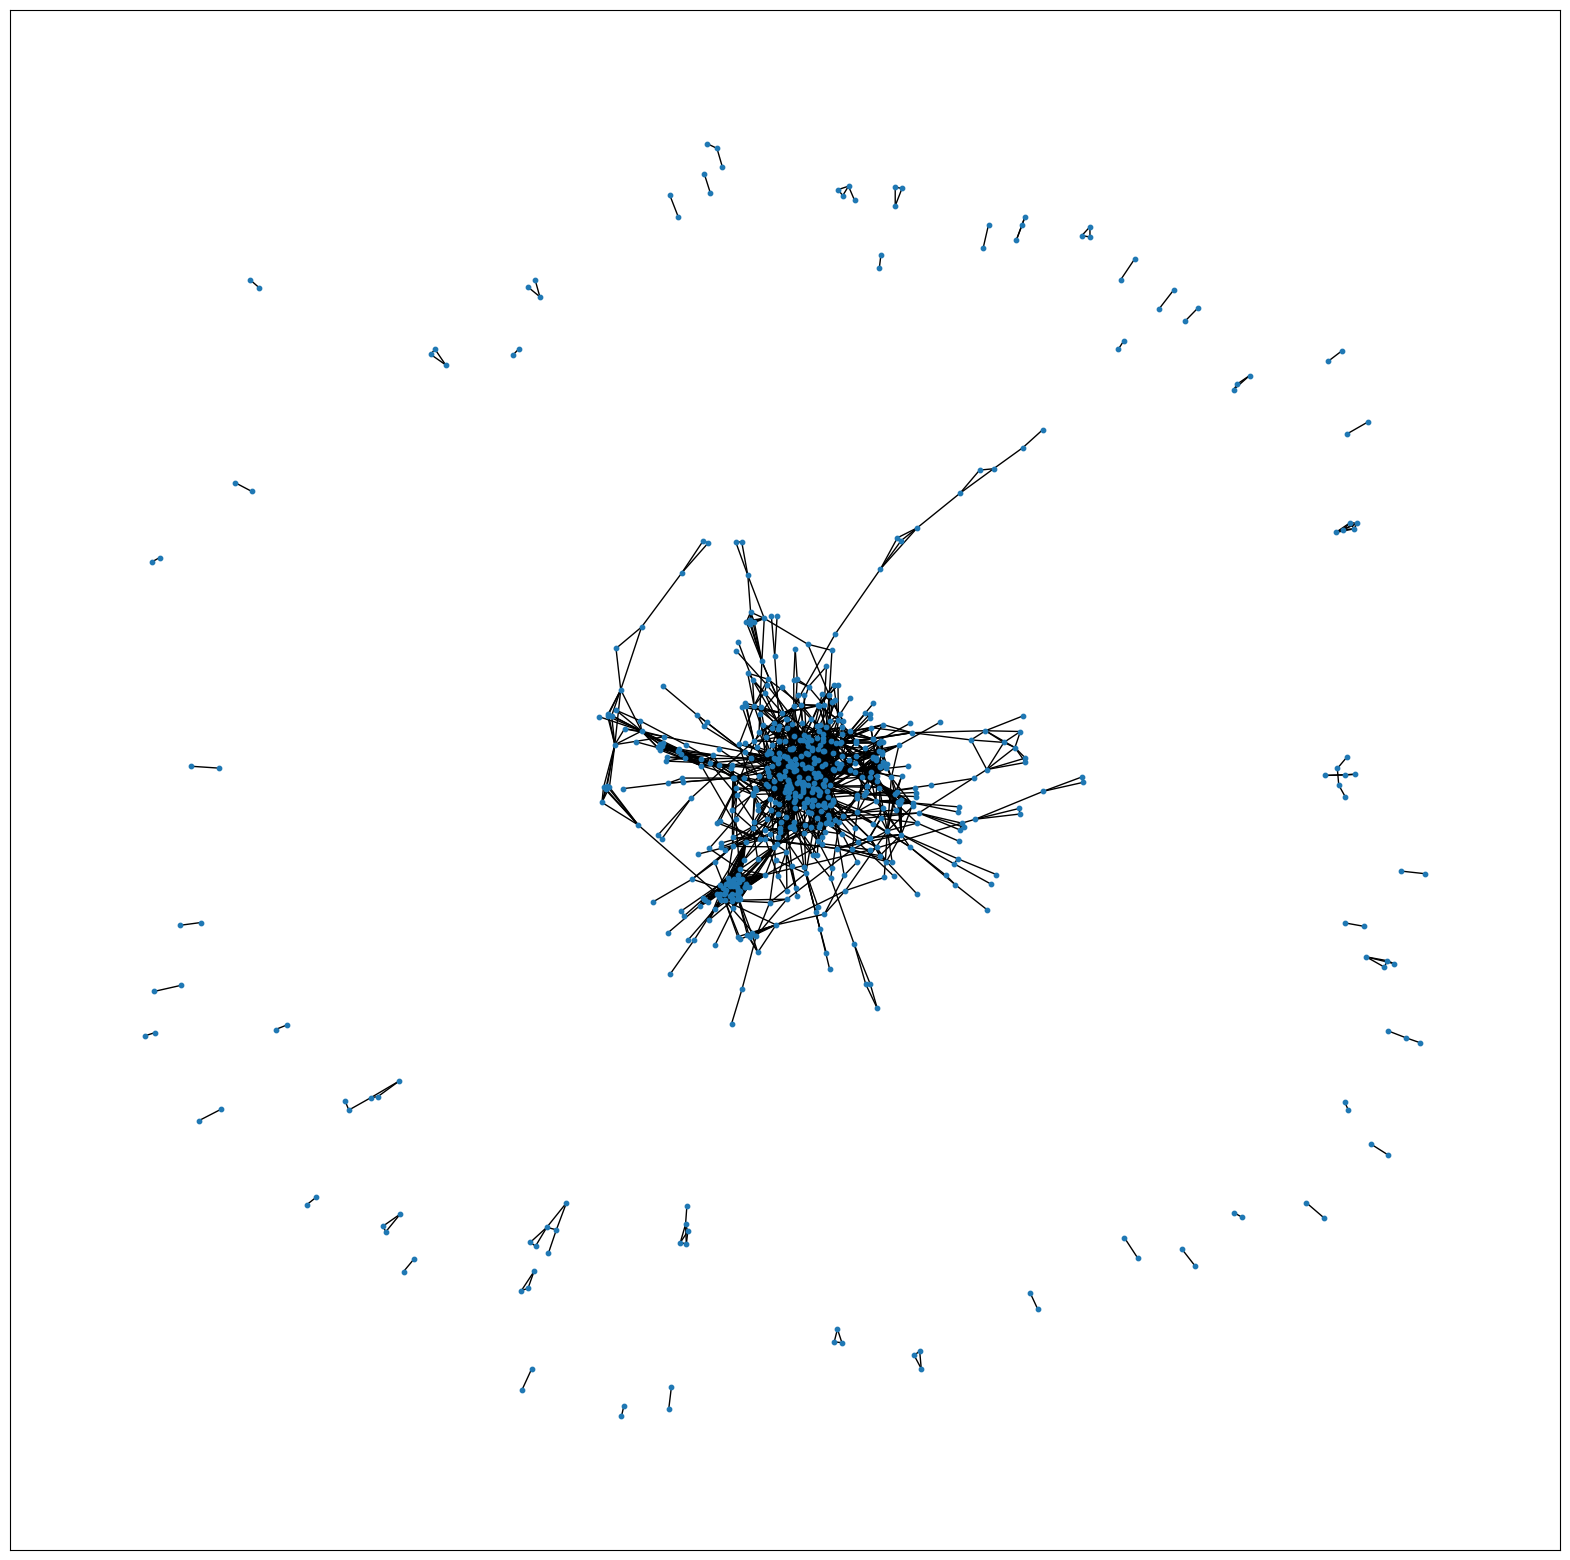

In [1070]:
# Create a graph from the co_investment_counts DataFrame
#get subset where co-investments >1
# co_investment_counts = co_investment_counts[co_investment_counts['CoInvestments'] > 1]
G = nx.from_pandas_edgelist(co_investment_counts, 'shareholder_name_mapped_x', 'shareholder_name_mapped_y', ['CoInvestments'])

# Draw the graph
pos = nx.spring_layout(G)
#make the graph bigger
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos, with_labels=False, node_size=10, edge_color='black')
#add a heatmap
#nx.draw_networkx_edge_labels(G, pos, edge_labels=co_investment_counts['Distance'])
plt.savefig('graphs/co_investments_active_angels.png')
plt.show()
#save plot as png




In [1071]:
import pandas as pd
from d3graph import d3graph, vec2adjmat
source = co_investment_counts['shareholder_name_mapped_x']
target = co_investment_counts['shareholder_name_mapped_y']
weight = co_investment_counts['CoInvestments']


adjmat = vec2adjmat(source, target, weight=weight)
print(adjmat)
# Initialize
d3 = d3graph()

d3.graph(adjmat)
# save as graph.html in dataframes
d3.show('dataframes/graph.html')
# Additional customization for interactivity


# Convert to html and open in the browser
d3.show(filepath='output/graphs/graph_active_angels_mor_than_one_SH.html')


[d3graph] INFO> Converting source-target into adjacency matrix..
[d3graph] INFO> Making the matrix symmetric..


target                                     5W_Tech_Ventures_UG_(haftungsbeschränkt)  \
source                                                                                
5W_Tech_Ventures_UG_(haftungsbeschränkt)                                        0.0   
5_für_Tomorrow_UG_(haftungsbeschränkt)_AG                                       0.0   
7gen_Holdings_GmbH                                                              0.0   
8eyes_GmbH                                                                      0.0   
A06_Ventures_UG_(haftungsbeschränkt)                                            0.0   
...                                                                             ...   
tbd.investments_GmbH                                                            0.0   
transloid_GmbH                                                                  0.0   
ueGei_Capital_UG_(haftungsbeschränkt)                                           0.0   
whiletrue_GmbH                             

[d3graph] INFO> Set directed=True to see the markers!
[d3graph] INFO> Keep only edges with weight>0
[d3graph] INFO> Converting source-target into adjacency matrix..
[d3graph] INFO> Making the matrix symmetric..
[d3graph] INFO> Converting adjacency matrix into source-target..
[d3graph] WARNING> Colormap [Set2] can not create [71] unique colors! Available unique colors: [8].
[d3graph] INFO> Number of unique nodes: 713
[d3graph] INFO> Slider range is set to [0, 6]
[d3graph] INFO> Write to path: [/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/tmptefursu5/d3graph.html]
[d3graph] INFO> File already exists and will be overwritten: [/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/tmptefursu5/d3graph.html]
[d3graph] INFO> Slider range is set to [0, 6]
[d3graph] INFO> Write to path: [/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/output/graphs/graph_active_angels_mor_than_one_SH.html]
[d3graph] INFO> File already exists and will be overwritten: [/Users/annabellschafer/Desktop/

## **Descriptive Statistics** - 2

Descriptive Statistics on Angels

In [1072]:
df_angel_descriptive = pd.DataFrame(columns=("variable","value"))

#Calulate total number of angels and add to df_angel_descriptive with variable name "total_number_of_angels"
total_number_of_angels = len(df_angels)
df_angel_descriptive.loc[0] = ["total_number_of_angels", total_number_of_angels]
#Calculate the amount of males among the angels
number_of_male_angels_total = len(df_angels[df_angels['gender'] == 'male'])
df_angel_descriptive.loc[1] = ["number_of_male_angels", number_of_male_angels_total]
#Calculate the amount of females among all angels
number_of_female_angels_total = len(df_angels[df_angels['gender'] == 'female'])
df_angel_descriptive.loc[2] = ["number_of_female_angels", number_of_female_angels_total]

# calculate share of female angels
share_of_female_angels = number_of_female_angels_total / (number_of_female_angels_total+number_of_male_angels_total)
df_angel_descriptive.loc[3] = ["share_of_female_angels_total", share_of_female_angels]

#calculate share of male angels
share_of_male_angels = number_of_male_angels_total / (number_of_female_angels_total+number_of_male_angels_total)
df_angel_descriptive.loc[4] = ["share_of_male_angels_total", share_of_male_angels]

#cast column number of age to integer
df_angels['age'] = pd.to_numeric(df_angels['age'], errors='coerce').fillna(1).astype(int)
#calculate mean of age for all angels where age is not 0
df_angels_mf = df_angels[df_angels['age'] != 1]
mean_age_of_all_angels = df_angels_mf['age'].mean()
df_angel_descriptive.loc[5] = ["mean_age_of_all_angels", mean_age_of_all_angels]

#Calculate mean age of female angels
df_female_angels = df_angels[df_angels['gender']=='female']
mean_age_of_female_angels = df_female_angels['age'].mean()
df_angel_descriptive.loc[6] = ["mean_age_of_all_female_angels", mean_age_of_female_angels]

#Calculate mean age of male angels
df_male_angels = df_angels[df_angels['gender']=='male']
mean_age_of_male_angels = df_male_angels['age'].mean()
df_angel_descriptive.loc[7] = ["mean_age_of_all_male_angels", mean_age_of_male_angels]



# df_gender_unknown = df_angels[df_angels['gender'] =='unknown']
# mean_age_unknown = df_gender_unknown['age'].mean()
# df_angel_descriptive.loc[8] = ["mean_age_of_all_unknown_angels", mean_age_unknown]

#Calulate total number of active angels and add to df_angel_descriptive with variable name "total_number_of_active_angels"
total_number_of_active_angels = len(df_angels[df_angels['status'] == 'active'])
df_angel_descriptive.loc[9] = ["total_number_of_active_angels", total_number_of_active_angels]

# Calculate number of angels investing through a holding and add to df_angel_descriptive with variable name "number_of_angels_investing_through_a_holding"
number_of_angels_investing_through_a_holding = len(df_angels[df_angels['investment_type'] == 'holding'])
# add them to df
df_angel_descriptive.loc[10] = ["number_of_angels_investing_through_a_holding", number_of_angels_investing_through_a_holding]

#Calculate number of angels investing as a person and add to df_angel_descriptive with variable name "number_of_angels_investing_as_a_person"
number_of_angels_investing_as_a_person = len(df_angels[df_angels['investment_type'] == 'person'])



# add them to df
df_angel_descriptive.loc[11] = ["number_of_angels_investing_as_a_person", number_of_angels_investing_as_a_person]

share_of_investments_through_holding = number_of_angels_investing_through_a_holding/(number_of_angels_investing_through_a_holding+number_of_angels_investing_as_a_person)
# add them to df
df_angel_descriptive.loc[12] = ["share_of_investments_through_holding", share_of_investments_through_holding]
# #share of investments through holding and add to df_angel_descriptive with variable name "share_of_investments_through_holding"
share_of_investments_as_person = number_of_angels_investing_as_a_person/(number_of_angels_investing_through_a_holding+number_of_angels_investing_as_a_person)
# add them to df
df_angel_descriptive.loc[13] = ["share_of_investments_as_person", share_of_investments_as_person]

df_angel_descriptive

variable         value
0                         total_number_of_angels  13037.000000
1                          number_of_male_angels  10134.000000
2                        number_of_female_angels   1555.000000
3                   share_of_female_angels_total      0.133031
4                     share_of_male_angels_total      0.866969
5                         mean_age_of_all_angels     45.322275
6                  mean_age_of_all_female_angels     44.697749
7                    mean_age_of_all_male_angels     45.452141
9                  total_number_of_active_angels    937.000000
10  number_of_angels_investing_through_a_holding   4131.000000
11        number_of_angels_investing_as_a_person   8905.000000
12          share_of_investments_through_holding      0.316892
13                share_of_investments_as_person      0.683108

In [1073]:
df_angels_descriptive_active = pd.DataFrame(columns=("variable","value"))
i=0
#only consider active angels
df_angels_active = df_angels[df_angels['status'] == 'active']

# Calculate number of angels investing through a holding and add to df_angels_descriptive_active with variable name "number_of_angels_investing_through_a_holding"
number_of_angels_investing_through_a_holding = len(df_angels_active[df_angels_active['investment_type'] == 'holding'])
# add them to df
df_angels_descriptive_active.loc[i] = ["number_of_active_angels_investing_through_a_holding", number_of_angels_investing_through_a_holding]
i=i+1
#Calculate number of angels investing as a person and add to df_angels_descriptive_active with variable name "number_of_angels_investing_as_a_person"
number_of_angels_investing_as_a_person = len(df_angels_active[df_angels_active['investment_type'] == 'person'])
# add them to df
df_angels_descriptive_active.loc[i] = ["number_of_active_angels_investing_as_a_person", number_of_angels_investing_as_a_person]
i=i+1
# #share of investments through holding and add to df_angels_descriptive_active with variable name "share_of_investments_through_holding"
share_of_investments_through_holding = number_of_angels_investing_through_a_holding/(number_of_angels_investing_through_a_holding+number_of_angels_investing_as_a_person)
# add them to df
df_angels_descriptive_active.loc[i] = ["share_of_investments_through_holding", share_of_investments_through_holding]
i=i+1
# #share of investments through holding and add to df_angels_descriptive_active with variable name "share_of_investments_through_holding"
share_of_investments_as_person = number_of_angels_investing_as_a_person/(number_of_angels_investing_through_a_holding+number_of_angels_investing_as_a_person)
# add them to df
df_angels_descriptive_active.loc[i] = ["share_of_investments_as_person", share_of_investments_as_person]
i=i+1
# calculate age based on birthdate and add to df_angel

#cast column number of age to integer
df_angels_active['age'] = pd.to_numeric(df_angels_active['age'], errors='coerce').fillna(1).astype(int)

#calculate mean age of angels and add to df_angels_descriptive_active with variable name "mean_age_of_angels"
mean_age_of_angels = df_angels_active['age'].mean()

# add them to df
df_angels_descriptive_active.loc[i] = ["mean_age_of_active_angels", mean_age_of_angels]
i=i+1
#Calculate the amount of males among the active angels
number_of_male_angels_active = len(df_angels_active[df_angels_active['gender'] == 'male'])
df_angels_descriptive_active.loc[i] = ["number_of_male_angels_active", number_of_male_angels_active]
i=i+1
#Calculate the amount of females among the active angels
number_of_female_angels_active = len(df_angels_active[df_angels_active['gender'] == 'female'])
df_angels_descriptive_active.loc[i] = ["number_of_female_angels_active", number_of_female_angels_active]
i=i+1

#calculate share of female angels
share_of_female_angels_active = number_of_female_angels_active/(number_of_female_angels_active+number_of_male_angels_active)
df_angels_descriptive_active.loc[i] = ["share of active angels female", share_of_female_angels_active]
i=i+1
#calculate share of male angels
share_of_male_angels_active = number_of_male_angels_active/(number_of_female_angels_active+number_of_male_angels_active)
df_angels_descriptive_active.loc[i] = ["share of active angels male", share_of_male_angels_active]
i=i+1
#Calculate average number of investment per active angel and add to df_angels_descriptive_active with variable name "average_number_of_investments_per_active_angel"
average_number_of_investments_per_active_angel = df_angels_active['number_of_investments'].mean()
# add them to df
df_angels_descriptive_active.loc[i] = ["average_number_of_investments_per_active_angel", average_number_of_investments_per_active_angel]
i=i+1
#Calculate median number of investment per active angel and add to df_angels_descriptive_active with variable name "median_number_of_investments_per_active_angel"
median_number_of_investments_per_active_angel = df_angels_active['number_of_investments'].median()
# add them to df
df_angels_descriptive_active.loc[i] = ["median_number_of_investments_per_active_angel", median_number_of_investments_per_active_angel]
i=i+1


# #Calculate average inustry_HHI per active angel and add to df_angels_descriptive_active with variable name "average_inustry_HHI_per_active_angel"
# average_inustry_HHI = df_angels_active['industry_HHI'].mean()
# # add them to df
# df_angels_descriptive_active.loc[12] = ["average_industry_HHI", average_inustry_HHI]

# #Calculate average industry HHI across angels and add to df_angels_descriptive_active with variable name "average_industry_HHI_across_angels"
# average_industry_HHI_across_angels = df_angels_active['industry_HHI_angel'].mean()
# # add them to df
# df_angels_descriptive_active.loc[13] = ["average_industry_HHI_across_angels", average_industry_HHI_across_angels]

# #Calculate average eigenvector centrality across angels and add to df_angels_descriptive_active with variable name "average_eigenvector_centrality_across_angels"
# average_eigenvector_centrality_across_angels = df_angels_active['eigenvector_centrality'].mean()
# # add them to df
# df_angels_descriptive_active.loc[14] = ["average_eigenvector_centrality_across_angels", average_eigenvector_centrality_across_angels]

df_angels_descriptive_active

variable       value
0   number_of_active_angels_investing_through_a_ho...  658.000000
1       number_of_active_angels_investing_as_a_person  279.000000
2                share_of_investments_through_holding    0.702241
3                      share_of_investments_as_person    0.297759
4                           mean_age_of_active_angels   45.059765
5                        number_of_male_angels_active  804.000000
6                      number_of_female_angels_active   71.000000
7                       share of active angels female    0.081143
8                         share of active angels male    0.918857
9      average_number_of_investments_per_active_angel    2.578442
10      median_number_of_investments_per_active_angel    2.000000

In [1074]:
df_active_angels

shareholder_name_old shareholder_id  \
23              Settels Ventures UG (haftungsbeschränkt)         9735.0   
51                     GingerCat UG (haftungsbeschränkt)        15457.0   
82                                            8eyes GmbH         6554.0   
93     Michael Truch Holding GmbH Michael Truch Holdi...         2873.0   
108                                  Boston Venture GmbH        20212.0   
...                                                  ...            ...   
18614                                     Heide, Henning        18017.0   
18695              Prof. Dr. Alexander Grossmann, Putbus        18138.0   
18705                                      Markus Hammes        18149.0   
18896                                        Ralph Lägel        18372.0   
19878                                        Kiana Mardi         7503.0   

                          created_at  number_of_investments shareholder_type  \
23     2024-03-10 17:37:24.528696+00                      2            angel   
51     2024-03-10 17:37:27.447081+00                      2            angel   
82     2024-03-10 17:37:22.963246+00                      2            angel   
93     2024-03-10 17:37:20.561047+00                      2            angel   
108    2024-03-10 17:37:30.929372+00                      5            angel   
...                              ...                    ...              ...   
18614  2024-03-10 17:37:29.143888+00                      2            angel   
18695  2024-03-10 17:37:29.143888+00                      2            angel   
18705  2024-03-10 17:37:29.143888+00                      2            angel   
18896  2024-03-10 17:37:29.143888+00                      2            angel   
19878  2024-03-10 17:37:22.963246+00                      2            angel   

       register_id               register_court  total_participation  \
23             NaN  Charlottenburg HRB 159694 B             9.035000   
51      HRB 157901                     B Berlin             1.520000   
82     FN 411158 w          Firmenbuch von Wien             0.486050   
93         AG Köln                         Köln                  NaN   
108     HRB 222892                      München             1.554123   
...            ...                          ...                  ...   
18614          NaN                          NaN            10.000000   
18695          NaN                          NaN            58.350000   
18705          NaN                          NaN             5.430000   
18896          NaN                          NaN             0.972950   
19878          NaN                          NaN             1.525000   

       register_mapping                                shareholder_purpose  \
23                  NaN                                                NaN   
51                  NaN                                                NaN   
82                  NaN                      {"shareholder_purpose": null}   
93                568.0  {"shareholder_purpose": "die Verwaltung von ei...   
108               136.0  {"shareholder_purpose": "Eingehen, Halten und ...   
...                 ...                                                ...   
18614               NaN                                                NaN   
18695               NaN                                                NaN   
18705               NaN                                                NaN   
18896               NaN                                                NaN   
19878               NaN                                                NaN   

       ... munich stuttgart leipzig cologne frankfurt hamburg other  \
23     ...    0.0       0.0     0.0     0.0       0.0     1.0   0.0   
51     ...    1.0       0.0     0.0     0.0       0.0     0.0   0.0   
82     ...    0.0       0.0     0.0     0.0       0.0     0.0   0.0   
93     ...    0.0       0.0     0.0     2.0       0.0     0.0   0.0   
108    ...    5.0

In [1137]:
#calculate the industry_HHI for each angel
# #calculate the industry_HHI for each angel
# #calculate the industry_HHI for each angel
def calculate_hhi(market_shares):
    """
    Calculate Herfindahl-Hirschmann Index (HHI)
    
    Parameters:
    market_shares (list): List of market shares for each company
    
    Returns:
    hhi (float): Calculated HHI index
    """
    #calculate shares of total first
    
    total_shares = sum(market_shares)
    
    market_shares = [share/total_shares for share in market_shares]
    hhi = sum([share**2 for share in market_shares])

    return hhi

#calculate the industry_HHI for each angel based on the industry columns production_trade,technology_digital_services,energy_environment_infrastructure,healthcare,services_consulting
df_angels_active['industry_HHI'] = df_angels_active[['production_trade','technology_digital_services','energy_environment_infrastructure','healthcare','services_consulting']].apply(calculate_hhi, axis=1)

#calculate region HHI for each angel based on the region columns muncih,hamburg,berlin,frankfurt,other,leipzig,cologne,international
df_angels_active['region_HHI'] = df_angels_active[['munich','hamburg','berlin','frankfurt','other','leipzig','cologne','stuttgart']].apply(calculate_hhi, axis=1)

df_angels_active


shareholder_name_old shareholder_id  \
23              Settels Ventures UG (haftungsbeschränkt)         9735.0   
51                     GingerCat UG (haftungsbeschränkt)        15457.0   
82                                            8eyes GmbH         6554.0   
93     Michael Truch Holding GmbH Michael Truch Holdi...         2873.0   
108                                  Boston Venture GmbH        20212.0   
...                                                  ...            ...   
18614                                     Heide, Henning        18017.0   
18695              Prof. Dr. Alexander Grossmann, Putbus        18138.0   
18705                                      Markus Hammes        18149.0   
18896                                        Ralph Lägel        18372.0   
19878                                        Kiana Mardi         7503.0   

                          created_at  number_of_investments shareholder_type  \
23     2024-03-10 17:37:24.528696+00                      2            angel   
51     2024-03-10 17:37:27.447081+00                      2            angel   
82     2024-03-10 17:37:22.963246+00                      2            angel   
93     2024-03-10 17:37:20.561047+00                      2            angel   
108    2024-03-10 17:37:30.929372+00                      5            angel   
...                              ...                    ...              ...   
18614  2024-03-10 17:37:29.143888+00                      2            angel   
18695  2024-03-10 17:37:29.143888+00                      2            angel   
18705  2024-03-10 17:37:29.143888+00                      2            angel   
18896  2024-03-10 17:37:29.143888+00                      2            angel   
19878  2024-03-10 17:37:22.963246+00                      2            angel   

       register_id               register_court  total_participation  \
23             NaN  Charlottenburg HRB 159694 B             9.035000   
51      HRB 157901                     B Berlin             1.520000   
82     FN 411158 w          Firmenbuch von Wien             0.486050   
93         AG Köln                         Köln                  NaN   
108     HRB 222892                      München             1.554123   
...            ...                          ...                  ...   
18614          NaN                          NaN            10.000000   
18695          NaN                          NaN            58.350000   
18705          NaN                          NaN             5.430000   
18896          NaN                          NaN             0.972950   
19878          NaN                          NaN             1.525000   

       register_mapping                                shareholder_purpose  \
23                  NaN                                                NaN   
51                  NaN                                                NaN   
82                  NaN                      {"shareholder_purpose": null}   
93                568.0  {"shareholder_purpose": "die Verwaltung von ei...   
108               136.0  {"shareholder_purpose": "Eingehen, Halten und ...   
...                 ...                                                ...   
18614               NaN                                                NaN   
18695               NaN                                                NaN   
18705               NaN                                                NaN   
18896               NaN                                                NaN   
19878               NaN                                                NaN   

       ... other international  sum  status eigenvector_centrality  \
23     ...     0           0.0  2.0  active                    NaN   
51     ...     0           0.0  1.0  active                    NaN   
82     ...     0           0.0  2.0  active                    NaN   
93     ...     0           0.0  0.0  active                    NaN   
108    ...     0      

In [1138]:
#create df with columns variable and value
df_active_angels_descriptive_hhi = pd.DataFrame(columns=("variable","value"))
#calculate the average industry HHI for all active angels and put it into a df
average_industry_HHI = df_angels_active['industry_HHI'].mean()
average_industry_HHI
df_active_angels_descriptive_hhi.loc[0] = ["average_industry_HHI", average_industry_HHI]
#calculate the average region HHI for all active angels and put it into a df
average_region_HHI = df_angels_active['region_HHI'].mean()
average_region_HHI
df_active_angels_descriptive_hhi.loc[1] = ["average_region_HHI", average_region_HHI]

df_active_angels_descriptive_hhi    




variable     value
0  average_industry_HHI  0.607966
1    average_region_HHI  0.698795

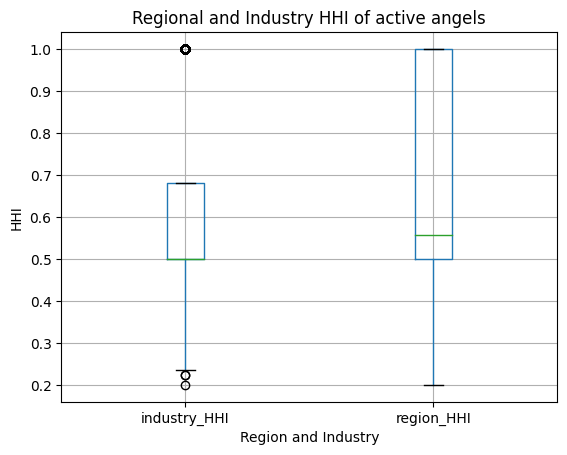

In [1139]:
#plot regional and industry HHI as boxplot in one graph

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data
df_angels_active.boxplot(column=['industry_HHI', 'region_HHI'], ax=ax)

# Set the title and labels
ax.set_title('Regional and Industry HHI of active angels')
ax.set_ylabel('HHI')
ax.set_xlabel('Region and Industry')

# Save the plot
plt.savefig('output/graphs/boxplot_regional_industry_HHI.png')

# Show the plot
plt.show()

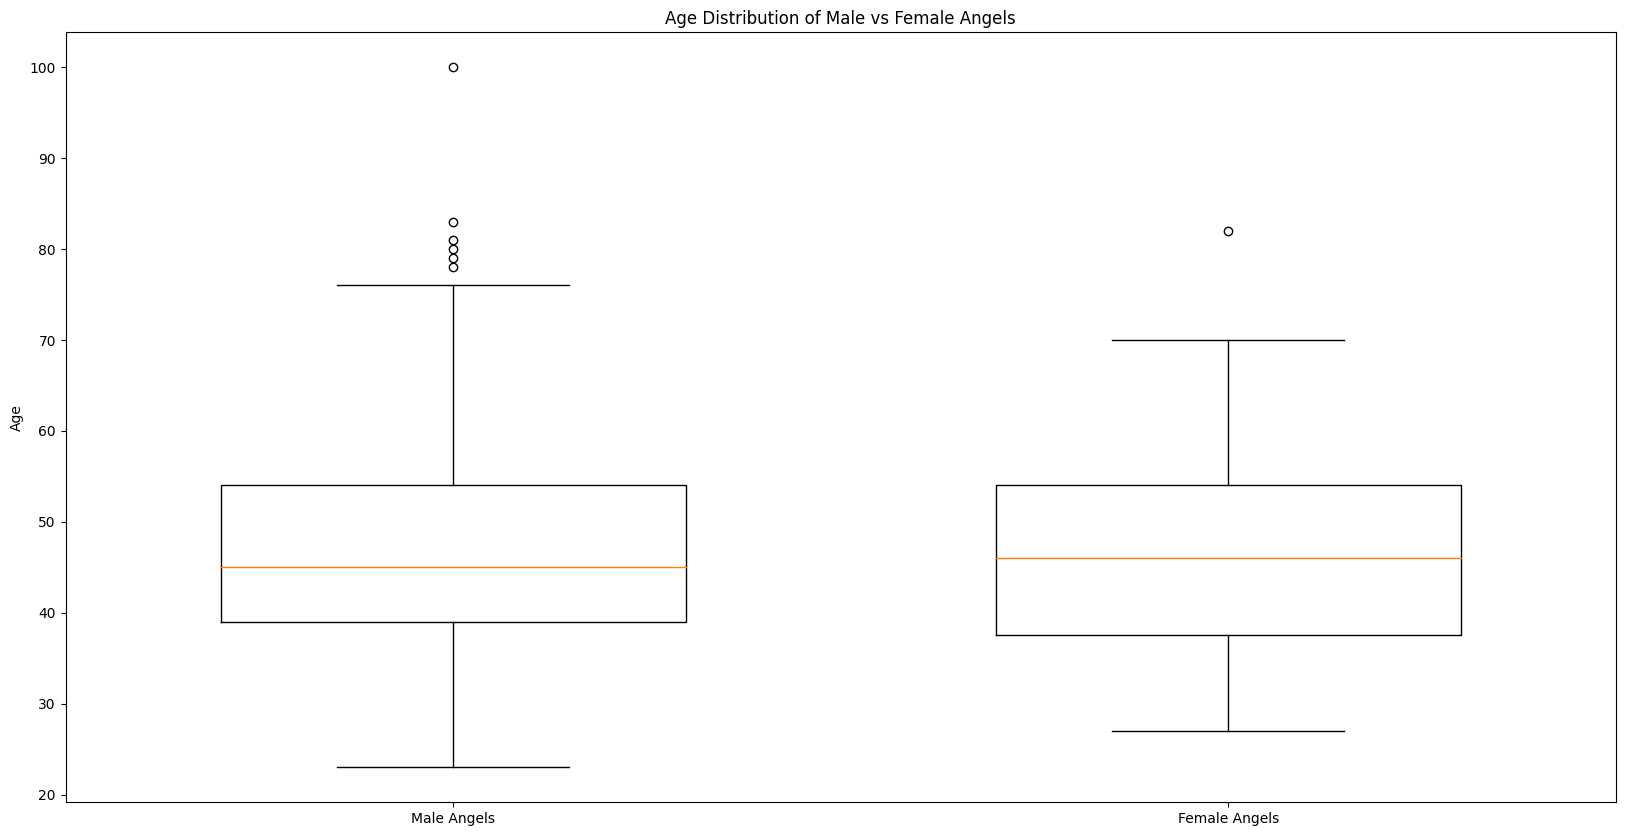

In [1084]:
import matplotlib.pyplot as plt

df_angels_male = df_angels_active[df_angels_active["gender"]=='male']

df_angels_female = df_angels_active[df_angels_active['gender']=='female']

# Assuming df_angels_male and df_angels_female are your dataframes and they both have an 'age' column

# Combine the data into a list where each element is a Series/DataFrame of ages
data_to_plot = [df_angels_male['age'], df_angels_female['age']]

plt.figure(figsize=(20,10))

# Create boxplot with the combined data
# The positions parameter is optional, it sets the positions of the boxes in the plot
plt.boxplot(data_to_plot, positions=[1, 2], widths=0.6)

# Set the x-tick labels to correspond to your two categories
plt.xticks([1, 2], ['Male Angels', 'Female Angels'])

plt.title('Age Distribution of Male vs Female Angels')
plt.ylabel('Age')

# Save the figure
plt.savefig('output/boxplot_age_gender_comparison.png')

plt.show()

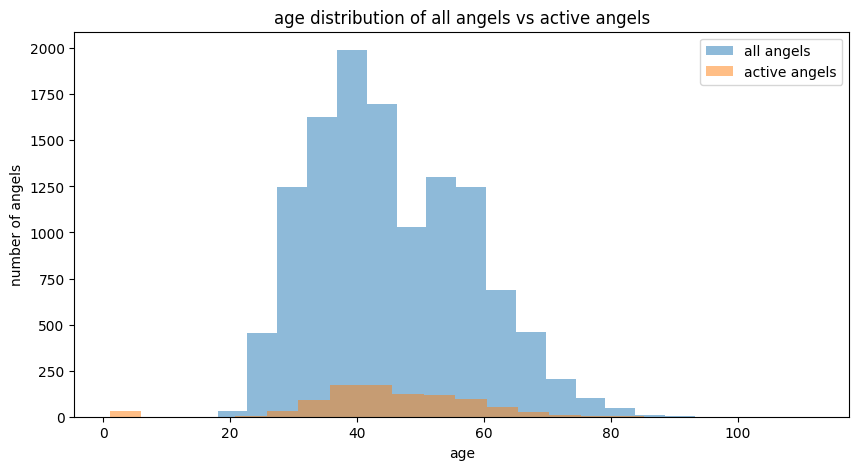

In [1085]:
#plot age distribution of all angels
plt.figure(figsize=(10,5))
#drop angels with age 0
df_angels_mf = df_angels[df_angels['age'] !=1]

plt.hist(df_angels_mf['age'], bins=20, alpha=0.5, label='all angels')
plt.hist(df_angels_active['age'], bins=20, alpha=0.5, label='active angels')
plt.xlabel('age')
plt.ylabel('number of angels')
plt.legend(loc='upper right')
plt.title('age distribution of all angels vs active angels')
plt.savefig('output/graphs/age_distribution_all_vs_active_angels.png')
plt.show()

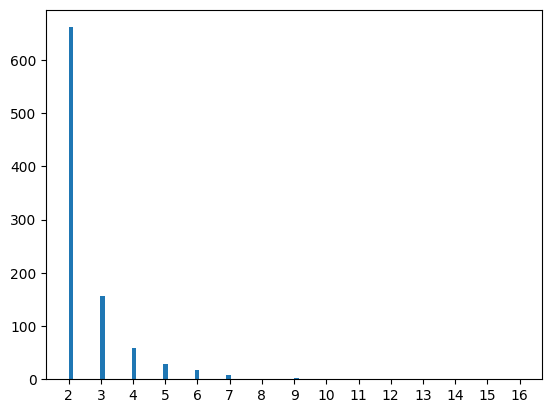

In [1086]:
#Plot distribution of number of investments per angel
plt.hist(df_active_angels['number_of_investments'], bins=100)
# only plot whole numbers on x-axis
plt.xticks(np.arange(min(df_active_angels['number_of_investments']), max(df_active_angels['number_of_investments'])+1, 1.0))
#export to png as "Number of investments.png"
plt.savefig('graphs/Distribution of number of investments.png')


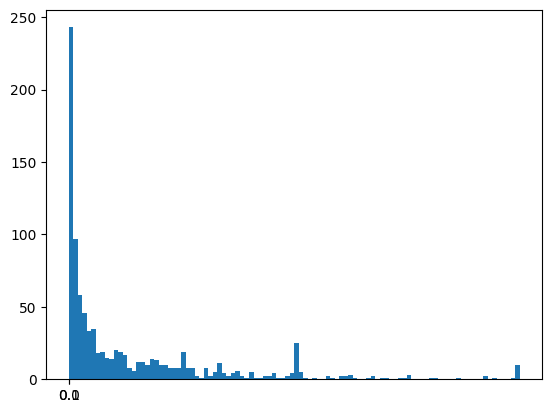

In [1087]:
#plot distribution of average shares in their investments including decimals
plt.hist(df_active_angels['total_participation'], bins=100)
# plot also decimals on X-axis from 0 to 0.2
plt.xticks(np.arange(0, 0.2, 0.1))
#export to png as "Distribution of average shares of angels.png"
plt.savefig('graphs/Distribution of average shares of angels.png')


In [1088]:
df_active_angels

shareholder_name_old shareholder_id  \
23              Settels Ventures UG (haftungsbeschränkt)         9735.0   
51                     GingerCat UG (haftungsbeschränkt)        15457.0   
82                                            8eyes GmbH         6554.0   
93     Michael Truch Holding GmbH Michael Truch Holdi...         2873.0   
108                                  Boston Venture GmbH        20212.0   
...                                                  ...            ...   
18614                                     Heide, Henning        18017.0   
18695              Prof. Dr. Alexander Grossmann, Putbus        18138.0   
18705                                      Markus Hammes        18149.0   
18896                                        Ralph Lägel        18372.0   
19878                                        Kiana Mardi         7503.0   

                          created_at  number_of_investments shareholder_type  \
23     2024-03-10 17:37:24.528696+00                      2            angel   
51     2024-03-10 17:37:27.447081+00                      2            angel   
82     2024-03-10 17:37:22.963246+00                      2            angel   
93     2024-03-10 17:37:20.561047+00                      2            angel   
108    2024-03-10 17:37:30.929372+00                      5            angel   
...                              ...                    ...              ...   
18614  2024-03-10 17:37:29.143888+00                      2            angel   
18695  2024-03-10 17:37:29.143888+00                      2            angel   
18705  2024-03-10 17:37:29.143888+00                      2            angel   
18896  2024-03-10 17:37:29.143888+00                      2            angel   
19878  2024-03-10 17:37:22.963246+00                      2            angel   

       register_id               register_court  total_participation  \
23             NaN  Charlottenburg HRB 159694 B             9.035000   
51      HRB 157901                     B Berlin             1.520000   
82     FN 411158 w          Firmenbuch von Wien             0.486050   
93         AG Köln                         Köln                  NaN   
108     HRB 222892                      München             1.554123   
...            ...                          ...                  ...   
18614          NaN                          NaN            10.000000   
18695          NaN                          NaN            58.350000   
18705          NaN                          NaN             5.430000   
18896          NaN                          NaN             0.972950   
19878          NaN                          NaN             1.525000   

       register_mapping                                shareholder_purpose  \
23                  NaN                                                NaN   
51                  NaN                                                NaN   
82                  NaN                      {"shareholder_purpose": null}   
93                568.0  {"shareholder_purpose": "die Verwaltung von ei...   
108               136.0  {"shareholder_purpose": "Eingehen, Halten und ...   
...                 ...                                                ...   
18614               NaN                                                NaN   
18695               NaN                                                NaN   
18705               NaN                                                NaN   
18896               NaN                                                NaN   
19878               NaN                                                NaN   

       ... leipzig cologne frankfurt hamburg other international  sum  status  \
23     ...     0.0     0.0       0.0     1.0   0.0           0.0  2.0  active   
51     ...     0.0     0.0       0.0     0.0   0.0           0.0  1.0  active   
82     ...     0.0     0.0       0.0     0.0   0.0           0.0  2.0  active   
93     ...     0.0     2.0       0.0     0.0   0

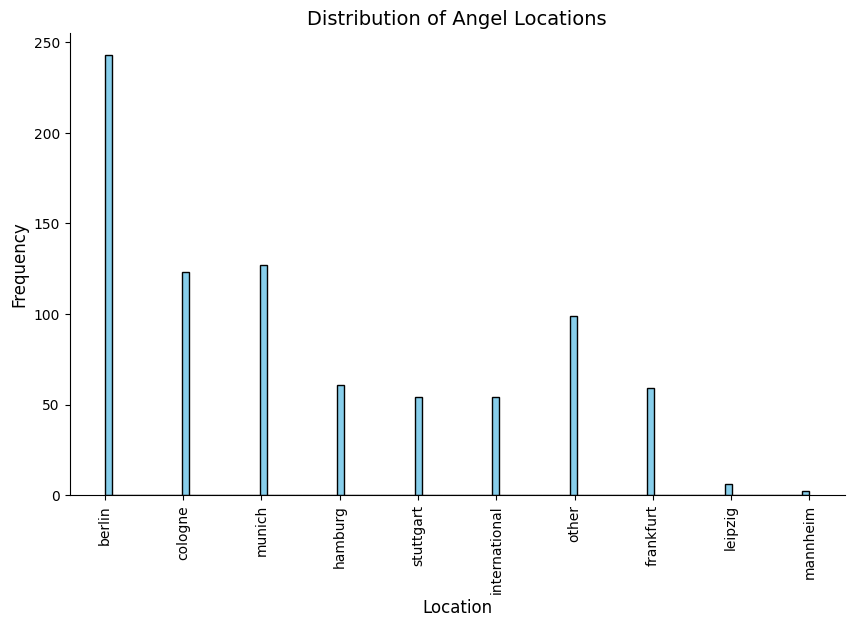

In [1089]:
import matplotlib.pyplot as plt

# Drop NaN values
data = df_active_angels['region_mapping'].dropna()

# Set the figure size
plt.figure(figsize=(10,6))

# Plot the histogram with a color
plt.hist(data, bins=100, color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Distribution of Angel Locations', fontsize=14)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Remove top and right spines for aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#export graph as image called "Number of angels per region.png"
plt.savefig('graphs/Number of angels per region.png')

# Show the plot
plt.show()



## Descriptive Statistics on Startups

In [1090]:
i=0
df_startup_descriptive = pd.DataFrame(columns=("variable","value"))
#Calulate total number of startups and add to df_startup_descriptive with variable name "total_number_of_startups"
total_number_of_startups = len(df_startups)
df_startup_descriptive.loc[i] = ["total_number_of_companies", total_number_of_startups]
i=i+1
df_startup_descriptive

#get subset of startups with more than 2 shareholders
df_startups = df_startups[df_startups['number_shareholders'] > 2]
#get subset of startups that is also in df_investment_rel_angel_startup
df_startups = df_startups[df_startups['startup_name'].isin(df_investment_rel_angel_startup['startup_name'])]
number_startups_in_dataset=len(df_startups)
df_startup_descriptive.loc[i] = ["total_number_of_startups_in_dataset", number_startups_in_dataset]
df_startup_descriptive

variable  value
0            total_number_of_companies   6740
1  total_number_of_startups_in_dataset   1097

In [1091]:
#save df_Startups to csv with name "startups_filtered.csv" and seperator ";"
df_startups.to_csv('dataframes/startups_filtered.csv', sep=";")

In [1092]:
#calculate for each startup number_angels per startup as variable number_angels from how often shareholder_type in df_investment_rel_angel_startup is "angel"
#for each row in df_startups, count how often the startup_name occurs in df_investment_rel_angel_startup where shareholder_type is "angel"
len(df_investment_rel_angel_startup)
df_startups['number_angels'] = df_startups['startup_name'].map(df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_type'] == 'angel']['startup_name'].value_counts())
#get df_investment_rel_angel_startup where shareholder_type is "angel"
df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_type'] == 'institution']

#get sum of all number of angels
sum_number_angels = df_startups['number_angels'].sum()
sum_number_angels


2182.0

In [1093]:
# Calculate descriptive statistics for strtups from df_startups, add to df_startup_descriptive
# we want to calculate the following variables:
# total_number_of_startups
#average number of angel investors
#median number of angel investors
#average number of active angels
#median number of active angels
#get subset of df_startups that are in df_investment_rel_angel_startup where shareholder_type is angel and active
i=0
df_startup_descriptive = pd.DataFrame(columns=("variable","value"))

# total_number_of_startups = len(df_startups)
# df_startup_descriptive.loc[i] = ["total_number_of_companies", total_number_of_startups]
i=i+1

# # get subset of startups that are in df_investment_rel_angel_startup where shareholder_type is angel and active
# df_startups = df_startups[df_startups['startup_name'].isin(df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_type'] == 'angel']['startup_name'])]

# # get subset where angel is active
# df_startups = df_startups[df_startups['startup_name'].isin(df_investment_rel_angel_startup[df_investment_rel_angel_startup['status'] == 'active']['startup_name'])]

#Calulate total number of startups and add to df_startup_descriptive with variable name "total_number_of_startups"
total_number_of_startups = len(df_startups)
df_startup_descriptive.loc[i] = ["total_number_of_startups", total_number_of_startups]
i=i+1
#Calulate average number of angel investors and add to df_startup_descriptive with variable name "average_number_of_angel_investors"
average_number_of_angel_investors = df_startups['number_shareholders'].mean()
df_startup_descriptive.loc[i] = ["average_number_of_shareholders", average_number_of_angel_investors]
i=i+1
#Calulate median number of angel investors and add to df_startup_descriptive with variable name "median_number_of_angel_investors"
median_number_of_angel_investors = df_startups['number_shareholders'].median()
df_startup_descriptive.loc[i] = ["median_number_of_shareholders", median_number_of_angel_investors]
i=i+1
#Calulate average number of active angels and add to df_startup_descriptive with variable name "average_number_of_active_angels"
average_number_of_angels = df_startups['number_angels'].mean()
df_startup_descriptive.loc[i] = ["average_number_of_angels", average_number_of_angels]
i=i+1
#Calulate median number of active angels and add to df_startup_descriptive with variable name "median_number_of_active_angels"
median_number_of_angels = df_startups['number_angels'].median()
df_startup_descriptive.loc[i] = ["median_number_of_angels", median_number_of_angels]
i=i+1
# #Calulate average number of active angels and add to df_startup_descriptive with variable name "average_number_of_active_angels"
# average_number_of_active_angels = df_startups['number_of_active_angels'].mean()
# df_startup_descriptive.loc[5] = ["average_number_of_active_angels", average_number_of_active_angels]

# #Calulate median number of active angels and add to df_startup_descriptive with variable name "median_number_of_active_angels"
# median_number_of_active_angels = df_startups['number_of_active_angels'].median()
# df_startup_descriptive.loc[6] = ["median_number_of_active_angels", median_number_of_active_angels]


df_startup_descriptive



variable        value
1        total_number_of_startups  1097.000000
2  average_number_of_shareholders     8.845032
3   median_number_of_shareholders     6.000000
4        average_number_of_angels     2.003673
5         median_number_of_angels     1.000000

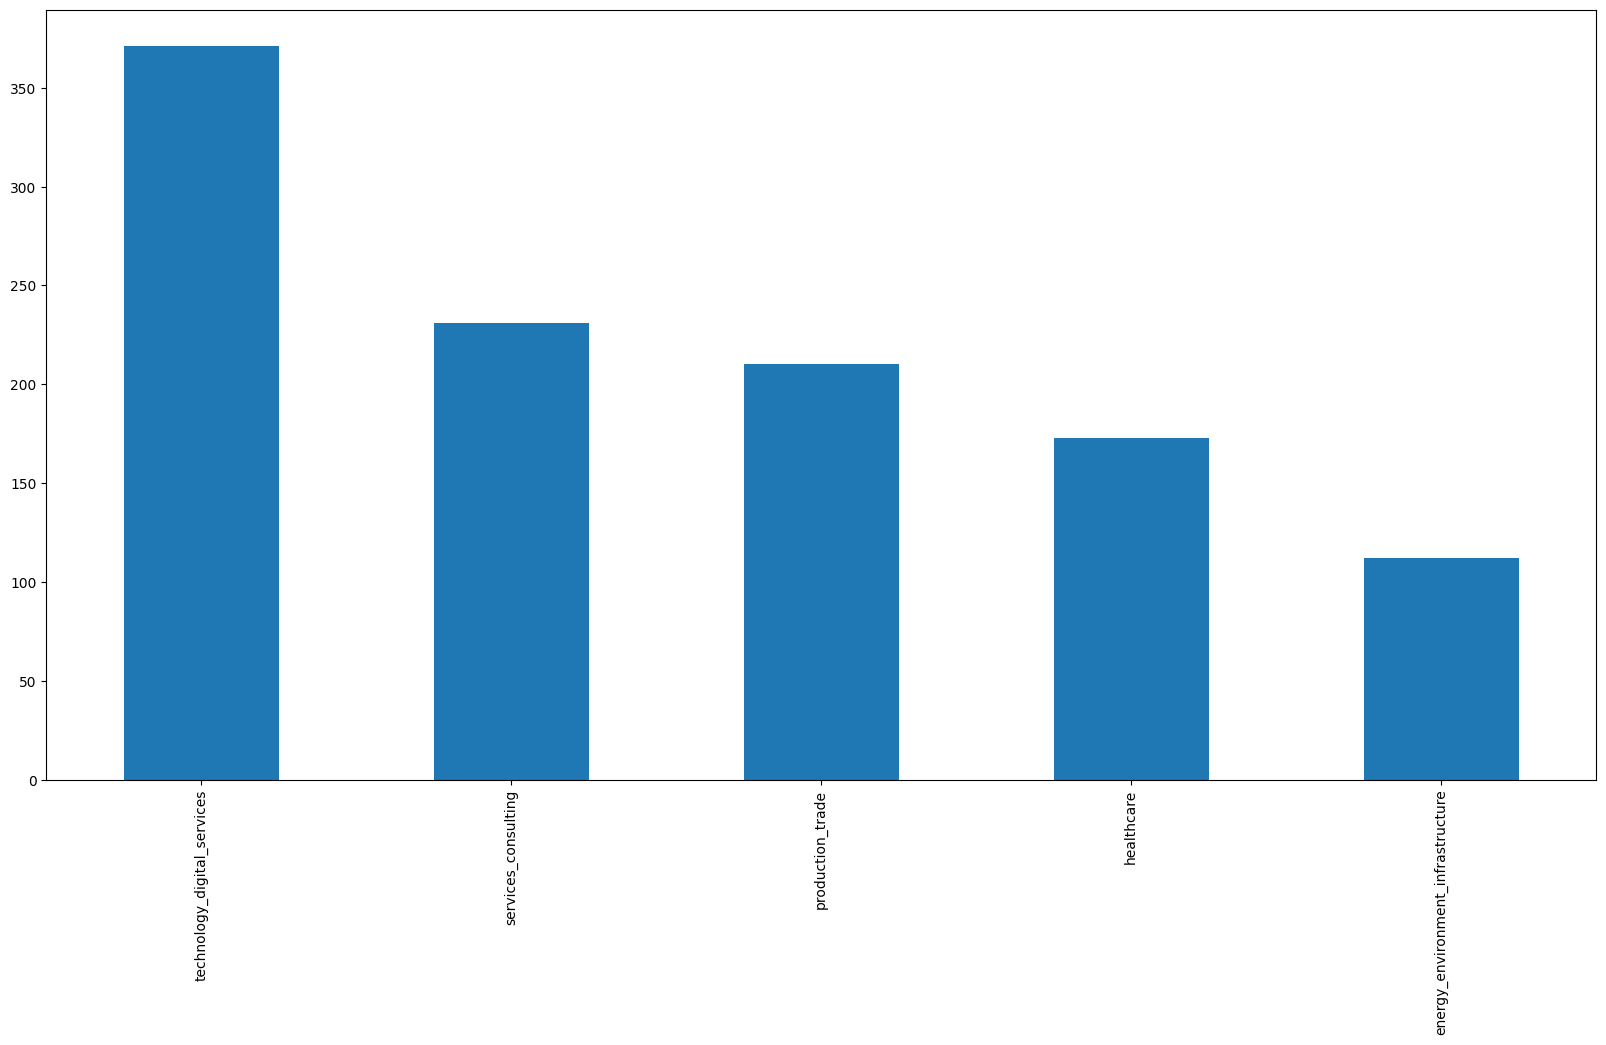

In [1094]:
#Plot startups per startup_industry_mapped
plt.figure(figsize=(20,10))
#plot the number of startups per industry
df_startups['startup_industry_mapped'].value_counts().plot(kind='bar')
#plot all industries
plt.xticks(rotation=90)

#export graph as image called "Number of Startups per Industry.png"
plt.savefig('graphs/Number of Startups per Industry.png')

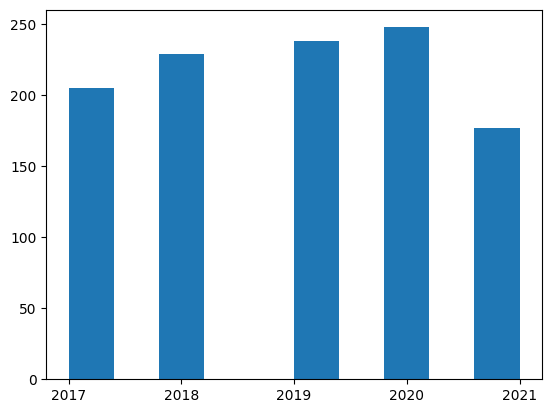

In [1095]:
#add startup year_of_incorporation to df_startups based on date_incorporated
df_startups['year_of_incorporation'] = pd.to_datetime(df_startups['date_incorporated']).dt.year
#Plot startups per year of incorporation
plt.hist(df_startups['year_of_incorporation'], bins=10)
#plot all years, make 1 year jumps, no decimals, make the bars thicker
plt.xticks(np.arange(min(df_startups['year_of_incorporation']), max(df_startups['year_of_incorporation'])+1, 1.0))

#export graph as image called "Number of Startups per Year of Incorporation.png"
plt.savefig('graphs/Number of Startups per Year of Incorporation.png')

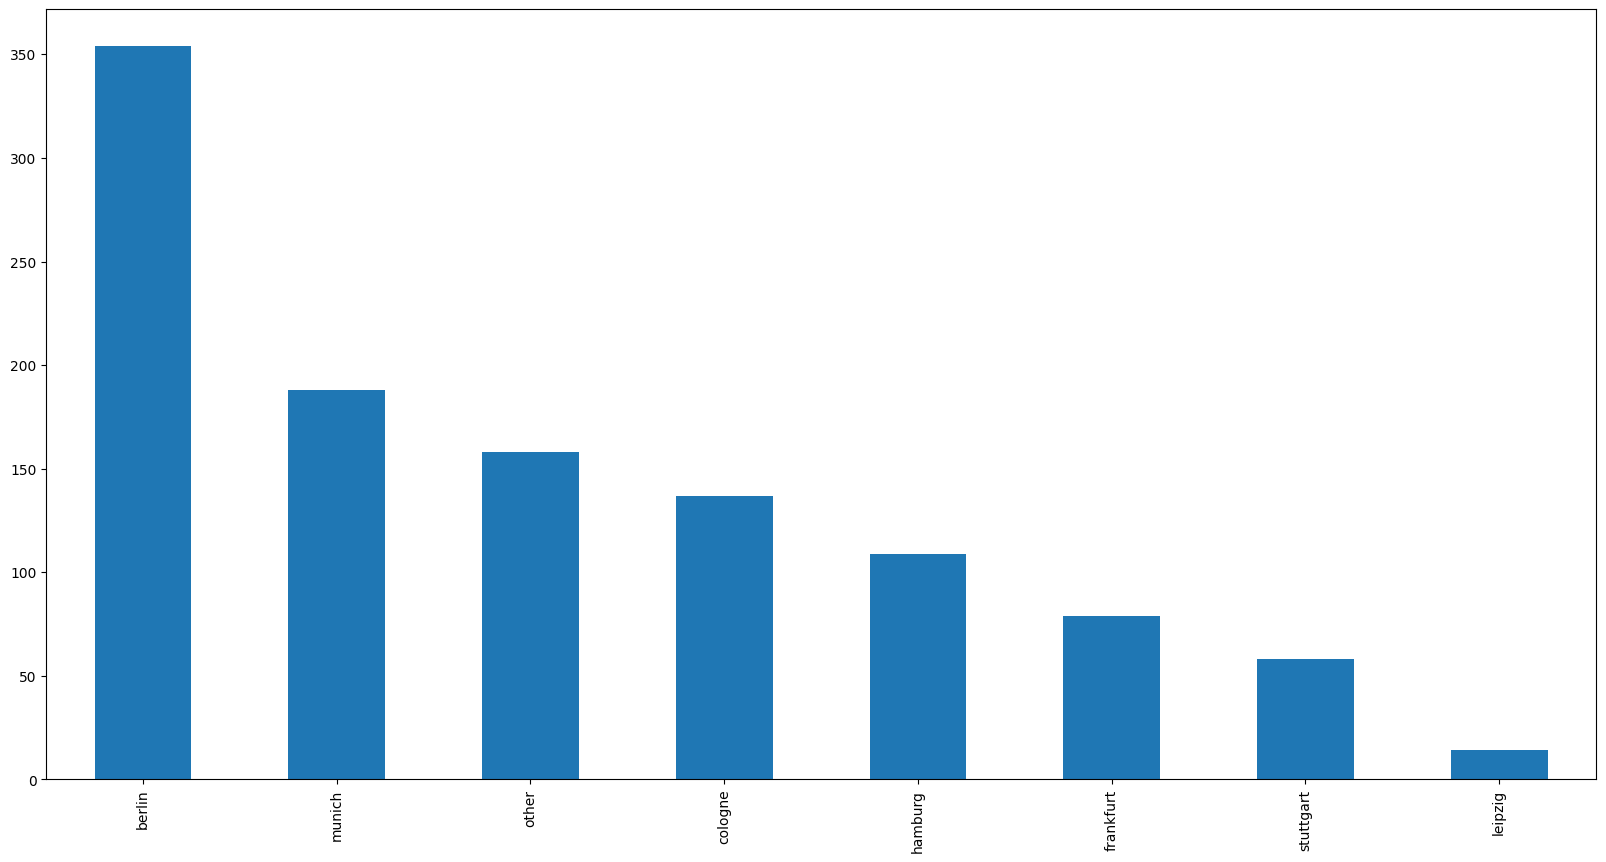

In [1096]:
#plot startups per egion
plt.figure(figsize=(20,10))
#plot the number of startups per region
df_startups['region_mapping'].value_counts().plot(kind='bar')
#plot all regions
plt.xticks(rotation=90)
#export graph as image called "Number of Startups per Region.png"
plt.savefig('graphs/Number of Startups per Region.png')
plt.show()

## Network metrics



In [1097]:
#Cosntruct a network graph of only the active angels
# get a list of co-investments

#only consider active angels in df_investment_rel_angel_startup
#match status from df_angels to df_investment_rel_angel_startup
#get subset of only active angels
df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_name_mapped'].isin(df_angels_active['shareholder_name'])]

# #get subset of df_investment_rel_angel_startup where startup_name is part of df_startups
# df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['startup_name'].isin(df_startups['startup_name'])]


# Create a new DataFrame where each row represents a co-investment
co_investments = df_investment_rel_angel_startup.merge(df_investment_rel_angel_startup, on='startup_name')

# Filter out rows where the investor is the same in both columns
co_investments = co_investments[co_investments['shareholder_name_mapped_x'] != co_investments['shareholder_name_mapped_y']]

# # Create a table with the number of co-investments for each pair of investors
co_investment_counts = co_investments.groupby(['shareholder_name_mapped_x', 'shareholder_name_mapped_y']).size().reset_index(name='CoInvestments')

#replace all spaces with _ in shareholder_name_mapped_x
co_investment_counts['shareholder_name_mapped_x'] = co_investment_counts['shareholder_name_mapped_x'].str.replace(' ', '_')
co_investment_counts['shareholder_name_mapped_y'] = co_investment_counts['shareholder_name_mapped_y'].str.replace(' ', '_')

#co_investment_counts.to_csv('co_investment_counts.csv', index=False)

#sort by number of co-investments
co_investment_counts = co_investment_counts.sort_values(by=['CoInvestments'], ascending=False)
print(co_investment_counts)


            shareholder_name_mapped_x  \
5527                   whiletrue_GmbH   
4089                ROMM_Holding_GmbH   
4358     Roskopf_Ventures_GmbH_Berlin   
4081                ROMM_Holding_GmbH   
259                        Alvio_GmbH   
...                               ...   
1977      Founders_First_Capital_GmbH   
1976      Founders_First_Capital_GmbH   
1975      Founders_First_Capital_GmbH   
1974      Founders_First_Capital_GmbH   
5551  wrapall_UG_(haftungsbeschränkt)   

                              shareholder_name_mapped_y  CoInvestments  
5527                                  ROMM_Holding_GmbH              6  
4089                                     whiletrue_GmbH              6  
4358                                  ROMM_Holding_GmbH              6  
4081                       Roskopf_Ventures_GmbH_Berlin              6  
259                                      whiletrue_GmbH              5  
...                                                 ...            ..

In [1098]:
#save df_investment_rel_angel_startup as csv
df_investment_rel_angel_startup.to_csv('dataframes/df_investment_rel_angel_startup.csv', index=False)


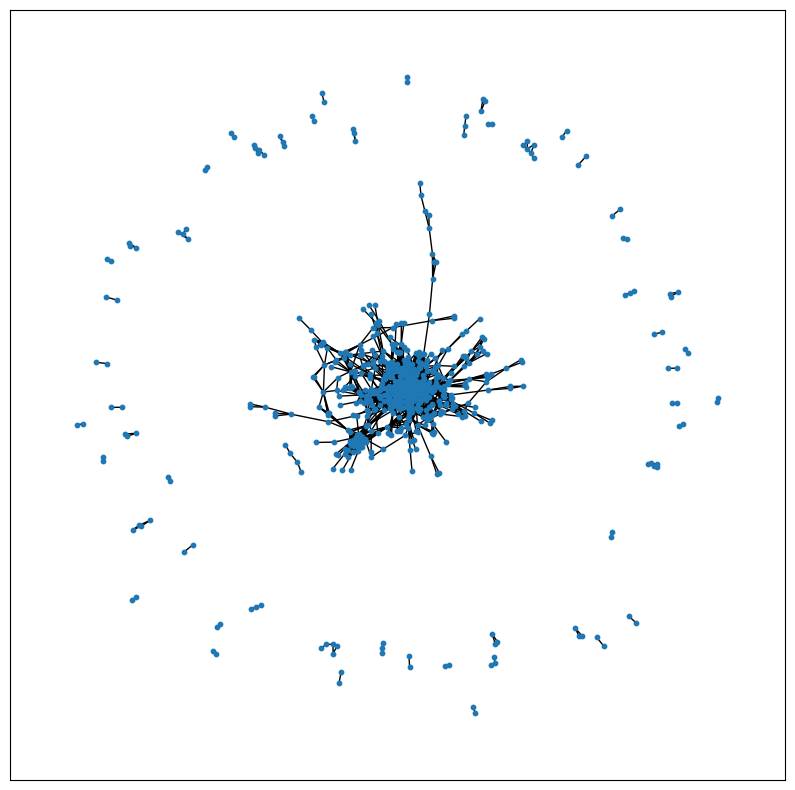

In [1099]:
# Create a graph from the co_investment_counts DataFrame

G = nx.from_pandas_edgelist(co_investment_counts, 'shareholder_name_mapped_x', 'shareholder_name_mapped_y', ['CoInvestments'])

# Draw the graph
pos = nx.spring_layout(G)
#make the graph bigger
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos, with_labels=False, node_size=10, edge_color='black')
#add a heatmap
#nx.draw_networkx_edge_labels(G, pos, edge_labels=co_investment_counts['Distance'])

plt.show()


In [1100]:
#get unique shareholder_ids in df_investment_rel_angel_startup
unique_shareholder_ids = df_investment_rel_angel_startup['shareholder_name_mapped'].unique()
len(unique_shareholder_ids)

937

In [1151]:
#Create a df_network_descrpiptive with the following variables:
#total_number_of_nodes
#total_number_of_edges
#average_degree
#median_degree
#average_clustering_coefficient
#median_clustering_coefficient
#average_shortest_path_length
#median_shortest_path_length
#average_eigenvector_centrality
#median_eigenvector_centrality
#average_betweenness_centrality
#median_betweenness_centrality
#average_closeness_centrality
#median_closeness_centrality
#average_pagerank
#median_pagerank

df_network_descriptive = pd.DataFrame(columns=("variable","value"))

#Calulate total number of nodes and add to df_network_descriptive with variable name "total_number_of_nodes"
total_number_of_nodes = len(G.nodes)
df_network_descriptive.loc[0] = ["total_number_of_nodes", total_number_of_nodes]

#Calulate total number of edges and add to df_network_descriptive with variable name "total_number_of_edges"
total_number_of_edges = len(G.edges)
df_network_descriptive.loc[1] = ["total_number_of_edges", total_number_of_edges]

#Calulate average degree and add to df_network_descriptive with variable name "average_degree"
average_degree = np.mean([G.degree(n) for n in G.nodes])
df_network_descriptive.loc[2] = ["average_degree", average_degree]

#Calulate median degree and add to df_network_descriptive with variable name "median_degree"
median_degree = np.median([G.degree(n) for n in G.nodes])
df_network_descriptive.loc[3] = ["median_degree", median_degree]

#Calulate average clustering coefficient and add to df_network_descriptive with variable name "average_clustering_coefficient"
average_clustering_coefficient = nx.average_clustering(G)
df_network_descriptive.loc[4] = ["average_clustering_coefficient", average_clustering_coefficient]

#Calulate median clustering coefficient and add to df_network_descriptive with variable name "median_clustering_coefficient"
median_clustering_coefficient = nx.average_clustering(G)
df_network_descriptive.loc[5] = ["median_clustering_coefficient", median_clustering_coefficient]

#Calculate eigenvector centrality per angel
eigenvector_centrality = nx.eigenvector_centrality(G)
#add to df_angels active
df_angels_active['eigenvector_centrality'] = df_angels_active['shareholder_name'].map(eigenvector_centrality)


#Calulate average eigenvector centrality and add to df_network_descriptive with variable name "average_eigenvector_centrality"
average_eigenvector_centrality = np.mean([v for k,v in nx.eigenvector_centrality(G).items()])
df_network_descriptive.loc[8] = ["average_eigenvector_centrality", average_eigenvector_centrality]

#Calulate median eigenvector centrality and add to df_network_descriptive with variable name "median_eigenvector_centrality"
median_eigenvector_centrality = np.median([v for k,v in nx.eigenvector_centrality(G).items()])
df_network_descriptive.loc[9] = ["median_eigenvector_centrality", median_eigenvector_centrality]

#Calulate average betweenness centrality and add to df_network_descriptive with variable name "average_betweenness_centrality"
average_betweenness_centrality = np.mean([v for k,v in nx.betweenness_centrality(G).items()])
df_network_descriptive.loc[10] = ["average_betweenness_centrality", average_betweenness_centrality]

#Calulate median betweenness centrality and add to df_network_descriptive with variable name "median_betweenness_centrality"
median_betweenness_centrality = np.median([v for k,v in nx.betweenness_centrality(G).items()])
df_network_descriptive.loc[11] = ["median_betweenness_centrality", median_betweenness_centrality]

#Calulate average closeness centrality and add to df_network_descriptive with variable name "average_closeness_centrality"
average_closeness_centrality = np.mean([v for k,v in nx.closeness_centrality(G).items()])
df_network_descriptive.loc[12] = ["average_closeness_centrality", average_closeness_centrality]

#Calulate median closeness centrality and add to df_network_descriptive with variable name "median_closeness_centrality"
median_closeness_centrality = np.median([v for k,v in nx.closeness_centrality(G).items()])
df_network_descriptive.loc[13] = ["median_closeness_centrality", median_closeness_centrality]

#Calulate average pagerank and add to df_network_descriptive with variable name "average_pagerank"
average_pagerank = np.mean([v for k,v in nx.pagerank(G).items()])
df_network_descriptive.loc[14] = ["average_pagerank", average_pagerank]

#Calulate median pagerank and add to df_network_descriptive with variable name "median_pagerank"
median_pagerank = np.median([v for k,v in nx.pagerank(G).items()])
df_network_descriptive.loc[15] = ["median_pagerank", median_pagerank]

#Calculate average number of co-investments per angel and add to df_network_descriptive with variable name "average_number_of_co_investments_per_angel"
average_number_of_co_investments_per_angel = co_investment_counts['CoInvestments'].mean()
df_network_descriptive.loc[16] = ["average_number_of_co_investments_per_angel", average_number_of_co_investments_per_angel]


#Calculate median number of co-investments per angel and add to df_network_descriptive with variable name "median_number_of_co_investments_per_angel"
median_number_of_co_investments_per_angel = co_investment_counts['CoInvestments'].median()
df_network_descriptive.loc[17] = ["median_number_of_co_investments_per_angel", median_number_of_co_investments_per_angel]
#Calculate maximum number of co-investments
maximum_number_of_co_investments = co_investment_counts['CoInvestments'].max()
df_network_descriptive.loc[18] = ["maximum_number_of_co_investments", maximum_number_of_co_investments]


df_network_descriptive

variable        value
0                        total_number_of_nodes   713.000000
1                        total_number_of_edges  2776.000000
2                               average_degree     7.786816
3                                median_degree     5.000000
4               average_clustering_coefficient     0.552061
5                median_clustering_coefficient     0.552061
8               average_eigenvector_centrality     0.009480
9                median_eigenvector_centrality     0.000022
10              average_betweenness_centrality     0.003202
11               median_betweenness_centrality     0.000380
12                average_closeness_centrality     0.148990
13                 median_closeness_centrality     0.175058
14                            average_pagerank     0.001403
15                             median_pagerank     0.001403
16  average_number_of_co_investments_per_angel     1.195605
17   median_number_of_co_investments_per_angel     1.000000
18            maximum_number_of_co_investments     6.000000

Average shortest path length: 4.52604376426366
Average clustering coefficient: 0.599394632614028
Is the original graph a small-world graph? True


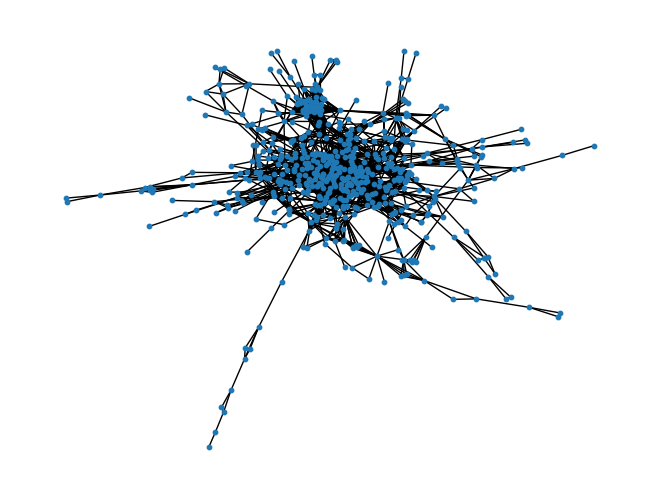

In [1102]:
#check network for largest connected component
largest_cc = max(nx.connected_components(G), key=len)
import networkx as nx
#show largest connected component
largest_cc_subgraph = G.subgraph(largest_cc)
#plot largest connected component
nx.draw(largest_cc_subgraph, with_labels=False, node_size=10, edge_color='black')


# # Calculate average shortest path length
avg_shortest_path_length = nx.average_shortest_path_length(largest_cc_subgraph)
print(f"Average shortest path length: {avg_shortest_path_length}")

# Calculate average clustering coefficient
avg_clustering_coeff = nx.average_clustering(largest_cc_subgraph)
print(f"Average clustering coefficient: {avg_clustering_coeff}")

import numpy as np
# Create a random graph with the same number of nodes and similar number of edges, force connectedness
random_graph = nx.connected_watts_strogatz_graph(n=total_number_of_nodes, k=4, p=0.5)

# Calculate metrics for the random graph
random_avg_shortest_path_length = nx.average_shortest_path_length(random_graph)
random_avg_clustering_coeff = nx.average_clustering(random_graph)

# Compare metrics
print(f"Is the original graph a small-world graph? {np.all([(avg_clustering_coeff > random_avg_clustering_coeff), (avg_shortest_path_length <= random_avg_shortest_path_length)])}")

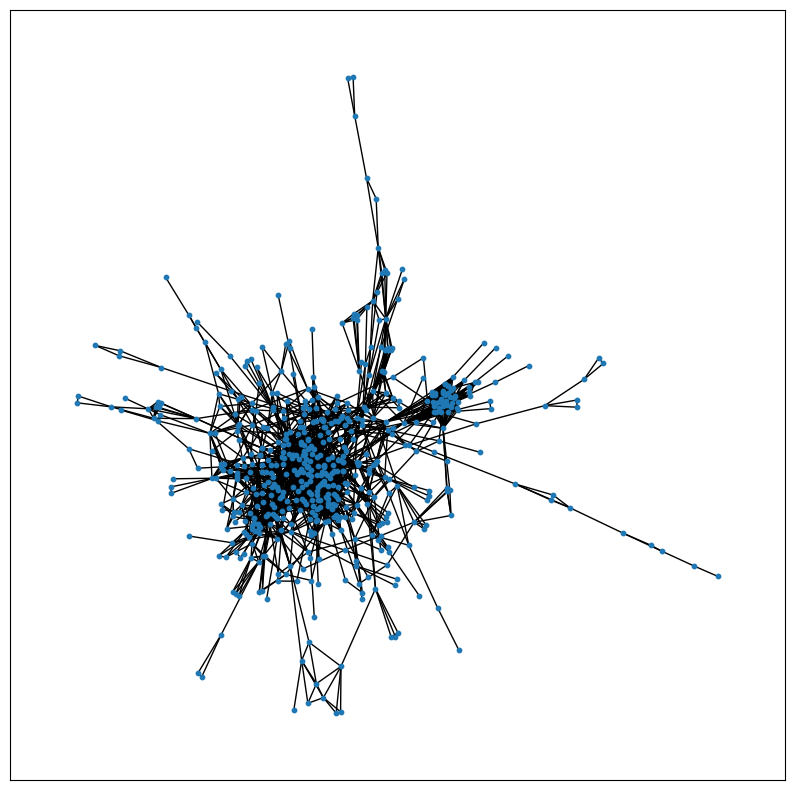

In [1103]:
#plot largest subgraph
# Create a subgraph of the largest connected component
largest_cc = max(nx.connected_components(G), key=len)
subgraph = G.subgraph(largest_cc)

# Draw the subgraph
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(10,10))
nx.draw_networkx(subgraph, pos, with_labels=False, node_size=10, edge_color='black')
#save as png
plt.savefig('graphs/largest_connected_component.png')
plt.show()


In [1104]:
#Create a df_network_descrpiptive with the following variables:
#total_number_of_nodes
#total_number_of_edges
#average_degree
#median_degree
#average_clustering_coefficient
#median_clustering_coefficient
#average_shortest_path_length
#median_shortest_path_length
#average_eigenvector_centrality
#median_eigenvector_centrality
#average_betweenness_centrality
#median_betweenness_centrality
#average_closeness_centrality
#median_closeness_centrality
#average_pagerank
#median_pagerank

df_network_descriptive = pd.DataFrame(columns=("variable","value"))

#Calulate total number of nodes and add to df_network_descriptive with variable name "total_number_of_nodes"
total_number_of_nodes = len(subgraph.nodes)
df_network_descriptive.loc[0] = ["total_number_of_nodes", total_number_of_nodes]

#Calulate total number of edges and add to df_network_descriptive with variable name "total_number_of_edges"
total_number_of_edges = len(subgraph.edges)
df_network_descriptive.loc[1] = ["total_number_of_edges", total_number_of_edges]

#Calulate average degree and add to df_network_descriptive with variable name "average_degree"
average_degree = np.mean([subgraph.degree(n) for n in subgraph.nodes])
df_network_descriptive.loc[2] = ["average_degree", average_degree]

#Calulate median degree and add to df_network_descriptive with variable name "median_degree"
median_degree = np.median([subgraph.degree(n) for n in subgraph.nodes])
df_network_descriptive.loc[3] = ["median_degree", median_degree]

#Calulate average clustering coefficient and add to df_network_descriptive with variable name "average_clustering_coefficient"
average_clustering_coefficient = nx.average_clustering(subgraph)
df_network_descriptive.loc[4] = ["average_clustering_coefficient", average_clustering_coefficient]

#Calulate median clustering coefficient and add to df_network_descriptive with variable name "median_clustering_coefficient"
median_clustering_coefficient = nx.average_clustering(subgraph)
df_network_descriptive.loc[5] = ["median_clustering_coefficient", median_clustering_coefficient]


#Calulate average eigenvector centrality and add to df_network_descriptive with variable name "average_eigenvector_centrality"
average_eigenvector_centrality = np.mean([v for k,v in nx.eigenvector_centrality(subgraph).items()])
df_network_descriptive.loc[8] = ["average_eigenvector_centrality", average_eigenvector_centrality]

#Calulate median eigenvector centrality and add to df_network_descriptive with variable name "median_eigenvector_centrality"
median_eigenvector_centrality = np.median([v for k,v in nx.eigenvector_centrality(subgraph).items()])
df_network_descriptive.loc[9] = ["median_eigenvector_centrality", median_eigenvector_centrality]

#Calulate average betweenness centrality and add to df_network_descriptive with variable name "average_betweenness_centrality"
average_betweenness_centrality = np.mean([v for k,v in nx.betweenness_centrality(subgraph).items()])
df_network_descriptive.loc[10] = ["average_betweenness_centrality", average_betweenness_centrality]

#Calulate median betweenness centrality and add to df_network_descriptive with variable name "median_betweenness_centrality"
median_betweenness_centrality = np.median([v for k,v in nx.betweenness_centrality(subgraph).items()])
df_network_descriptive.loc[11] = ["median_betweenness_centrality", median_betweenness_centrality]

#Calulate average closeness centrality and add to df_network_descriptive with variable name "average_closeness_centrality"
average_closeness_centrality = np.mean([v for k,v in nx.closeness_centrality(subgraph).items()])
df_network_descriptive.loc[12] = ["average_closeness_centrality", average_closeness_centrality]

#Calulate median closeness centrality and add to df_network_descriptive with variable name "median_closeness_centrality"
median_closeness_centrality = np.median([v for k,v in nx.closeness_centrality(subgraph).items()])
df_network_descriptive.loc[13] = ["median_closeness_centrality", median_closeness_centrality]

#Calulate average pagerank and add to df_network_descriptive with variable name "average_pagerank"
average_pagerank = np.mean([v for k,v in nx.pagerank(subgraph).items()])
df_network_descriptive.loc[14] = ["average_pagerank", average_pagerank]

#Calulate median pagerank and add to df_network_descriptive with variable name "median_pagerank"
median_pagerank = np.median([v for k,v in nx.pagerank(subgraph).items()])
df_network_descriptive.loc[15] = ["median_pagerank", median_pagerank]

#Calculate average number of co-investments per angel and add to df_network_descriptive with variable name "average_number_of_co_investments_per_angel"
average_number_of_co_investments_per_angel = co_investment_counts['CoInvestments'].mean()
df_network_descriptive.loc[16] = ["average_number_of_co_investments_per_angel", average_number_of_co_investments_per_angel]


#Calculate median number of co-investments per angel and add to df_network_descriptive with variable name "median_number_of_co_investments_per_angel"
median_number_of_co_investments_per_angel = co_investment_counts['CoInvestments'].median()
df_network_descriptive.loc[17] = ["median_number_of_co_investments_per_angel", median_number_of_co_investments_per_angel]
#Calculate maximum number of co-investments
maximum_number_of_co_investments = co_investment_counts['CoInvestments'].max()
df_network_descriptive.loc[18] = ["maximum_number_of_co_investments", maximum_number_of_co_investments]


df_network_descriptive

variable        value
0                        total_number_of_nodes   573.000000
1                        total_number_of_edges  2665.000000
2                               average_degree     9.301920
3                                median_degree     6.000000
4               average_clustering_coefficient     0.599395
5                median_clustering_coefficient     0.599395
8               average_eigenvector_centrality     0.011797
9                median_eigenvector_centrality     0.000052
10              average_betweenness_centrality     0.006175
11               median_betweenness_centrality     0.001745
12                average_closeness_centrality     0.230048
13                 median_closeness_centrality     0.234811
14                            average_pagerank     0.001745
15                             median_pagerank     0.001635
16  average_number_of_co_investments_per_angel     1.195605
17   median_number_of_co_investments_per_angel     1.000000
18            maximum_number_of_co_investments     6.000000

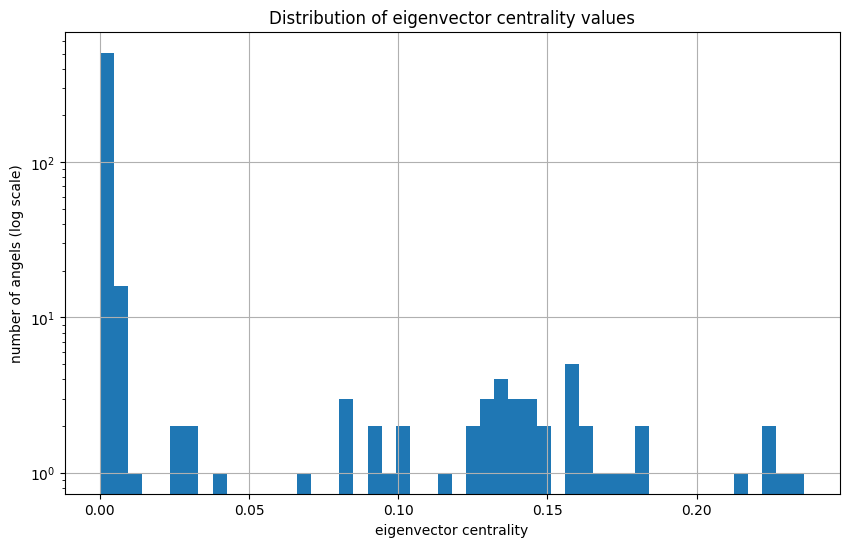

In [1105]:
#plot distribution of eigenvector centrality values, start plot with 0.1 and end with 0.2
eigenvector_cebtrality_values= [v for k,v in nx.eigenvector_centrality(subgraph).items()]
#add to df_angels active
df_angels_active['eigenvector_centrality'] = df_angels_active['shareholder_name'].map(nx.eigenvector_centrality(subgraph))
plt.figure(figsize=(10, 6))
plt.hist(eigenvector_cebtrality_values, bins=50, log=True, range=(0, max(eigenvector_cebtrality_values)))
plt.title('Distribution of eigenvector centrality values')
plt.xlabel('eigenvector centrality')
plt.ylabel('number of angels (log scale)')
plt.grid(True)

# plt.xticks(np.arange(0.2, 0.1))
# #Swap x and y axis

# #add title
# plt.title('Distribution of eigenvector centrality values')
# #add x label
# plt.xlabel('eigenvector centrality')
# #add y label
# plt.ylabel('number of angels')
# #add labels on x axis
# plt.xticks(rotation=90)
# #remove top and right spines
# plt.gca().spines['top'].set_visible(False)

# #export graph as image called "Distribution of eigenvector centrality values.png"
plt.savefig('graphs/Distribution of eigenvector centrality values.png')
plt.show()

In [1106]:
df_angels_active

shareholder_name_old shareholder_id  \
23              Settels Ventures UG (haftungsbeschränkt)         9735.0   
51                     GingerCat UG (haftungsbeschränkt)        15457.0   
82                                            8eyes GmbH         6554.0   
93     Michael Truch Holding GmbH Michael Truch Holdi...         2873.0   
108                                  Boston Venture GmbH        20212.0   
...                                                  ...            ...   
18614                                     Heide, Henning        18017.0   
18695              Prof. Dr. Alexander Grossmann, Putbus        18138.0   
18705                                      Markus Hammes        18149.0   
18896                                        Ralph Lägel        18372.0   
19878                                        Kiana Mardi         7503.0   

                          created_at  number_of_investments shareholder_type  \
23     2024-03-10 17:37:24.528696+00                      2            angel   
51     2024-03-10 17:37:27.447081+00                      2            angel   
82     2024-03-10 17:37:22.963246+00                      2            angel   
93     2024-03-10 17:37:20.561047+00                      2            angel   
108    2024-03-10 17:37:30.929372+00                      5            angel   
...                              ...                    ...              ...   
18614  2024-03-10 17:37:29.143888+00                      2            angel   
18695  2024-03-10 17:37:29.143888+00                      2            angel   
18705  2024-03-10 17:37:29.143888+00                      2            angel   
18896  2024-03-10 17:37:29.143888+00                      2            angel   
19878  2024-03-10 17:37:22.963246+00                      2            angel   

       register_id               register_court  total_participation  \
23             NaN  Charlottenburg HRB 159694 B             9.035000   
51      HRB 157901                     B Berlin             1.520000   
82     FN 411158 w          Firmenbuch von Wien             0.486050   
93         AG Köln                         Köln                  NaN   
108     HRB 222892                      München             1.554123   
...            ...                          ...                  ...   
18614          NaN                          NaN            10.000000   
18695          NaN                          NaN            58.350000   
18705          NaN                          NaN             5.430000   
18896          NaN                          NaN             0.972950   
19878          NaN                          NaN             1.525000   

       register_mapping                                shareholder_purpose  \
23                  NaN                                                NaN   
51                  NaN                                                NaN   
82                  NaN                      {"shareholder_purpose": null}   
93                568.0  {"shareholder_purpose": "die Verwaltung von ei...   
108               136.0  {"shareholder_purpose": "Eingehen, Halten und ...   
...                 ...                                                ...   
18614               NaN                                                NaN   
18695               NaN                                                NaN   
18705               NaN                                                NaN   
18896               NaN                                                NaN   
19878               NaN                                                NaN   

       ... stuttgart leipzig cologne frankfurt hamburg other international  \
23     ...       0.0     0.0     0.0       0.0     1.0   0.0           0.0   
51     ...       0.0     0.0     0.0       0.0     0.0   0.0           0.0   
82     ...       0.0     0.0     0.0       0.0     0.0   0.0           0.0   
93     ...       0.0     0.0     2.0       0.0     0.0   0.0

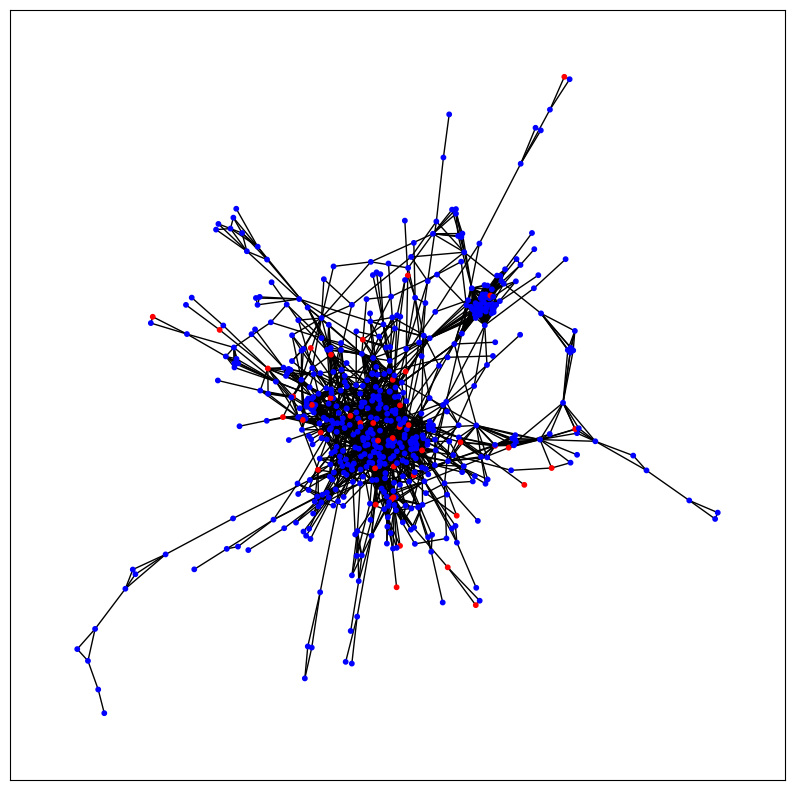

In [1107]:
#color the nodes in red, where gender in df_angels is female
female_shareholders = set(df_angels_active[df_angels_active['gender'] == 'female']['shareholder_name'])
#replace space with _ in all names of female shareholders
# Replace spaces with underscores in the names of female shareholders
female_shareholders = {name.replace(" ", "_") for name in female_shareholders}

# Create a list of node colors
node_colors = ['red' if node in female_shareholders else 'blue' for node in subgraph.nodes]
node_sizes = [10 if node in female_shareholders else 10 for node in subgraph.nodes]
# Draw the graph
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(10,10))
nx.draw_networkx(subgraph, pos, with_labels=False, node_size=node_sizes, edge_color='black', node_color=node_colors)
#save as png

plt.show()

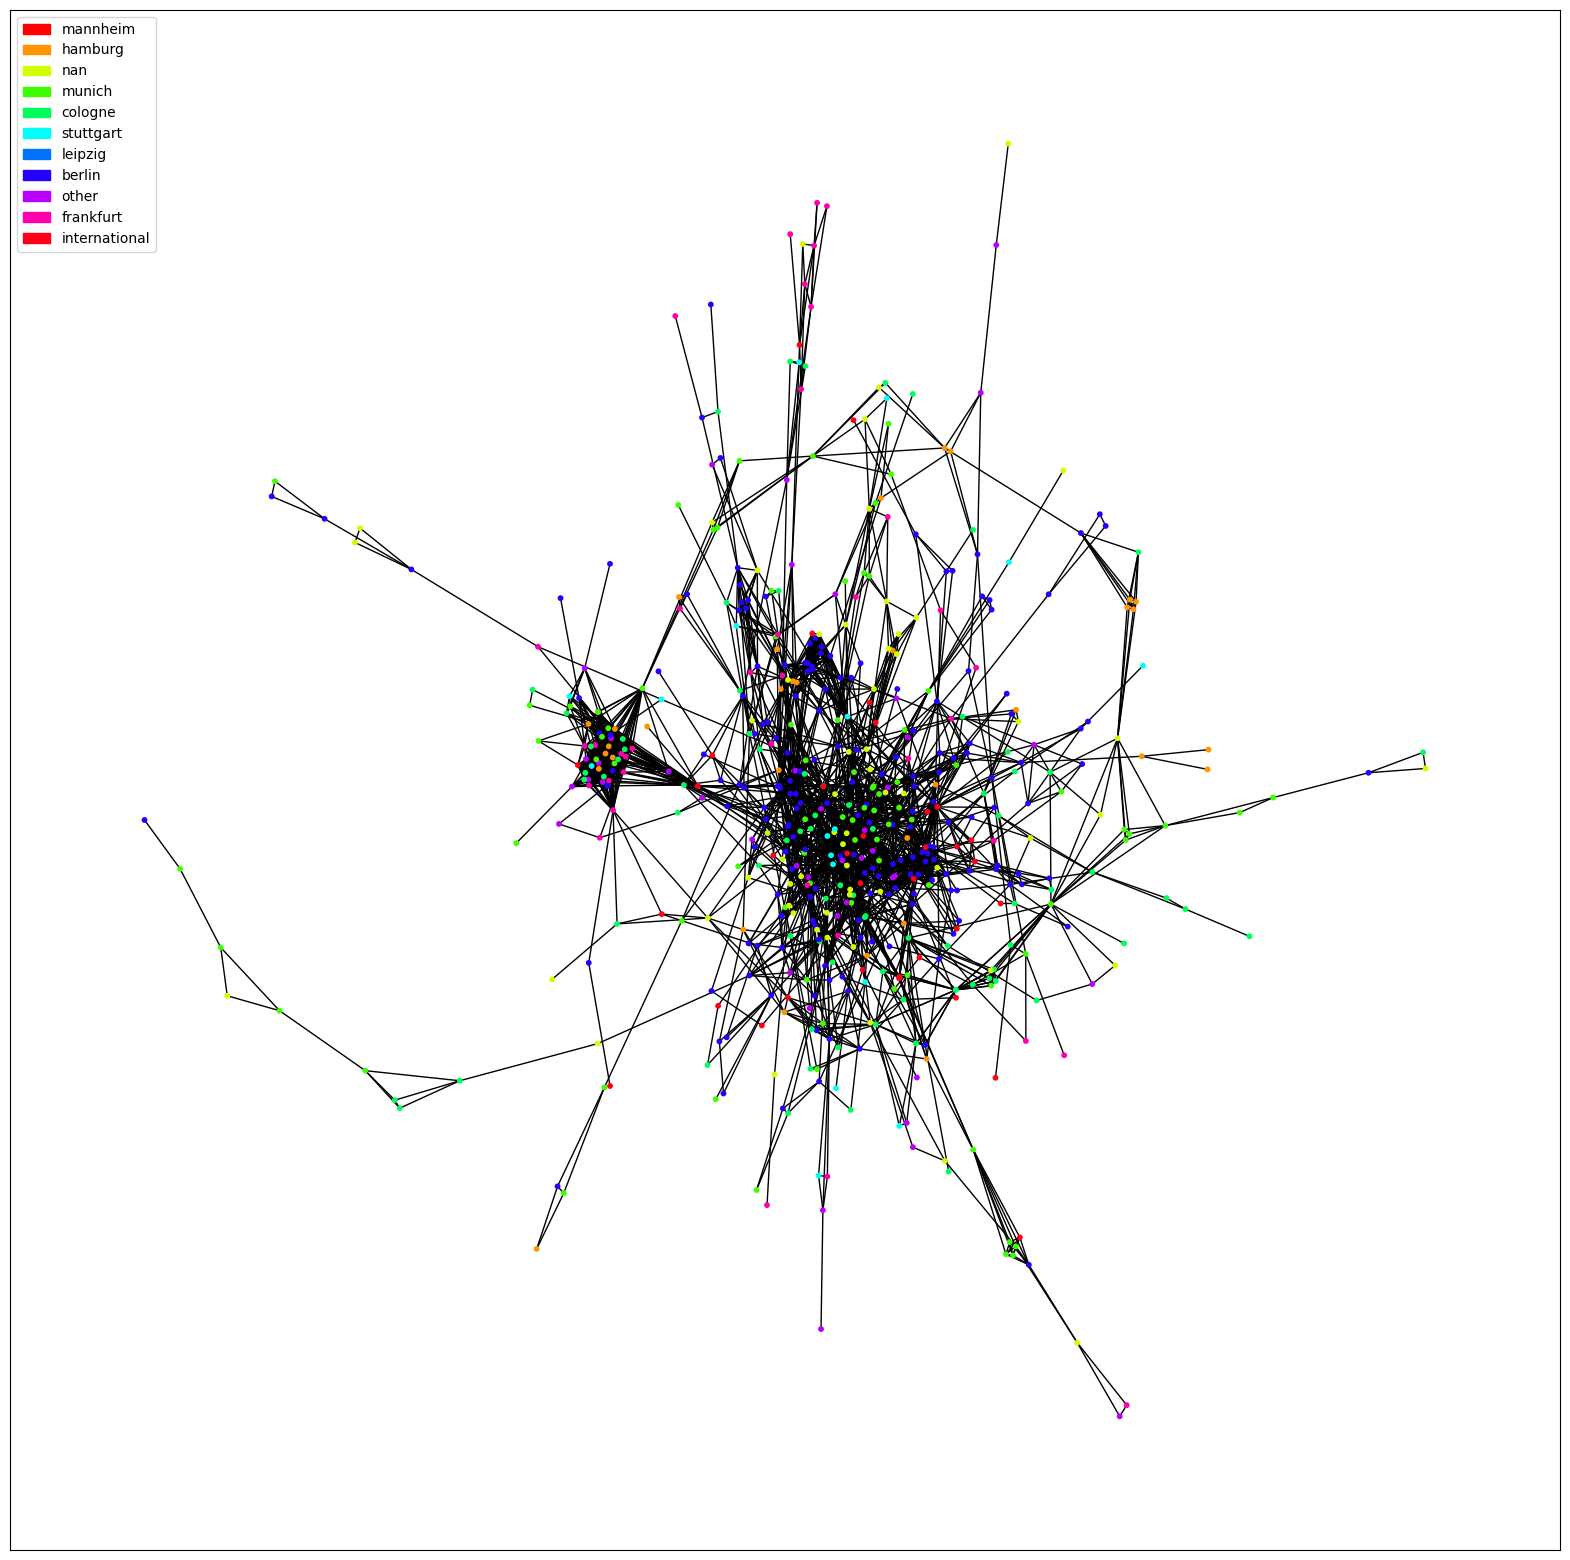

In [1108]:
from matplotlib import patches


df_angels_active_temp = df_angels_active
df_angels_active_temp['shareholder_name'] = df_angels_active['shareholder_name'].str.replace(" ", "_")
# Create a dictionary of region mappings
region_mapping = df_angels_active.set_index('shareholder_name')['region_mapping'].to_dict()

# Generate unique colors for each region
unique_regions = set(region_mapping.values())
colors = plt.cm.tab10.colors  # Using a tab10 colormap for up to 10 unique regions
if len(unique_regions) > len(colors):
    colors = plt.cm.hsv(np.linspace(0, 1, len(unique_regions)))  # Use hsv for more than 10

region_colors = dict(zip(unique_regions, colors))

# Create a list of node colors based on their region
node_colors = [region_colors.get(region_mapping.get(node), 'grey') for node in subgraph.nodes()]
#add information of which color is whoch region to the graph
# Create a legend for the regions


# Draw the graph
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(20, 20))
nx.draw_networkx(subgraph, pos, with_labels=False, node_size=10, edge_color='black', node_color=node_colors, cmap=plt.cm.hsv)
# Create a legend
# Create a legend
patch_list = [patches.Patch(color=color, label=region) for region, color in region_colors.items()]
plt.legend(handles=patch_list, loc='upper left')


# Save as PNG
plt.savefig('graphs/Network_graph_with_region_mapping.png')

# Display the plot
plt.show()

#add information of which color is whoch region to the graph


## Simulating a network - 3



In [1109]:
# #retrun df_angels_active where region_mapping is unknown
# df_angels_active[df_angels_active['region_mapping'] == 'unknown'] ="other"

# df_angels_active[df_angels_active['healthcare'].isna()]

# #drop where healthcare is na
# df_angels_active = df_angels_active.dropna(subset=['healthcare'])
# df_angels_active[df_angels_active['energy_environment_infrastructure'].isna()]
#get back where startup_industry mapped is other#get unique values in startup_region_mapping
unique_values = df_startups['region_mapping'].unique()
unique_values





array(['berlin', 'munich', 'hamburg', 'other', 'cologne', 'stuttgart',
       'frankfurt', 'leipzig'], dtype=object)

In [1110]:
#sum of all number of angels in df startup
sum_number_angels = df_startups['number_angels'].sum()
sum_number_angels

2182.0

In [1415]:
# Initialize an empty DataFrame to record the simulated investment relations
df_investment_rel_angel_startup_simulated = pd.DataFrame()

# Initialize a dictionary to keep track of the angels that have invested in each startup
angel_startup_map = {}
df_angels_active['number_of_simulated_investments'] = 0
# Loop through each startup
for _, startup in df_startups.iterrows():
    x = 0
    
    # Initialize an empty list for each startup to keep track of its angels
    angel_startup_map[startup['startup_name']] = []
    while x < startup['number_angels']:
        #cast to int
        df_angels_active[startup['region_mapping']] = pd.to_numeric(df_angels_active[startup['region_mapping']], errors='coerce').fillna(1).astype(int)
        # Filter angels based on the criteria: active status, minimum 1 investment in the startup's startup_industry_mapped, and same location as the startup
        
        eligible_angels = df_angels_active[(df_angels_active['status'] == "active") & 
                                    ((df_angels_active[startup['startup_industry_mapped']].astype(int) >= 2) |
                                    (df_angels_active[startup['region_mapping']] >= 2)) &
                                    (~df_angels_active['shareholder_name'].isin(angel_startup_map[startup['startup_name']]))
                                    #check if number of investments is less than number of simulated investments for the respective shareholder_name
                                    & (df_angels_active['number_of_simulated_investments'] < df_angels_active['number_of_investments'])]
                                                        
        
        # If there are eligible angels
        if not eligible_angels.empty:
            # Sample a random angel from the eligible angels with higher probability for those with higher number of investments
            # Calculate the probability of drawing each angel but have a randomness factor in it
            
            eligible_angels['investment_probability'] = eligible_angels['number_of_investments'] / eligible_angels['number_of_investments'].sum()
            #add randomness factor
            
            # Sample an angel based on the probability
            sampled_angel = eligible_angels.sample(n=1, weights='investment_probability')
                
            
            # Create a record of the investment relationship
            investment_record = pd.DataFrame({
                'startup_name': [startup['startup_name']],
                'angel': [sampled_angel.iloc[0]['shareholder_name']],  # Assuming df_angels_active has a 'shareholder_name' column
                'startup_industry_mapped': [startup['startup_industry_mapped']],  # Assuming df_startups has an 'startup_industry_mapped' column
                'region': [sampled_angel.iloc[0]['region_mapping']],  # Assuming df_angels_active has a 'location' column
                'startup_location': [startup['startup_location']],  # Assuming df_startups has a 'location' column
                'total_participation_in_percent': [sampled_angel.iloc[0]['total_participation']],  # Assuming df_angels_active has a 'total_participation' column
                'birthdate': [sampled_angel.iloc[0]['birthdate']]  # Assuming df_angels_active has a 'birthdate' column
            })
            
            # Append the record to the df_investment_rel_angel_startup DataFrame
            df_investment_rel_angel_startup_simulated = df_investment_rel_angel_startup_simulated.append(investment_record, ignore_index=True)
            #increase number of simulated investments where angel matches shareholder_name in df_angels_active
            df_angels_active.loc[df_angels_active['shareholder_name'] == sampled_angel.iloc[0]['shareholder_name'], 'number_of_simulated_investments'] += 1
            

            
            # Add the angel to the list of drawn angels for the startup
            angel_startup_map[startup['startup_name']].append(sampled_angel.iloc[0]['shareholder_name'])
            
            x += 1
        else:
            # If no eligible angel is left, relax the location criterion and take an angel that fulfills all criteria except location
            eligible_angels = df_angels_active[(df_angels_active['status'] == "active") & 
                                     (df_angels_active[startup['startup_industry_mapped']].astype(int) >= 1) &
                                     (~df_angels_active['shareholder_name'].isin(angel_startup_map[startup['startup_name']]))
                                     & (df_angels_active['number_of_simulated_investments'] < df_angels_active['number_of_investments'])]
            if not eligible_angels.empty:
                # Sample a random angel from the eligible angels with higher probability for those with higher number of investments
                # Calculate the probability of drawing each angel
                eligible_angels['investment_probability'] = eligible_angels['number_of_investments'] / eligible_angels['number_of_investments'].sum()
                
                # Sample an angel based on the probability
                sampled_angel = eligible_angels.sample(n=1, weights='investment_probability')
                    
        
                # Create a record of the investment relationship
                investment_record = pd.DataFrame({
                    'startup_name': [startup['startup_name']],
                    'angel': [sampled_angel.iloc[0]['shareholder_name']],
                    'startup_industry_mapped': [startup['startup_industry_mapped']],
                    'region': [sampled_angel.iloc[0]['region_mapping']],
                    'total_participation_in_percent': [sampled_angel.iloc[0]['total_participation']],
                    'startup_location': [startup['startup_location']],  # Assuming df_startups has a 'location' column
                    'birthdate': [sampled_angel.iloc[0]['birthdate']]
                })
            
                # Append the record to the df_investment_rel_angel_startup DataFrame
                df_investment_rel_angel_startup_simulated = df_investment_rel_angel_startup_simulated.append(investment_record, ignore_index=True)
                df_angels_active.loc[df_angels_active['shareholder_name'] == sampled_angel.iloc[0]['shareholder_name'], 'number_of_simulated_investments'] += 1
                # Add the angel to the list of drawn angels for the startup
                angel_startup_map[startup['startup_name']].append(sampled_angel.iloc[0]['shareholder_name'])
            
                x += 1
            else:
                # If no eligible angel is still left, take any active and eligible angel regardless of startup_industry_mapped
                eligible_angels = df_angels_active[(df_angels_active['status'] == "active") & 
                                    (~df_angels_active['shareholder_name'].isin(angel_startup_map[startup['startup_name']]))&
                                     #get all angels where number of simulated investments is less than number of investments
                                    (df_angels_active['number_of_simulated_investments'] < df_angels_active['number_of_investments'])]                                    
                                     
                if not eligible_angels.empty:
                    # Sample a random angel from the eligible angels
                    eligible_angels['investment_probability'] = eligible_angels['number_of_investments'] / eligible_angels['number_of_investments'].sum()
                    
                    sampled_angel = eligible_angels.sample(n=1, weights='investment_probability')
                    # Create a record of the investment relationship
                    investment_record = pd.DataFrame({
                        'startup_name': [startup['startup_name']],
                        'angel': [sampled_angel.iloc[0]['shareholder_name']],
                        'startup_industry_mapped': [startup['startup_industry_mapped']],
                        'region': [sampled_angel.iloc[0]['region_mapping']],
                        'startup_location': [startup['startup_location']],  # Assuming df_startups has a 'location' column
                        'total_participation_in_percent': [sampled_angel.iloc[0]['total_participation']],
                        'birthdate': [sampled_angel.iloc[0]['birthdate']]
                    })
            
                    # Append the record to the df_investment_rel_angel_startup DataFrame
                    df_investment_rel_angel_startup_simulated = df_investment_rel_angel_startup_simulated.append(investment_record, ignore_index=True)
                    df_angels_active.loc[df_angels_active['shareholder_name'] == sampled_angel.iloc[0]['shareholder_name'], 'number_of_simulated_investments'] += 1
                    # Add the angel to the list of drawn angels for the startup
                    angel_startup_map[startup['startup_name']].append(sampled_angel.iloc[0]['shareholder_name'])
            
                    x += 1
                else:
                    print("No eligible angel left")

In [1416]:
#calculate total sum of angel investors
total_number_of_angel_investors = len(df_investment_rel_angel_startup_simulated)
print(total_number_of_angel_investors)

2182


In [1417]:
#create a network graph from the simulated data
# Create a new DataFrame where each row represents a co-investment
co_investments_simulated = df_investment_rel_angel_startup_simulated.merge(df_investment_rel_angel_startup_simulated, on='startup_name')

# Filter out rows where the investor is the same in both columns
co_investments_simulated = co_investments_simulated[co_investments_simulated['angel_x'] != co_investments_simulated['angel_y']]
# # Create a table with the number of co-investments for each pair of investors
co_investment_counts_simulated = co_investments_simulated.groupby(['angel_x', 'angel_y']).size().reset_index(name='CoInvestments')

#replace all spaces with _ in name_x
co_investment_counts_simulated['angel_x'] = co_investment_counts_simulated['angel_x'].str.replace(' ', '_')
co_investment_counts_simulated['angel_y'] = co_investment_counts_simulated['angel_y'].str.replace(' ', '_')

co_investment_counts_simulated.to_csv('co_investment_counts_simulated.csv', index=False)

#sort by number of co-investments
co_investment_counts_simulated = co_investment_counts_simulated.sort_values(by=['CoInvestments'], ascending=False)
print(co_investment_counts_simulated)




                              angel_x  \
3002               Jacobo_Invest_GmbH   
1198    Charles_Maxim_Rolfe_Songhurst   
2830                  Inventures_GmbH   
730              Bochum_Ventures_GmbH   
3340  Koehler_Investment_Holding_GmbH   
...                               ...   
2155                  Fischer,_Daniel   
2154              Final_Frontier_GmbH   
2153              Final_Frontier_GmbH   
2152              Final_Frontier_GmbH   
6451  wrapall_UG_(haftungsbeschränkt)   

                                                angel_y  CoInvestments  
3002                      Charles_Maxim_Rolfe_Songhurst              3  
1198                                 Jacobo_Invest_GmbH              3  
2830                                        TactiQ_GmbH              2  
730                                  Jacobo_Invest_GmbH              2  
3340                                       Dr._Udo_Jung              2  
...                                                 ...            ..

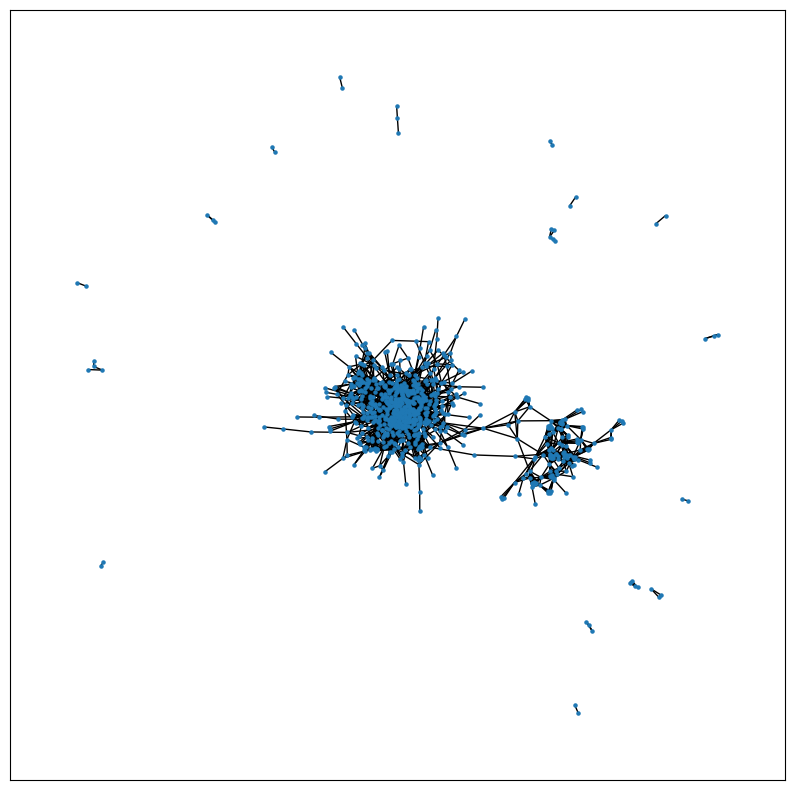

In [1418]:
#plot network graph of simulated data
# Create a graph from the co_investment_counts DataFrame

G_simulated = nx.from_pandas_edgelist(co_investment_counts_simulated, 'angel_x', 'angel_y', ['CoInvestments'])

# Draw the graph
pos = nx.spring_layout(G_simulated)
#make the graph bigger
plt.figure(figsize=(10,10))
nx.draw_networkx(G_simulated, pos, with_labels=False, node_size=5, edge_color='black')
#add a heatmap
#nx.draw_networkx_edge_labels(G, pos, edge_labels=co_investment_counts['Distance'])
#save graph as png
plt.savefig('graphs/Simulated Network Graph.png')
plt.show()



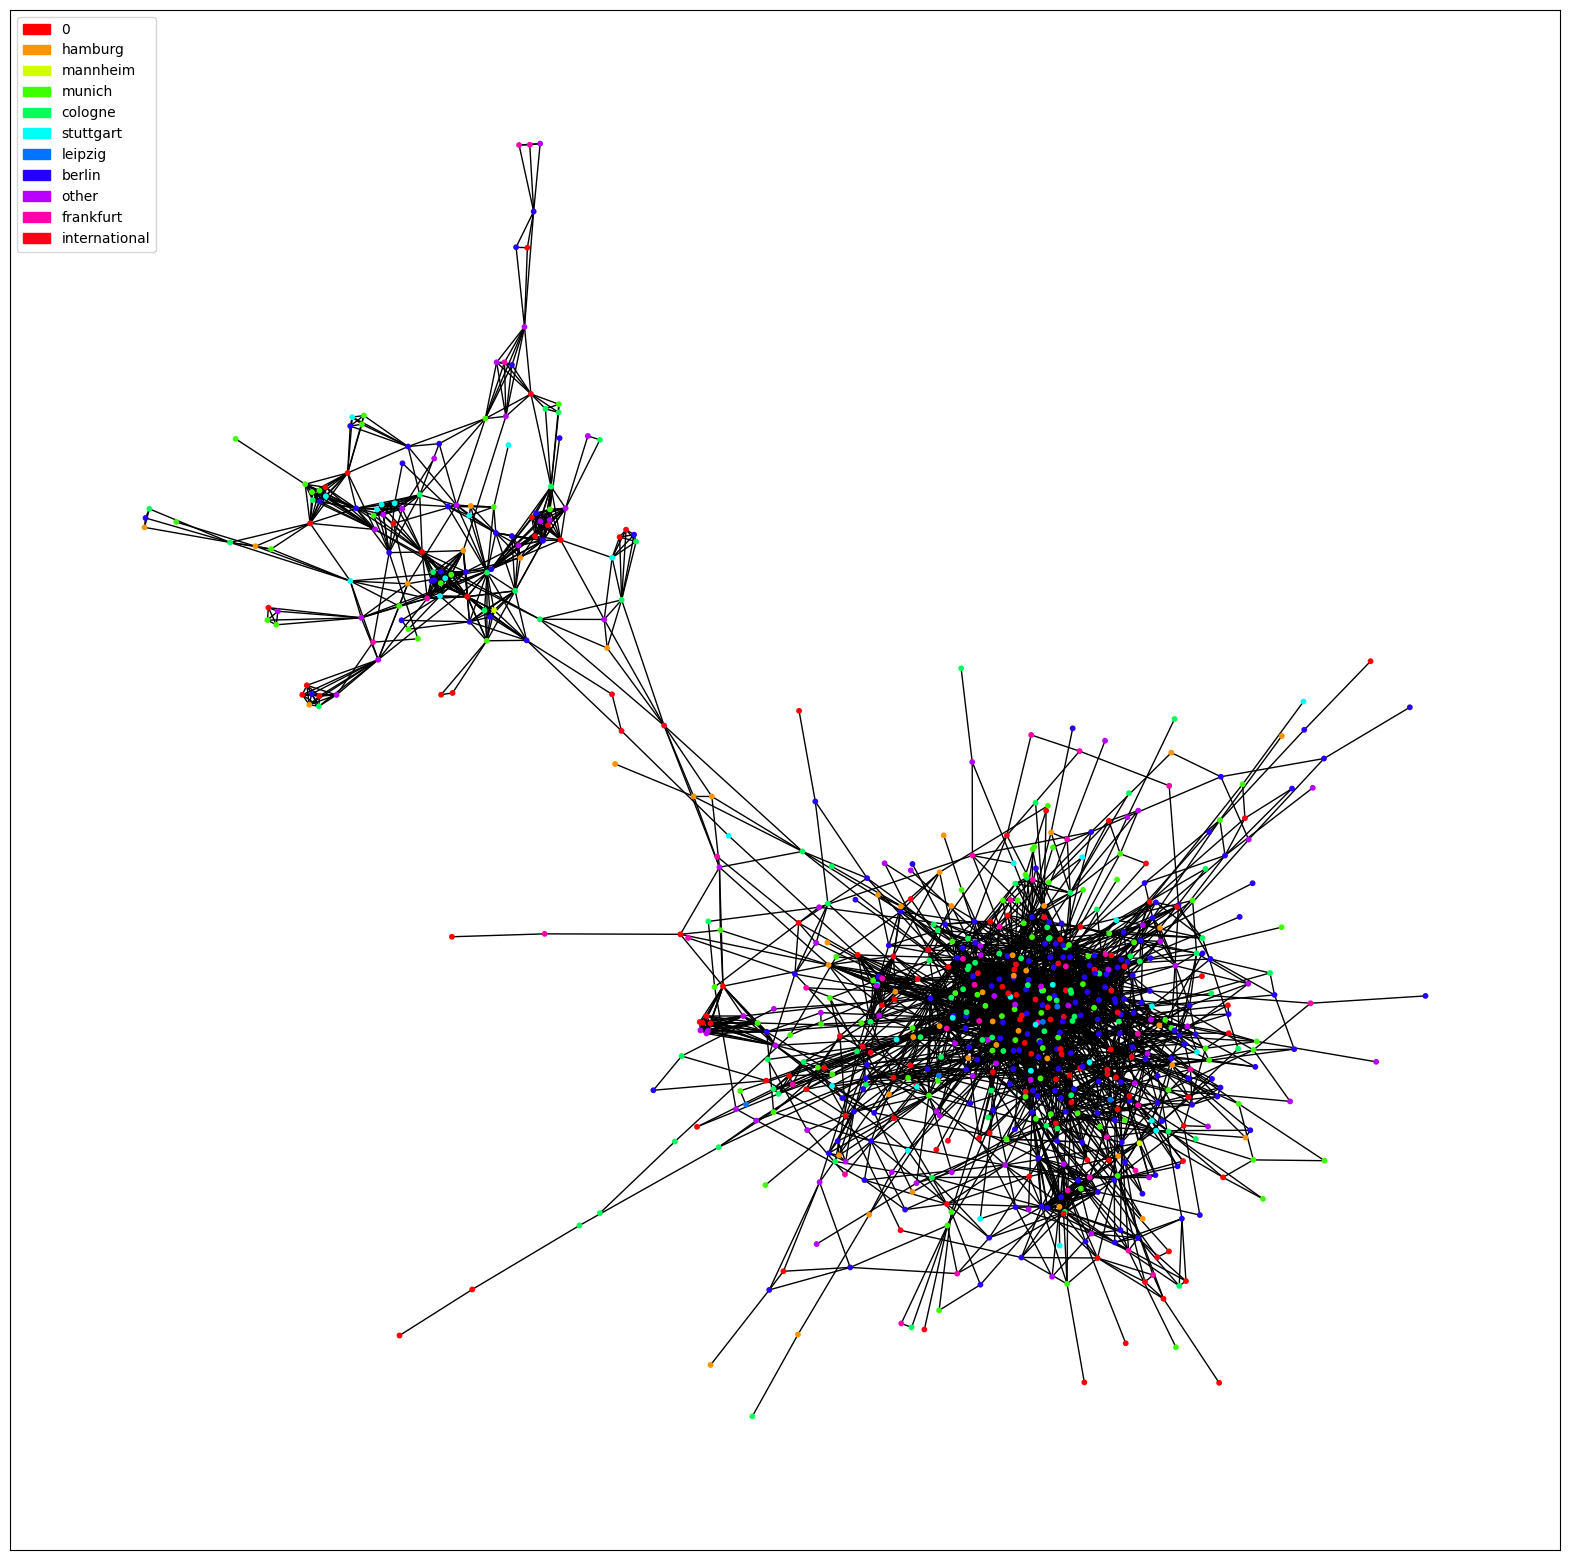

In [1419]:
from matplotlib import patches

#get largest subgraph_simulated
largest_cc_simulated = max(nx.connected_components(G_simulated), key=len)
subgraph_simulated = G_simulated.subgraph(largest_cc_simulated)

df_angels_active_temp = df_angels_active
df_angels_active_temp['shareholder_name'] = df_angels_active['shareholder_name'].str.replace(" ", "_")
# Create a dictionary of region mappings
region_mapping = df_angels_active.set_index('shareholder_name')['region_mapping'].to_dict()

# Generate unique colors for each region
unique_regions = set(region_mapping.values())
colors = plt.cm.tab10.colors  # Using a tab10 colormap for up to 10 unique regions
if len(unique_regions) > len(colors):
    colors = plt.cm.hsv(np.linspace(0, 1, len(unique_regions)))  # Use hsv for more than 10

region_colors = dict(zip(unique_regions, colors))

# Create a list of node colors based on their region
node_colors = [region_colors.get(region_mapping.get(node), 'grey') for node in subgraph_simulated.nodes()]
#add information of which color is whoch region to the graph
# Create a legend for the regions


# Draw the graph
pos = nx.spring_layout(subgraph_simulated)
plt.figure(figsize=(20, 20))
nx.draw_networkx(subgraph_simulated, pos, with_labels=False, node_size=10, edge_color='black', node_color=node_colors, cmap=plt.cm.hsv)
# Create a legend
# Create a legend
patch_list = [patches.Patch(color=color, label=region) for region, color in region_colors.items()]
plt.legend(handles=patch_list, loc='upper left')


# Save as PNG
plt.savefig('graphs/Network_graph_with_region_mapping_simulated.png')

# Display the plot
plt.show()

#add information of which color is whoch region to the graph


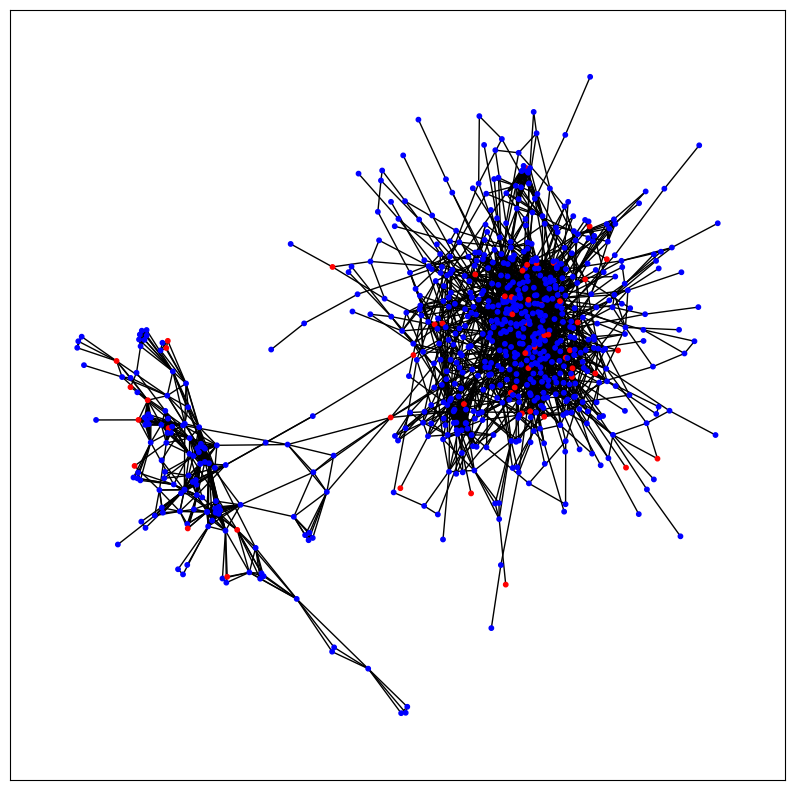

In [1420]:
#color the nodes in red, where gender in df_angels is female
female_shareholders = set(df_angels_active[df_angels_active['gender'] == 'female']['shareholder_name'])
#replace space with _ in all names of female shareholders
# Replace spaces with underscores in the names of female shareholders
female_shareholders = {name.replace(" ", "_") for name in female_shareholders}

# Create a list of node colors
node_colors = ['red' if node in female_shareholders else 'blue' for node in subgraph_simulated.nodes]
node_sizes = [10 if node in female_shareholders else 10 for node in subgraph_simulated.nodes]
# Draw the graph
pos = nx.spring_layout(subgraph_simulated)
plt.figure(figsize=(10,10))
nx.draw_networkx(subgraph_simulated, pos, with_labels=False, node_size=node_sizes, edge_color='black', node_color=node_colors)
#save as png

plt.show()

In [1421]:
#Draw a network graph of active angels only
# Create a new DataFrame where each row represents a co-investment

#only consider active angels in df_investment_rel_angel_startup
#match status from df_angels to df_investment_rel_angel_startup
#df_investment_rel_angel_startup = df_investment_rel_angel_startup.merge(df_angels[['name','status']], left_on='name', right_on='name', how='left')
#only consider active angels
# df_investment_rel_angel_startup_active = df_investment_rel_angel_startup[df_investment_rel_angel_startup['status'] == 'active']

co_investments_active = df_investment_rel_angel_startup.merge(df_investment_rel_angel_startup, on='startup_name')

# Filter out rows where the investor is the same in both columns
co_investments_active = co_investments_active[co_investments_active['shareholder_name_mapped_x'] != co_investments_active['shareholder_name_mapped_y']]
# # Create a table with the number of co-investments for each pair of investors
co_investment_counts_active = co_investments_active.groupby(['shareholder_name_mapped_x', 'shareholder_name_mapped_y']).size().reset_index(name='CoInvestments')

#replace all spaces with _ in shareholder_name_mapped_x
co_investment_counts_active['shareholder_name_mapped_x'] = co_investment_counts_active['shareholder_name_mapped_x'].str.replace(' ', '_')
co_investment_counts_active['shareholder_name_mapped_y'] = co_investment_counts_active['shareholder_name_mapped_y'].str.replace(' ', '_')

co_investment_counts_active.to_csv('co_investment_counts_active.csv', index=False)

#sort by number of co-investments
co_investment_counts_active = co_investment_counts_active.sort_values(by=['CoInvestments'], ascending=False)
print(co_investment_counts_active)

            shareholder_name_mapped_x  \
5527                   whiletrue_GmbH   
4089                ROMM_Holding_GmbH   
4358     Roskopf_Ventures_GmbH_Berlin   
4081                ROMM_Holding_GmbH   
259                        Alvio_GmbH   
...                               ...   
1977      Founders_First_Capital_GmbH   
1976      Founders_First_Capital_GmbH   
1975      Founders_First_Capital_GmbH   
1974      Founders_First_Capital_GmbH   
5551  wrapall_UG_(haftungsbeschränkt)   

                              shareholder_name_mapped_y  CoInvestments  
5527                                  ROMM_Holding_GmbH              6  
4089                                     whiletrue_GmbH              6  
4358                                  ROMM_Holding_GmbH              6  
4081                       Roskopf_Ventures_GmbH_Berlin              6  
259                                      whiletrue_GmbH              5  
...                                                 ...            ..

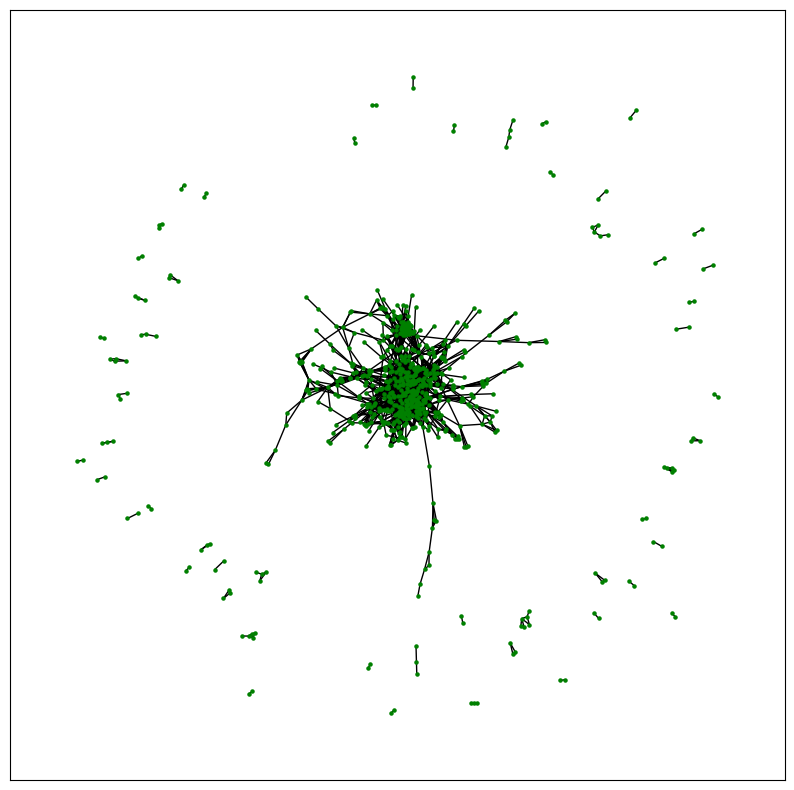

In [1422]:
#plot network graph of active angels only
# Create a graph from the co_investment_counts DataFrame

G_active = nx.from_pandas_edgelist(co_investment_counts_active, 'shareholder_name_mapped_x', 'shareholder_name_mapped_y', ['CoInvestments'])

# Draw the graph
pos = nx.spring_layout(G_active)
#make the graph bigger
plt.figure(figsize=(10,10))
# make nodes bigger in the graph
nx.draw_networkx(G_active, pos, with_labels=False, node_size=5, edge_color='black', node_color='green')

#Save graph as png
plt.savefig('graphs/Active Angels Network Graph.png')

## Detecting communities - 4



In [1423]:
from cdlib import algorithms
import networkx as nx
import igraph as ig

In [1424]:
# Was nutzen wir (angelehnt an bubna, aber deren walk trap ausgetaischt mit apparently more robus leiden algorithmus) considered
# - Leiden (von louvain zu Leiden)
# - minimum 5 community members
# - diameter of the community not larger than 1/4 of the diameter of the largest connected subgraph

#Community detection, where we remove all communitiues that are only composed of less than 5 nodes or which have a diameter larger than 1/4 of the network diameter
from cdlib import algorithms
# Create a networkx graph (replace this with your graph)
def detectCommunities(G, method):
    # Apply the Walktrap algorithm to the graph
    if method == 'walktrap':
        coms = algorithms.walktrap(G)
    if method == 'louvain':
        coms = algorithms.louvain(G)
    if method == 'leiden':
        coms = algorithms.leiden(G)
    if method == 'infomap':
        coms = algorithms.infomap(G)
    print(f"We are using the {method} algorithm to detect communities\n")

    print("The network has "+ str(G.number_of_nodes())+" nodes\n")
    print("We detected "+str(len(coms.communities))+' communities\n')

    print("The communities have those sizes respectively: \n")
    print([len(community) for community in coms.communities]) # print sizes of all remaining communities
    #remove all smaller than 5
    largest_cc = max(nx.connected_components(G), key=len)

    # Generate the subgraph of G consisting only of this component
    subgraph = G.subgraph(largest_cc)

    # Calculate and print the diameter of this subgraph
    network_diameter = nx.diameter(subgraph)
    # Filter out communities where the end-to-end diameter exceeds one-fourth that of the entire network
    coms.communities = [community for community in coms.communities if nx.diameter(G.subgraph(community)) <= network_diameter / 4]
    
    coms.communities = [community for community in coms.communities if len(community) > 4]
    # #remove communities larger than 25
    # coms.communities = [community for community in coms.communities if len(community) < 25]
    print("After removing all with less than 5 community members we have "+str(len(coms.communities))+" communities left. \n")
    print(coms.communities)
    return coms.communities


def comparison(G):
    communities_walktrap = detectCommunities(G,'walktrap')
    communities_louvain = detectCommunities(G,'louvain')
    communities_leiden = detectCommunities(G,'leiden')
    communities_infomap = detectCommunities(G,'infomap')

    # Create df that compares the number of communities across the different methods
    df_community_comparison = pd.DataFrame(columns=("method","number_of_communities"))
    df_community_comparison.loc[0] = ["walktrap", len(communities_walktrap)]
    df_community_comparison.loc[1] = ["louvain", len(communities_louvain)]
    df_community_comparison.loc[2] = ["leiden", len(communities_leiden)]
    df_community_comparison.loc[3] = ["infomap", len(communities_infomap)]
    return df_community_comparison

comparison_g_active = comparison(G_active)
comparison_g_simulated = comparison(G_simulated)

# #Same thing for simulated data

# # Create a networkx graph (replace this with your graph)
print(comparison_g_active)
print(comparison_g_simulated)


We are using the walktrap algorithm to detect communities

The network has 713 nodes

We detected 118 communities

The communities have those sizes respectively: 

[140, 61, 58, 23, 20, 19, 16, 12, 9, 9, 9, 8, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1]
After removing all with less than 5 community members we have 25 communities left. 

[['Courage_Companies_GmbH', 'PhiSi_Invest_UG_(haftungsbeschränkt)', 'Knorke_Ventures_UG_(haftungsbeschränkt)', 'Rabinowitsch,_Benjamin', 'Schönburg,_Benjamin', 'Nextinvest_UG_(haftungsbeschränkt)', 'Henkensiefken,_David', 'Command_Comma_UG_(haftungsbeschränkt)', 'Jacobo_Invest_GmbH', 'Max_Bauermeister', 'Koehler_Investment_Holding_GmbH', 'Leffin,_Christian', 'Bora_Kirkali', 'Force_Ven

We are using the walktrap algorithm to detect communities

The network has 573 nodes

We detected 61 communities

The communities have those sizes respectively: 

[140, 61, 58, 23, 20, 19, 16, 12, 9, 9, 9, 8, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1]
After removing all with less than 5 community members we have 23 communities left. 

[['Courage_Companies_GmbH', 'PhiSi_Invest_UG_(haftungsbeschränkt)', 'Knorke_Ventures_UG_(haftungsbeschränkt)', 'Rabinowitsch,_Benjamin', 'Schönburg,_Benjamin', 'Nextinvest_UG_(haftungsbeschränkt)', 'Henkensiefken,_David', 'Command_Comma_UG_(haftungsbeschränkt)', 'Jacobo_Invest_GmbH', 'Max_Bauermeister', 'Koehler_Investment_Holding_GmbH', 'Leffin,_Christian', 'Bora_Kirkali', 'Force_Ventures_AG', 'Guntram_Friede', 'Ro_Perun_88_Ventures_GmbH', 'MVPF_Technologies_GmbH,_Berlin,_Deutschland', 'Gocki_Ventures_GmbH_AG_Charlottenburg', 'ice_capital_UG_(haftungsb

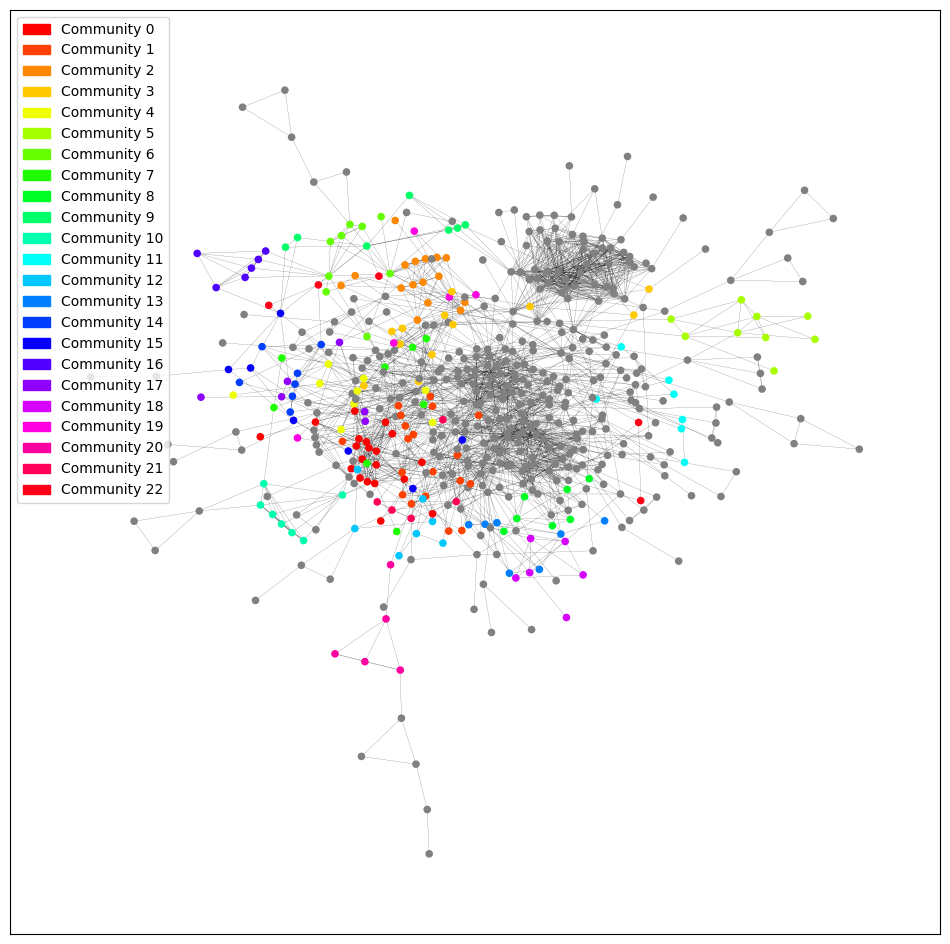

{'Bernd_Nagel': 0, 'Miyamax_Beteiligungsgesellschaft_mbH': 0, 'Nils_Heise': 0, 'MSG_Consulting_GmbH': 0, 'Mark_Mailänder': 0, 'Michael_Halbherr': 0, 'Müller,_Gregor': 0, 'Arthur_Steinmetz': 0, 'Bayesian_Ventures_UG_(haftungsbeschränkt)': 0, 'Buche_Vermögensverwaltung_GmbH': 0, 'ELUNDA_GmbH': 0, 'MTF_Investment_GmbH': 0, 'P_&_S_Investments_GmbH': 0, 'ESL_Holding_GmbH': 0, 'Dib_GmbH': 0, 'JG_Holding_GmbH': 0, 'Mutti_Ventures_GmbH': 0, 'Michael_Tysiak': 0, 'Meles_Ventures_UG_(haftungsbeschränkt)': 0, 'HDLF_Family_Affairs_GmbH': 0, 'Fabian_Baumann': 0, 'Dr._Michael_Aigner': 0, 'Christoph_Achim_Müller': 0, 'Bülow_Ventures_UG_(haftungsbeschränkt)': 0, 'Mauerkatze_UG_(haftungsbeschränkt)': 1, 'Teuber_Business_Invest_GmbH': 1, 'David_Wolter_Holding_GmbH': 1, 'Dr._Annegret_Jatzkewitz': 1, 'Prof._Dr_.-_Ing._Kai-Uwe_Schröder': 1, 'Oberon_Capital_GmbH': 1, 'Hubertz_Beteiligungen_GmbH': 1, 'Osorno_Capital_GmbH': 1, 'Klaus_Holzapfel': 1, 'FS_Holding_GmbH': 1, 'Andreas_Herrmann': 1, 'R.O.I._GmbH': 1,

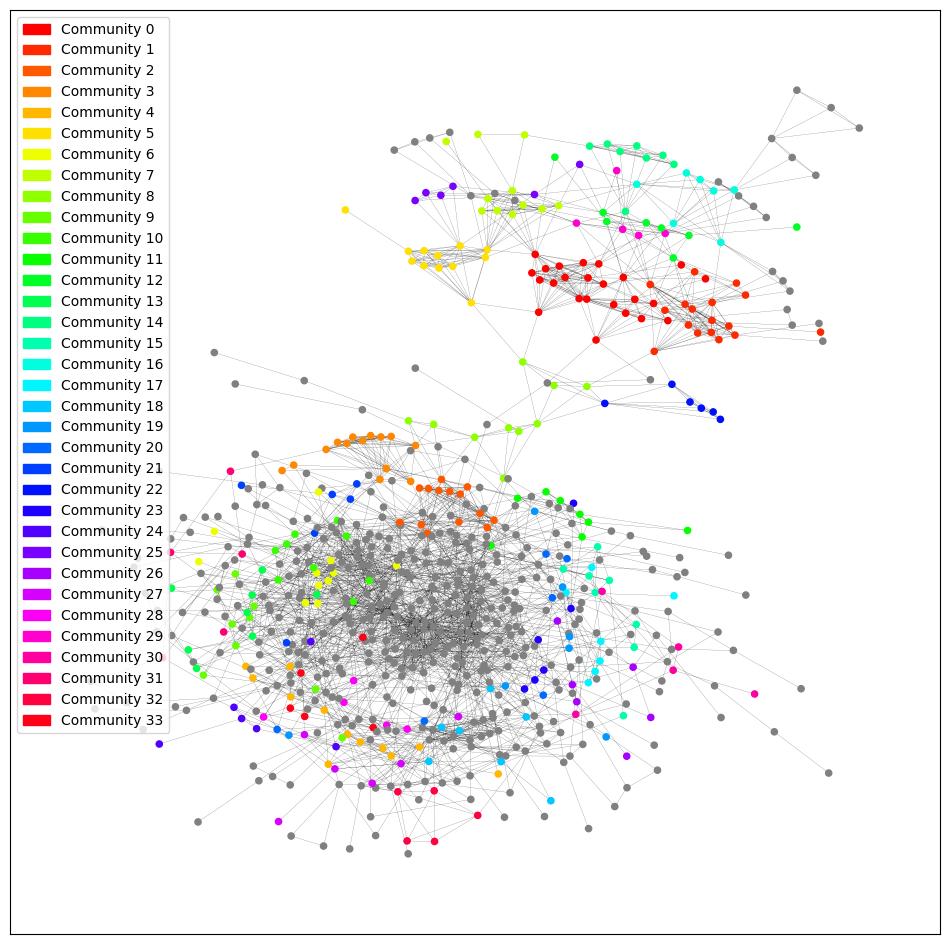

In [1425]:
#get largest subgraph of G_active
largest_cc_active = max(nx.connected_components(G_active), key=len)
subgraph_active = G_active.subgraph(largest_cc_active)

#get largest subgraph of G_simulated
largest_cc_simulated = max(nx.connected_components(G_simulated), key=len)
subgraph_simulated = G_simulated.subgraph(largest_cc_simulated)


import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def drawCommunities(G, communities):
    # Create a dictionary of community mappings
    community_mapping = {node: community_id for community_id, community in enumerate(communities) for node in community}
    print(community_mapping)
    # Generate unique colors for each community
    colors = plt.cm.hsv(np.linspace(0, 1, len(communities)))
    community_colors = dict(zip(range(len(communities)), colors))

    # Create a list of node colors based on their community, if the are not in the list make it grey
    node_colors = [community_colors.get(community_mapping.get(node), 'grey') for node in G.nodes()]
    
    # Draw the graph
    pos = nx.kamada_kawai_layout(G, scale=2)  # Using Kamada-Kawai layout with increased scale
    plt.figure(figsize=(12,12))  # Increase figure size
    nx.draw_networkx(G, pos, with_labels=False, node_size=20, width=0.1, edge_color='black', node_color=node_colors)
    #add a legend for the communities
    # Create a legend
    patch_list = [patches.Patch(color=color, label=f'Community {community_id}') for community_id, color in community_colors.items()]
    plt.legend(handles=patch_list, loc='upper left')



    # Save as PNG
    plt.savefig('graphs/Network_graph_with_community_mapping.png')
    
    # Display the plot
    plt.show()

# Example usage, make sure detectCommunities function is defined and works correctly
communities=detectCommunities(subgraph_active, 'walktrap')
print(f"communities: {communities}")
communities_simulated = detectCommunities(subgraph_simulated, 'walktrap')

# #get subset where communities are saller than 25
# communities = [community for community in communities if len(community) < 25]
# communities_simulated = [community for community in communities_simulated if len(community) < 25]

drawCommunities(subgraph_active, communities)
drawCommunities(subgraph_simulated, communities_simulated)

In [1426]:
#for each shareholder map into the df_angels_active the community they belong to
# Create a dictionary of community mappings
community_mapping = {node: community_id for community_id, community in enumerate(communities) for node in community}

community_mapping_simulated = {node: community_id for community_id, community in enumerate(communities_simulated) for node in community}
# Map the community of each node to the df_angels_active DataFrame

df_angels_active['community'] = df_angels_active['shareholder_name'].map(community_mapping)
df_angels_active['community'] = df_angels_active['community'].fillna(-1).astype(int)
df_angels_active['community_simulated'] = df_angels_active['shareholder_name'].map(community_mapping_simulated)
df_angels_active['community_simulated'] = df_angels_active['community_simulated'].fillna(-1).astype(int)
df_angels_active

shareholder_name_old shareholder_id  \
23              Settels Ventures UG (haftungsbeschränkt)         9735.0   
51                     GingerCat UG (haftungsbeschränkt)        15457.0   
82                                            8eyes GmbH         6554.0   
93     Michael Truch Holding GmbH Michael Truch Holdi...         2873.0   
108                                  Boston Venture GmbH        20212.0   
...                                                  ...            ...   
18614                                     Heide, Henning        18017.0   
18695              Prof. Dr. Alexander Grossmann, Putbus        18138.0   
18705                                      Markus Hammes        18149.0   
18896                                        Ralph Lägel        18372.0   
19878                                        Kiana Mardi         7503.0   

                          created_at  number_of_investments shareholder_type  \
23     2024-03-10 17:37:24.528696+00                      2            angel   
51     2024-03-10 17:37:27.447081+00                      2            angel   
82     2024-03-10 17:37:22.963246+00                      2            angel   
93     2024-03-10 17:37:20.561047+00                      2            angel   
108    2024-03-10 17:37:30.929372+00                      5            angel   
...                              ...                    ...              ...   
18614  2024-03-10 17:37:29.143888+00                      2            angel   
18695  2024-03-10 17:37:29.143888+00                      2            angel   
18705  2024-03-10 17:37:29.143888+00                      2            angel   
18896  2024-03-10 17:37:29.143888+00                      2            angel   
19878  2024-03-10 17:37:22.963246+00                      2            angel   

       register_id               register_court  total_participation  \
23               0  Charlottenburg HRB 159694 B             9.035000   
51      HRB 157901                     B Berlin             1.520000   
82     FN 411158 w          Firmenbuch von Wien             0.486050   
93         AG Köln                         Köln             0.000000   
108     HRB 222892                      München             1.554123   
...            ...                          ...                  ...   
18614            0                            0            10.000000   
18695            0                            0            58.350000   
18705            0                            0             5.430000   
18896            0                            0             0.972950   
19878            0                            0             1.525000   

       register_mapping                                shareholder_purpose  \
23                  0.0                                                  0   
51                  0.0                                                  0   
82                  0.0                      {"shareholder_purpose": null}   
93                568.0  {"shareholder_purpose": "die Verwaltung von ei...   
108               136.0  {"shareholder_purpose": "Eingehen, Halten und ...   
...                 ...                                                ...   
18614               0.0                                                  0   
18695               0.0                                                  0   
18705               0.0                                                  0   
18896               0.0                                                  0   
19878               0.0                                                  0   

       ... cologne_simulated leipzig_simulated production_trade_simulated  \
23     ...                 0                 0                          0   
51     ...                 0                 0                          0   
82     ...                 0                 0                          1   
93     ...                 2                 0                  

In [1427]:
import pandas as pd

# Definition der Funktion zur Berechnung des HHI
def gender_hhi(df):
    # Zählen der Vorkommen jedes Geschlechts
    gender_counts = df['gender'].value_counts()

    
    
    #get only male and female

    # TODO
    gender_counts = gender_counts.loc[gender_counts.index.isin(['male', 'female'])]
    print(gender_counts)
    # Quadrieren der gezählten Häufigkeiten
    squared_counts = gender_counts ** 2
    # Summe der quadrierten Häufigkeiten
    sum_of_squares = squared_counts.sum()
    # Berechnung des HHI
    hhi = sum_of_squares / (len(df) ** 2)
    return hhi

# Erstellen eines DataFrames mit einer Spalte 'gender'
df = pd.DataFrame({
    'gender': ['male', 'female', 'female', 'male', 'non-binary', 'female', 'male']
})

# Berechnen des HHI für den Beispiel-DataFrame
hhi = gender_hhi(df)
print(f'Der Herfindahl-Hirschman Index für die Geschlechterverteilung beträgt: {hhi}')

male      3
female    3
Name: gender, dtype: int64
Der Herfindahl-Hirschman Index für die Geschlechterverteilung beträgt: 0.3673469387755102


In [1428]:
#define function to calculate region HHI for communities
def region_hhi(df):
    
    # Zählen der Vorkommen jeder Region
    region_counts = df['region_mapping'].value_counts()
    #drop rows other
    region_counts = region_counts.drop('other', errors='ignore')
    # Quadrieren der gezählten Häufigkeiten
    squared_counts = region_counts ** 2
    # Summe der quadrierten Häufigkeiten
    sum_of_squares = squared_counts.sum()
    # Berechnung des HHI
    hhi = sum_of_squares / (len(df) ** 2)
    return hhi

In [1429]:
# columns for community comparison
community_columns = ["community","number_of_members","average_age","sd_eigenvector_centrality","sd_total_participation","sd_number_of_investments","sd_age","sd_industry_hhi","sd_region_hhi","gender_hhi","region_hhi_value","average_eigenvector_centrality",'female_ratio']

male      19
female     1
Name: gender, dtype: int64
0.5075
male    18
Name: gender, dtype: int64
0.29362880886426596
male      13
female     3
Name: gender, dtype: int64
0.35546875
male      9
female    1
Name: gender, dtype: int64
0.20833333333333334
male      4
female    2
Name: gender, dtype: int64
0.38271604938271603
male    9
Name: gender, dtype: int64
0.6296296296296297
male      6
female    2
Name: gender, dtype: int64
0.4074074074074074
male    8
Name: gender, dtype: int64
0.234375
0.7559289460184546
male    6
Name: gender, dtype: int64
0.5102040816326531
male    6
Name: gender, dtype: int64
0.42857142857142855
male    6
Name: gender, dtype: int64
0.5510204081632653
male      5
female    1
Name: gender, dtype: int64
0.3877551020408163
male    6
Name: gender, dtype: int64
0.30612244897959184
male      4
female    2
Name: gender, dtype: int64
0.5510204081632653
male    7
Name: gender, dtype: int64
0.30612244897959184
male    7
Name: gender, dtype: int64
0.2857142857142857
male  

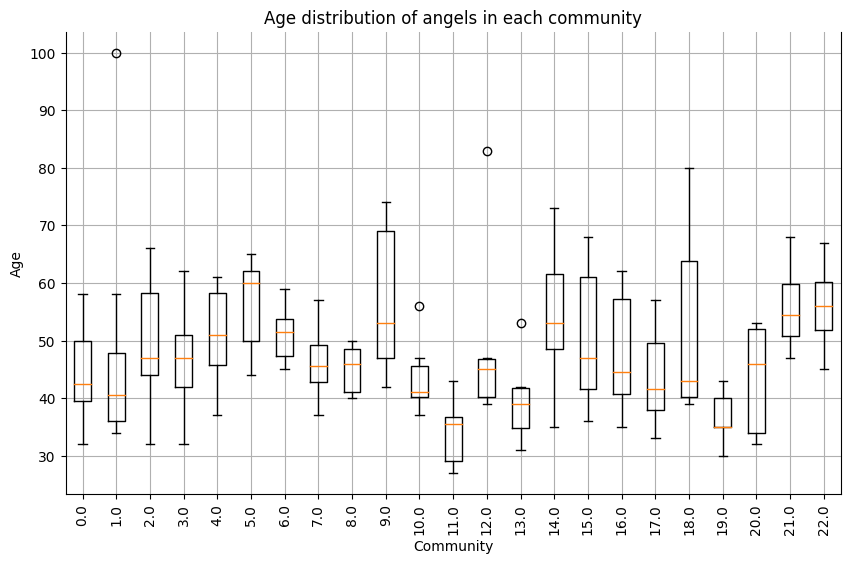

community  number_of_members  average_age  sd_eigenvector_centrality  \
0         0.0               20.0    44.750000               2.436315e-05   
1         1.0               19.0    45.000000               4.867032e-05   
2         2.0               16.0    50.187500               1.092376e-03   
3         3.0               12.0    46.727273               3.296661e-03   
4         4.0                9.0    50.750000               3.542405e-05   
5         5.0                9.0    57.000000               1.717228e-06   
6         6.0                9.0    51.375000               8.252337e-05   
7         7.0                8.0    46.625000               8.808002e-05   
8         8.0                7.0    45.000000               1.653356e-05   
9         9.0                7.0    57.285714               2.991415e-03   
10       10.0                7.0    43.666667               3.555528e-06   
11       11.0                7.0    34.166667               7.997781e-05   
12       12.0                7.0    49.666667               6.546760e-06   
13       13.0                7.0    39.666667               4.896809e-06   
14       14.0                7.0    54.428571               1.463992e-06   
15       15.0                7.0    50.857143               7.124065e-05   
16       16.0                6.0    47.833333               3.886036e-07   
17       17.0                6.0    43.666667               8.621419e-06   
18       18.0                6.0    52.500000               2.177422e-06   
19       19.0                5.0    36.600000               7.529846e-06   
20       20.0                5.0    43.400000               2.466458e-07   
21       21.0                5.0    56.000000               8.723556e-05   
22       22.0                5.0    56.000000               1.489800e-05   

    sd_total_participation  sd_number_of_investments     sd_age  \
0                 6.564347                  3.135535   7.873172   
1                 6.232924                  0.895081  15.631793   
2                15.960784                  0.727438   8.960794   
3                19.417756                  0.792961   8.556762   
4                 8.105433                  0.600925   8.647873   
5                 2.134633                  1.364225   7.905694   
6                12.106591                  1.691482   5.475595   
7                 6.235022                  0.534522   6.823018   
8                17.029792                  0.755929   4.281744   
9                 0.411370                  1.133893  13.425278   
10                5.924105                  0.786796   6.860515   
11               32.805125                  2.911390   6.210207   
12               11.747931                  1.527525  16.681327   
13                6.765012                  0.000000   7.737355   
14               12.591425                  1.496026  12.514753   
15                3.451725                  1.133893  12.495714   
16                5.653998                  0.816497  11.196726   
17                7.830714                  0.547723   9.070097   
18                4.887871                  0.547723  17.829750   
19                9.867808                  0.447214   5.029911   
20                6.328295                  1.341641   9.889388   
21                3.534233                  0.894427   8.981462   
22               10.355149                  0.447214   9.128709   

    sd_industry_hhi  sd_region_hhi  gender_hhi  region_hhi_value  \
0          0.261735       0.236253    0.905000          0.507500   
1          0.187311       0.262749    0.897507          0.293629   
2          0.132346       0.178550    0.695312          0.355469   
3          0.255307       0.215559    0.569444          0.208333   
4          0.107981       0.122663    0.246914          0.382716   
5          0.296504       0.237920    1.000000          0.629630   
6          0.235367       0.257280    0.493827          0.407407   
7          0.313480       

In [1430]:
#build df_communities_active
df_communities_active = pd.DataFrame(columns=community_columns)
# Loop through each community
for community_id, community in enumerate(communities):
    # Calculate the average age of the community, do not include angels with age 0 or 1
    average_age = df_angels_active[(df_angels_active['community'] == community_id) & (df_angels_active['age'] > 1)]['age'].mean()
    
    #Calculate SD of age
    sd_age = df_angels_active[(df_angels_active['community'] == community_id) & (df_angels_active['age'] > 1)]['age'].std()
    # Calculate the average total participation of the community
    average_total_participation = df_angels_active[df_angels_active['community'] == community_id]['total_participation'].mean()
    sd_total_participation = df_angels_active[df_angels_active['community'] == community_id]['total_participation'].std()
    # Calculate the average number of investments of the community
    average_number_of_investments = df_angels_active[df_angels_active['community'] == community_id]['number_of_investments'].mean()
    sd_number_of_investments = df_angels_active[df_angels_active['community'] == community_id]['number_of_investments'].std()
    if community_id ==8:
        
        print(sd_number_of_investments)
    # Calculate the average eigenvector centrality of the community
    average_eigenvector_centrality = df_angels_active[df_angels_active['community'] == community_id]['eigenvector_centrality'].mean()
    sd_eigenvector_centrality = df_angels_active[df_angels_active['community'] == community_id]['eigenvector_centrality'].std()
    # Calculate the number of members in the community
    number_of_members = len(community)
    temp= df_angels_active[df_angels_active['community'] == community_id]
    # Calculate gender HHI
    gender_hhi_value = gender_hhi(temp)

    #Caluculate region HHI
    region_hhi_value = region_hhi(temp)
    print(region_hhi_value)

    #Calculate sd of indutry hhi
    sd_industry_hhi = df_angels_active[df_angels_active['community'] == community_id]['industry_HHI'].std()
    
    #Calculate sd of region hhi
    sd_region_hhi = df_angels_active[df_angels_active['community'] == community_id]['region_HHI'].std()
    # Calculate female ratio
    female_ratio = len(df_angels_active[(df_angels_active['community'] == community_id) & (df_angels_active['gender'] == 'female')])/len(community)
    # Add the community to the DataFrame
    df_communities_active.loc[community_id] = [community_id, number_of_members, average_age,sd_eigenvector_centrality, sd_total_participation,sd_number_of_investments ,sd_age,sd_industry_hhi,sd_region_hhi,gender_hhi_value,region_hhi_value,average_eigenvector_centrality,female_ratio]

df_communities_active

#in one plot plote the age distribution of the angels in each community as a boxplot
# Create a list of age distributions for each community

age_distributions = [df_angels_active[(df_angels_active['community'] == community_id)  & (df_angels_active['age'].astype(int) > 1)]['age'] for community_id in df_communities_active['community']]
# Create a boxplot of the age distributions
plt.figure(figsize=(10, 6))
plt.boxplot(age_distributions, labels=df_communities_active['community'])
plt.title('Age distribution of angels in each community')
plt.xlabel('Community')
plt.ylabel('Age')
plt.grid(True)
plt.xticks(rotation=90)
plt.gca().spines['top'].set_visible(False)
plt.savefig('graphs/Age distribution of angels in each community.png')
plt.show()

#calc average_sd_age
average_sd_age_active = df_communities_active['average_age'].mean()

df_communities_active

In [1431]:
df_investment_rel_angel_startup_simulated

startup_name                                     angel  \
0     Cosuno Ventures GmbH                  AMIKA_Beteiligungen_GmbH   
1     Cosuno Ventures GmbH  BB_Beteiligungsgesellschaft_UG_Heilbronn   
2     Cosuno Ventures GmbH                          Rudolf_van_Megen   
3     Cosuno Ventures GmbH                  Lion's_Den_Ventures_GmbH   
4          Material24 GmbH                Prof._Dr._Thomas_Ischinger   
...                    ...                                       ...   
2177       BeYourHero GmbH                    Prof._Dr._Gunter_Dueck   
2178      UMH Systems GmbH                               David_Klein   
2179      BringLiesel GmbH                    Christoph_Achim_Müller   
2180        Tilo Tech GmbH                    Dr._Thede_Holding_GmbH   
2181        Tilo Tech GmbH                  Everpreneur_Capital_GmbH   

                startup_industry_mapped     region startup_location  \
0     energy_environment_infrastructure     berlin           berlin   
1     energy_environment_infrastructure  stuttgart           berlin   
2     energy_environment_infrastructure    cologne           berlin   
3     energy_environment_infrastructure     berlin           berlin   
4     energy_environment_infrastructure     munich          münchen   
...                                 ...        ...              ...   
2177                   production_trade  frankfurt         ratingen   
2178                   production_trade          0           aachen   
2179        technology_digital_services     munich           lübeck   
2180        technology_digital_services      other           berlin   
2181        technology_digital_services     berlin           berlin   

      total_participation_in_percent   birthdate  
0                             1.1500           0  
1                             0.0000           0  
2                            16.9800  1954-06-27  
3                             4.8500           0  
4                            33.0350  1949-04-16  
...                              ...         ...  
2177                          1.3852  1951-12-09  
2178                         13.1200  1977-07-20  
2179                          0.0040  1989-04-21  
2180                         13.4000           0  
2181                          4.2095           0  

[2182 rows x 7 columns]

In [1432]:
#create df_angels_active_simulated
#add_columns for each region_simulated berlin_simulated, munich_simulated, hamburg_simulated, franfurt_simulated, stuttgart_simulated, other_simulated, cologne_simulated, leipzig_simulated
df_angels_active['berlin_simulated'] = 0
df_angels_active['munich_simulated'] = 0
df_angels_active['hamburg_simulated'] = 0
df_angels_active['frankfurt_simulated'] = 0
df_angels_active['stuttgart_simulated'] = 0
df_angels_active['other_simulated'] = 0
df_angels_active['cologne_simulated'] = 0
df_angels_active['leipzig_simulated'] = 0



#count for every shareholder how many startups they are involved in per location
#create a df that counts the number of startups per shareholder per location
df_investment_rel_angel_startup_simulated['count'] = 1
df_shareholder_relations_pivot_simulated = df_investment_rel_angel_startup_simulated.pivot_table(index='angel', columns='region', values='count', aggfunc='sum')
df_shareholder_relations_pivot_simulated = df_shareholder_relations_pivot_simulated.fillna(0)
df_shareholder_relations_pivot_simulated = df_shareholder_relations_pivot_simulated.reset_index()
df_shareholder_relations_pivot_simulated

#now map the values from df_shareholder_relations_pivot_simulated to df_angels_active

for index, row in df_angels_active.iterrows():
    angel = row['shareholder_name']
    berlin_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['berlin']
    munich_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['munich']
    stuttgart_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['stuttgart']
    leipzig_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['leipzig']
    cologne_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['cologne']
    franfurt_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['frankfurt']
    hamburg_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['hamburg']
    other_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['other']
    # international = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['international']

    if len(berlin_simulated) > 0:
        df_angels_active.at[index, 'berlin_simulated'] = berlin_simulated.values[0]
    if len(munich_simulated) > 0:
        df_angels_active.at[index, 'munich_simulated'] = munich_simulated.values[0]
    if len(stuttgart_simulated) > 0:
        df_angels_active.at[index, 'stuttgart_simulated'] = stuttgart_simulated.values[0]
    if len(leipzig_simulated) > 0:
        df_angels_active.at[index, 'leipzig_simulated'] = leipzig_simulated.values[0]
    if len(cologne_simulated) > 0:
        df_angels_active.at[index, 'cologne_simulated'] = cologne_simulated.values[0]
    if len(franfurt_simulated) > 0:
        df_angels_active.at[index, 'frankfurt_simulated'] = franfurt_simulated.values[0]
    if len(hamburg_simulated) > 0:
        df_angels_active.at[index, 'hamburg_simulated'] = hamburg_simulated.values[0]
    if len(other_simulated) > 0:
        df_angels_active.at[index, 'other_simulated'] = other_simulated.values[0]
    # if len(international) > 0:
    #     df_angels_active.at[index, 'international'] = international.values[0]

df_angels_active


shareholder_name_old shareholder_id  \
23              Settels Ventures UG (haftungsbeschränkt)         9735.0   
51                     GingerCat UG (haftungsbeschränkt)        15457.0   
82                                            8eyes GmbH         6554.0   
93     Michael Truch Holding GmbH Michael Truch Holdi...         2873.0   
108                                  Boston Venture GmbH        20212.0   
...                                                  ...            ...   
18614                                     Heide, Henning        18017.0   
18695              Prof. Dr. Alexander Grossmann, Putbus        18138.0   
18705                                      Markus Hammes        18149.0   
18896                                        Ralph Lägel        18372.0   
19878                                        Kiana Mardi         7503.0   

                          created_at  number_of_investments shareholder_type  \
23     2024-03-10 17:37:24.528696+00                      2            angel   
51     2024-03-10 17:37:27.447081+00                      2            angel   
82     2024-03-10 17:37:22.963246+00                      2            angel   
93     2024-03-10 17:37:20.561047+00                      2            angel   
108    2024-03-10 17:37:30.929372+00                      5            angel   
...                              ...                    ...              ...   
18614  2024-03-10 17:37:29.143888+00                      2            angel   
18695  2024-03-10 17:37:29.143888+00                      2            angel   
18705  2024-03-10 17:37:29.143888+00                      2            angel   
18896  2024-03-10 17:37:29.143888+00                      2            angel   
19878  2024-03-10 17:37:22.963246+00                      2            angel   

       register_id               register_court  total_participation  \
23               0  Charlottenburg HRB 159694 B             9.035000   
51      HRB 157901                     B Berlin             1.520000   
82     FN 411158 w          Firmenbuch von Wien             0.486050   
93         AG Köln                         Köln             0.000000   
108     HRB 222892                      München             1.554123   
...            ...                          ...                  ...   
18614            0                            0            10.000000   
18695            0                            0            58.350000   
18705            0                            0             5.430000   
18896            0                            0             0.972950   
19878            0                            0             1.525000   

       register_mapping                                shareholder_purpose  \
23                  0.0                                                  0   
51                  0.0                                                  0   
82                  0.0                      {"shareholder_purpose": null}   
93                568.0  {"shareholder_purpose": "die Verwaltung von ei...   
108               136.0  {"shareholder_purpose": "Eingehen, Halten und ...   
...                 ...                                                ...   
18614               0.0                                                  0   
18695               0.0                                                  0   
18705               0.0                                                  0   
18896               0.0                                                  0   
19878               0.0                                                  0   

       ... cologne_simulated leipzig_simulated production_trade_simulated  \
23     ...                 0                 0                          0   
51     ...                 0                 0                          0   
82     ...                 0                 0                          1   
93     ...                 2                 0                  

In [1433]:
#add a column to shareholders per industry production_trade_simulated technology_digital_services_simulated energy_environment_infrastructure_simulated healthcare_simulated services_consulting_simulated

df_angels_active['production_trade_simulated'] = 0
df_angels_active['technology_digital_services_simulated'] = 0
df_angels_active['energy_environment_infrastructure_simulated'] = 0
df_angels_active['healthcare_simulated'] = 0
df_angels_active['services_consulting_simulated'] = 0

#count for every shareholder how many startups they are involved in per startup_industry
#create a df_angels_active that counts the number of startups per shareholder per industry
df_investment_rel_angel_startup_simulated['count'] = 1
df_shareholder_relations_pivot = df_investment_rel_angel_startup_simulated.pivot_table(index='angel', columns='startup_industry_mapped', values='count', aggfunc='sum')
df_shareholder_relations_pivot = df_shareholder_relations_pivot.fillna(0)
df_shareholder_relations_pivot = df_shareholder_relations_pivot.reset_index()
df_shareholder_relations_pivot

#now map the values from df_shareholder_relations_pivot to df_angels_active
for index, row in df_angels_active.iterrows():
    angel = row['shareholder_name']
    production_trade_simulated = df_shareholder_relations_pivot[df_shareholder_relations_pivot['angel'] == angel]['production_trade']
    technology_digital_services_simulated = df_shareholder_relations_pivot[df_shareholder_relations_pivot['angel'] == angel]['technology_digital_services']
    energy_environment_infrastructure_simulated = df_shareholder_relations_pivot[df_shareholder_relations_pivot['angel'] == angel]['energy_environment_infrastructure']
    healthcare_simulated = df_shareholder_relations_pivot[df_shareholder_relations_pivot['angel'] == angel]['healthcare']
    services_consulting_simulated = df_shareholder_relations_pivot[df_shareholder_relations_pivot['angel'] == angel]['services_consulting']
    if len(production_trade_simulated) > 0:
        df_angels_active.at[index, 'production_trade_simulated'] = production_trade_simulated.values[0]
    if len(technology_digital_services_simulated) > 0:
        df_angels_active.at[index, 'technology_digital_services_simulated'] = technology_digital_services_simulated.values[0]
    if len(energy_environment_infrastructure_simulated) > 0:
        df_angels_active.at[index, 'energy_environment_infrastructure_simulated'] = energy_environment_infrastructure_simulated.values[0]
    if len(healthcare_simulated) > 0:
        df_angels_active.at[index, 'healthcare_simulated'] = healthcare_simulated.values[0]
    if len(services_consulting_simulated) > 0:
        df_angels_active.at[index, 'services_consulting_simulated'] = services_consulting_simulated.values[0]

df_angels_active

shareholder_name_old shareholder_id  \
23              Settels Ventures UG (haftungsbeschränkt)         9735.0   
51                     GingerCat UG (haftungsbeschränkt)        15457.0   
82                                            8eyes GmbH         6554.0   
93     Michael Truch Holding GmbH Michael Truch Holdi...         2873.0   
108                                  Boston Venture GmbH        20212.0   
...                                                  ...            ...   
18614                                     Heide, Henning        18017.0   
18695              Prof. Dr. Alexander Grossmann, Putbus        18138.0   
18705                                      Markus Hammes        18149.0   
18896                                        Ralph Lägel        18372.0   
19878                                        Kiana Mardi         7503.0   

                          created_at  number_of_investments shareholder_type  \
23     2024-03-10 17:37:24.528696+00                      2            angel   
51     2024-03-10 17:37:27.447081+00                      2            angel   
82     2024-03-10 17:37:22.963246+00                      2            angel   
93     2024-03-10 17:37:20.561047+00                      2            angel   
108    2024-03-10 17:37:30.929372+00                      5            angel   
...                              ...                    ...              ...   
18614  2024-03-10 17:37:29.143888+00                      2            angel   
18695  2024-03-10 17:37:29.143888+00                      2            angel   
18705  2024-03-10 17:37:29.143888+00                      2            angel   
18896  2024-03-10 17:37:29.143888+00                      2            angel   
19878  2024-03-10 17:37:22.963246+00                      2            angel   

       register_id               register_court  total_participation  \
23               0  Charlottenburg HRB 159694 B             9.035000   
51      HRB 157901                     B Berlin             1.520000   
82     FN 411158 w          Firmenbuch von Wien             0.486050   
93         AG Köln                         Köln             0.000000   
108     HRB 222892                      München             1.554123   
...            ...                          ...                  ...   
18614            0                            0            10.000000   
18695            0                            0            58.350000   
18705            0                            0             5.430000   
18896            0                            0             0.972950   
19878            0                            0             1.525000   

       register_mapping                                shareholder_purpose  \
23                  0.0                                                  0   
51                  0.0                                                  0   
82                  0.0                      {"shareholder_purpose": null}   
93                568.0  {"shareholder_purpose": "die Verwaltung von ei...   
108               136.0  {"shareholder_purpose": "Eingehen, Halten und ...   
...                 ...                                                ...   
18614               0.0                                                  0   
18695               0.0                                                  0   
18705               0.0                                                  0   
18896               0.0                                                  0   
19878               0.0                                                  0   

       ... cologne_simulated leipzig_simulated production_trade_simulated  \
23     ...                 0                 0                          0   
51     ...                 0                 0                          0   
82     ...                 0                 0                          1   
93     ...                 2                 0                  

In [1434]:
#calculate the industry_HHI for each angel
# #calculate the industry_HHI for each angel
# #calculate the industry_HHI for each angel
def calculate_hhi(market_shares):
    """
    Calculate Herfindahl-Hirschmann Index (HHI)
    
    Parameters:
    market_shares (list): List of market shares for each company
    
    Returns:
    hhi (float): Calculated HHI index
    """
    #calculate shares of total first
    
    total_shares = sum(market_shares)
    
    market_shares = [share/total_shares for share in market_shares]
    hhi = sum([share**2 for share in market_shares])

    return hhi

#calculate the industry_HHI for each angel based on the industry columns production_trade,technology_digital_services,energy_environment_infrastructure,healthcare,services_consulting
df_angels_active['industry_HHI_simulated'] = df_angels_active[['production_trade','technology_digital_services','energy_environment_infrastructure','healthcare','services_consulting']].apply(calculate_hhi, axis=1)

#calculate region HHI for each angel based on the region columns muncih,hamburg,berlin,frankfurt,other,leipzig,cologne,international
df_angels_active['region_HHI_simulated'] = df_angels_active[['munich','hamburg','berlin','frankfurt','other','leipzig','cologne','stuttgart']].apply(calculate_hhi, axis=1)

df_angels_active


shareholder_name_old shareholder_id  \
23              Settels Ventures UG (haftungsbeschränkt)         9735.0   
51                     GingerCat UG (haftungsbeschränkt)        15457.0   
82                                            8eyes GmbH         6554.0   
93     Michael Truch Holding GmbH Michael Truch Holdi...         2873.0   
108                                  Boston Venture GmbH        20212.0   
...                                                  ...            ...   
18614                                     Heide, Henning        18017.0   
18695              Prof. Dr. Alexander Grossmann, Putbus        18138.0   
18705                                      Markus Hammes        18149.0   
18896                                        Ralph Lägel        18372.0   
19878                                        Kiana Mardi         7503.0   

                          created_at  number_of_investments shareholder_type  \
23     2024-03-10 17:37:24.528696+00                      2            angel   
51     2024-03-10 17:37:27.447081+00                      2            angel   
82     2024-03-10 17:37:22.963246+00                      2            angel   
93     2024-03-10 17:37:20.561047+00                      2            angel   
108    2024-03-10 17:37:30.929372+00                      5            angel   
...                              ...                    ...              ...   
18614  2024-03-10 17:37:29.143888+00                      2            angel   
18695  2024-03-10 17:37:29.143888+00                      2            angel   
18705  2024-03-10 17:37:29.143888+00                      2            angel   
18896  2024-03-10 17:37:29.143888+00                      2            angel   
19878  2024-03-10 17:37:22.963246+00                      2            angel   

       register_id               register_court  total_participation  \
23               0  Charlottenburg HRB 159694 B             9.035000   
51      HRB 157901                     B Berlin             1.520000   
82     FN 411158 w          Firmenbuch von Wien             0.486050   
93         AG Köln                         Köln             0.000000   
108     HRB 222892                      München             1.554123   
...            ...                          ...                  ...   
18614            0                            0            10.000000   
18695            0                            0            58.350000   
18705            0                            0             5.430000   
18896            0                            0             0.972950   
19878            0                            0             1.525000   

       register_mapping                                shareholder_purpose  \
23                  0.0                                                  0   
51                  0.0                                                  0   
82                  0.0                      {"shareholder_purpose": null}   
93                568.0  {"shareholder_purpose": "die Verwaltung von ei...   
108               136.0  {"shareholder_purpose": "Eingehen, Halten und ...   
...                 ...                                                ...   
18614               0.0                                                  0   
18695               0.0                                                  0   
18705               0.0                                                  0   
18896               0.0                                                  0   
19878               0.0                                                  0   

       ... cologne_simulated leipzig_simulated production_trade_simulated  \
23     ...                 0                 0                          0   
51     ...                 0                 0                          0   
82     ...                 0                 0                          1   
93     ...                 2                 0                  

In [1435]:
#calculate eigenvector centrality for each angel in simulated graph
# Create a dictionary of eigenvector centralities
eigenvector_centrality_simulated = nx.eigenvector_centrality(G_simulated)

# Map the eigenvector centralities to the df_angels_active DataFrame
df_angels_active['eigenvector_centrality_simulated'] = df_angels_active['shareholder_name'].map(eigenvector_centrality_simulated)
#fill NaN values with 0
df_angels_active = df_angels_active.fillna(0)
df_angels_active

shareholder_name_old shareholder_id  \
23              Settels Ventures UG (haftungsbeschränkt)         9735.0   
51                     GingerCat UG (haftungsbeschränkt)        15457.0   
82                                            8eyes GmbH         6554.0   
93     Michael Truch Holding GmbH Michael Truch Holdi...         2873.0   
108                                  Boston Venture GmbH        20212.0   
...                                                  ...            ...   
18614                                     Heide, Henning        18017.0   
18695              Prof. Dr. Alexander Grossmann, Putbus        18138.0   
18705                                      Markus Hammes        18149.0   
18896                                        Ralph Lägel        18372.0   
19878                                        Kiana Mardi         7503.0   

                          created_at  number_of_investments shareholder_type  \
23     2024-03-10 17:37:24.528696+00                      2            angel   
51     2024-03-10 17:37:27.447081+00                      2            angel   
82     2024-03-10 17:37:22.963246+00                      2            angel   
93     2024-03-10 17:37:20.561047+00                      2            angel   
108    2024-03-10 17:37:30.929372+00                      5            angel   
...                              ...                    ...              ...   
18614  2024-03-10 17:37:29.143888+00                      2            angel   
18695  2024-03-10 17:37:29.143888+00                      2            angel   
18705  2024-03-10 17:37:29.143888+00                      2            angel   
18896  2024-03-10 17:37:29.143888+00                      2            angel   
19878  2024-03-10 17:37:22.963246+00                      2            angel   

       register_id               register_court  total_participation  \
23               0  Charlottenburg HRB 159694 B             9.035000   
51      HRB 157901                     B Berlin             1.520000   
82     FN 411158 w          Firmenbuch von Wien             0.486050   
93         AG Köln                         Köln             0.000000   
108     HRB 222892                      München             1.554123   
...            ...                          ...                  ...   
18614            0                            0            10.000000   
18695            0                            0            58.350000   
18705            0                            0             5.430000   
18896            0                            0             0.972950   
19878            0                            0             1.525000   

       register_mapping                                shareholder_purpose  \
23                  0.0                                                  0   
51                  0.0                                                  0   
82                  0.0                      {"shareholder_purpose": null}   
93                568.0  {"shareholder_purpose": "die Verwaltung von ei...   
108               136.0  {"shareholder_purpose": "Eingehen, Halten und ...   
...                 ...                                                ...   
18614               0.0                                                  0   
18695               0.0                                                  0   
18705               0.0                                                  0   
18896               0.0                                                  0   
19878               0.0                                                  0   

       ... cologne_simulated leipzig_simulated production_trade_simulated  \
23     ...                 0                 0                          0   
51     ...                 0                 0                          0   
82     ...                 0                 0                          1   
93     ...                 2                 0                  

male    24
Name: gender, dtype: int64
1.0
male      14
female     1
Name: gender, dtype: int64
0.6816608996539792
male      11
female     1
Name: gender, dtype: int64
0.6224489795918368
male      12
female     1
Name: gender, dtype: int64
0.7397959183673469
male      11
female     1
Name: gender, dtype: int64
0.8472222222222222
male      10
female     2
Name: gender, dtype: int64
0.7222222222222222
male      7
female    3
Name: gender, dtype: int64
0.4793388429752066
male      9
female    2
Name: gender, dtype: int64
0.7024793388429752
male      8
female    1
Name: gender, dtype: int64
0.65
male      7
female    1
Name: gender, dtype: int64
0.6172839506172839
male      7
female    2
Name: gender, dtype: int64
0.654320987654321
male    8
Name: gender, dtype: int64
1.0
male      7
female    1
Name: gender, dtype: int64
0.78125
male    7
Name: gender, dtype: int64
0.765625
male    8
Name: gender, dtype: int64
1.0
male    5
Name: gender, dtype: int64
0.390625
male      5
female    1
Name: 

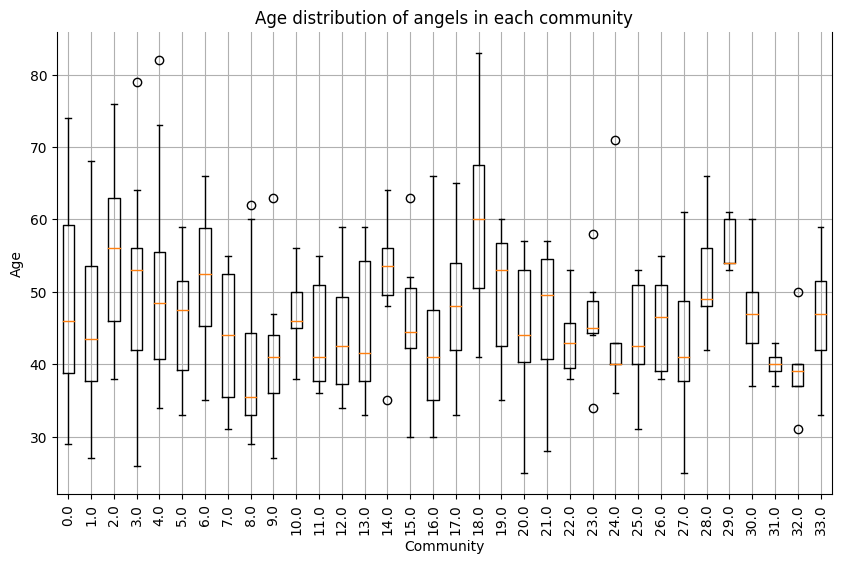

In [1436]:
#build df_communities_simulated
df_communities_simulated = pd.DataFrame(columns=community_columns)
# Loop through each community
for community_id, community in enumerate(communities_simulated):
    # Calculate the average age of the community, do not include angels with age 0 or 1
    average_age = df_angels_active[(df_angels_active['community_simulated'] == community_id) & (df_angels_active['age'] > 1)]['age'].mean()
    sd_age = df_angels_active[(df_angels_active['community_simulated'] == community_id) & (df_angels_active['age'] > 1)]['age'].std()
    # Calculate the average total participation of the community
    average_total_participation = df_angels_active[df_angels_active['community_simulated'] == community_id]['total_participation'].mean()
    sd_total_participation = df_angels_active[df_angels_active['community_simulated'] == community_id]['total_participation'].std()

    # Calculate the average number of investments of the community
    average_number_of_investments = df_angels_active[df_angels_active['community_simulated'] == community_id]['number_of_investments'].mean()

    sd_number_of_investments = df_angels_active[df_angels_active['community_simulated'] == community_id]['number_of_investments'].std()

    #Calculate average eigenvector centrality
    average_eigenvector_centrality = df_angels_active[(df_angels_active['community_simulated'] == community_id) & (df_angels_active['eigenvector_centrality'] != 0)]['eigenvector_centrality'].mean()
    sd_eigenvector_centrality = df_angels_active[(df_angels_active['community_simulated'] == community_id) & (df_angels_active['eigenvector_centrality'] != 0)]['eigenvector_centrality'].std()

    #Calculate sd of indutry hhi
    sd_industry_hhi = df_angels_active[df_angels_active['community_simulated'] == community_id]['industry_HHI'].std()

    #calculate regio hhi
    sd_region_hhi = df_angels_active[df_angels_active['community_simulated'] == community_id]['region_HHI'].std()
    temp= df_angels_active[df_angels_active['community_simulated'] == community_id]
    gender_hhi_value = gender_hhi(temp)
    print(gender_hhi_value)

    #Calculate region hhi
    region_hhi_value = region_hhi(temp)
    # Calculate the female_ratio of the community
    female_ratio = len(df_angels_active[(df_angels_active['community_simulated'] == community_id) & (df_angels_active['gender'] =='female')])/len(community)

    # Calculate the number of members in the community
    number_of_members = len(community)
    # Add the community to the DataFrame
    df_communities_simulated.loc[community_id] = [community_id, number_of_members, average_age, sd_eigenvector_centrality,sd_total_participation,sd_number_of_investments,sd_age,sd_industry_hhi,sd_region_hhi,gender_hhi_value,region_hhi_value,average_eigenvector_centrality,female_ratio]

df_communities_simulated

#in one plot plote the age distribution of the angels in each community as a boxplot
# Create a list of age distributions for each community

age_distributions = [df_angels_active[(df_angels_active['community_simulated'] == community_id)  & (df_angels_active['age'].astype(int) > 1)]['age'] for community_id in df_communities_simulated['community']]
# Create a boxplot of the age distributions
plt.figure(figsize=(10, 6))
plt.boxplot(age_distributions, labels=df_communities_simulated['community'])
plt.title('Age distribution of angels in each community')
plt.xlabel('Community')
plt.ylabel('Age')
plt.grid(True)
plt.xticks(rotation=90)
plt.gca().spines['top'].set_visible(False)
plt.savefig('graphs/Age distribution of angels in each community_simulated.png')
plt.show()



In [1437]:
import pandas as pd
import scipy.stats as stats

# Calculate standard deviation of 'average_age' for active and simulated communities
average_sd_age_active = df_communities_active['average_age'].std()
average_sd_age_simulated = df_communities_simulated['average_age'].std()

# Create DataFrame for comparison of communities, including mean and sd
df_community_comparison = pd.DataFrame(columns=["variable", "t_stat", "p_value", "mean_active", "mean_simulated", "sd_active", "sd_simulated"])

# Helper function to add a row to the DataFrame
def add_comparison_row(df, variable, active_data, simulated_data):
    t_stat, p_value = stats.ttest_ind(active_data, simulated_data, equal_var=False)
    p_value_one_side = p_value / 2
    mean_active = active_data.mean()
    mean_simulated = simulated_data.mean()
    sd_active = active_data.std()
    sd_simulated = simulated_data.std()
    
    df.loc[len(df)] = [variable, t_stat, p_value_one_side, mean_active, mean_simulated, sd_active, sd_simulated]

# Perform t-tests on each variable and add to df_community_comparison
add_comparison_row(df_community_comparison, "sd_eigenvector_centrality",  df_communities_simulated['sd_eigenvector_centrality'],df_communities_active['sd_eigenvector_centrality'])


# add_comparison_row(df_community_comparison, "average_number_of_investments", df_communities_active['average_number_of_investments'], df_communities_simulated['average_number_of_investments'])
# add_comparison_row(df_community_comparison, "average_eigenvector_centrality", df_communities_active['average_eigenvector_centrality'], df_communities_simulated['average_eigenvector_centrality'])
add_comparison_row(df_community_comparison, "sd_number_of_investments", df_communities_simulated['sd_number_of_investments'],df_communities_active['sd_number_of_investments'] )
add_comparison_row(df_community_comparison, "sd_total_participation",df_communities_simulated['sd_total_participation'], df_communities_active['sd_total_participation'])

add_comparison_row(df_community_comparison, "sd_industry_hhi",df_communities_simulated['sd_industry_hhi'], df_communities_active['sd_industry_hhi'])

#add comparison for region hhi
add_comparison_row(df_community_comparison, "sd_region_hhi",df_communities_simulated['sd_region_hhi'], df_communities_active['sd_region_hhi'])
# # Assuming 'sd_age' columns exist in your DataFrames
# add_comparison_row(df_community_comparison, "sd_age", df_communities_active['sd_age'], df_communities_simulated['sd_age'])

#add coparison for region_hhi value
add_comparison_row(df_community_comparison, "region_hhi_value",df_communities_simulated['region_hhi_value'], df_communities_active['region_hhi_value'])

add_comparison_row(df_community_comparison, "gender_hhi",df_communities_simulated['gender_hhi'], df_communities_active["gender_hhi"])
# Perform a one-tailed t-test for 'female_ratio' under the assumption that the sd of age in df_communities_active is smaller than df_communities_simulated


add_comparison_row(df_community_comparison, "sd_age", df_communities_active['sd_age'], df_communities_simulated['sd_age'])
t_stat, p_value_two_tail = stats.ttest_ind(df_communities_active['female_ratio'], df_communities_simulated['female_ratio'], equal_var=False)
p_value_one_tail = p_value_two_tail / 2
print(f"One-tailed p-value for female_ratio: {p_value_one_tail}")

# Add the two-tailed test result for 'female_ratio' to the comparison DataFrame
add_comparison_row(df_community_comparison, "female_ratio", df_communities_active['female_ratio'], df_communities_simulated['female_ratio'])

df_community_comparison
# #perform t-test
# from scipy.stats import ttest_ind
# t_stat, p_value = ttest_ind(df_communities_active['sd_age'], df_communities_simulated['sd_age'])
# print(t_stat, p_value)
# # average_eigenvector_centrality_active = df_communities_active['average_eigenvector_centrality'].std()
# # print(average_eigenvector_centrality_active)

# # average_eigenvector_centrality_simulated = df_communities_simulated['average_eigenvector_centrality'].std()
# # print(average_eigenvector_centrality_simulated)
# #calculate t test between averages average_sd_age_active
# # and average_sd_age_simulated
# # from scipy.stats import ttest_ind
# # t_stat, p_value = ttest_ind(average_eigenvector_centrality_active, average_eigenvector_centrality_simulated, equal_var=False)
# # print(t_stat, p_value)

One-tailed p-value for female_ratio: 0.44810619927894974


variable    t_stat   p_value  mean_active  mean_simulated  \
0  sd_eigenvector_centrality       NaN       NaN     0.016911        0.000346   
1   sd_number_of_investments -3.430153  0.000878     0.488545        1.066524   
2     sd_total_participation  3.365660  0.000748    15.844158        9.388784   
3            sd_industry_hhi -0.402187  0.344556     0.190879        0.200806   
4              sd_region_hhi -2.261023  0.014231     0.186137        0.232576   
5           region_hhi_value -4.548293  0.000025     0.244109        0.378649   
6                 gender_hhi  0.520578  0.302846     0.767758        0.735556   
7                     sd_age -0.222200  0.412644     9.617723        9.820155   
8               female_ratio -0.131240  0.448106     0.067849        0.071086   

   sd_active  sd_simulated  
0   0.027438      0.000912  
1   0.392470      0.740824  
2   7.283233      6.980538  
3   0.108671      0.077599  
4   0.107592      0.043261  
5   0.093554      0.119181  
6   0.187509      0.253429  
7   3.654976      2.910596  
8   0.097072      0.082259

In [1438]:
#Girvan Newman based community detection

import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community import modularity
 

def get_communities_Girvan_Newman(G_active):
    comp = girvan_newman(G_active)
    
    max_modularity = None
    optimal_partition = None
    for communities in comp:
        new_modularity = modularity(G_active, communities)

        if max_modularity is None or new_modularity > max_modularity:
            max_modularity = new_modularity
            optimal_partition = communities

        if max_modularity is not None and new_modularity < max_modularity:
            break
    # node_groups = []
    # for com in next(communities):
    #   node_groups.append(list(com))

    optimal_partition = [c for c in optimal_partition if len(c) > 4]
    largest_cc = max(nx.connected_components(G_active), key=len)

    subgraph = G_active.subgraph(largest_cc)
    network_diameter = nx.diameter(subgraph)
    # Filter out communities where the end-to-end diameter exceeds one-fourth that of the entire network
    optimal_partition = [c for c in optimal_partition if nx.diameter(G_active.subgraph(c)) < network_diameter/2]
    #transform optimal partition to list of lists
    optimal_partition = [list(c) for c in optimal_partition]
    return optimal_partition



communities_girvan_newman = get_communities_Girvan_Newman(G_active)
communities_girvan_newman_simulated = get_communities_Girvan_Newman(G_simulated)
print(communities_girvan_newman)
communities_girvan_newman
len(communities_girvan_newman)
len(communities_girvan_newman_simulated)
#return size of all communities
community_sizes = [len(community) for community in communities_girvan_newman]
community_sizes_simulated = [len(community) for community in communities_girvan_newman_simulated]   
print(community_sizes_simulated)
print(community_sizes)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/annabellschafer/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_87368/3170669828.py", line 40, in <module>
    communities_girvan_newman = get_communities_Girvan_Newman(G_active)
                                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_87368/3170669828.py", line 14, in get_communities_Girvan_Newman
    for communities in comp:
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/networkx/algorithms/community/centrality.py", line 147, in girvan_newman
    yield _without_most_central_edges(g, most_valuable_edge)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-p

In [ ]:
print(len(communities_girvan_newman))


#get number of shareholders in each community
community_sizes = [len(community) for community in communities_girvan_newman]
community_sizes

27


[160,
 62,
 49,
 59,
 11,
 39,
 13,
 13,
 12,
 5,
 10,
 12,
 23,
 6,
 5,
 7,
 5,
 17,
 7,
 6,
 10,
 8,
 9,
 5,
 7,
 13,
 5]

In [ ]:
# Load csv angels
df_temp = pd.read_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/angels.csv')
#rename column birthdate_x to birthdate
df_temp = df_temp.rename(columns={'birthdate_x':'birthdate'})

#save as csv
df_temp.to_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/angels_upload.csv', index=False)

## Analysis of similarity within communities - 5


In [ ]:
#calculate investments per location per angel based on input df_angel and input df_investment_rel_angel_startup
#define funtion
def investments_per_location_per_angel(df_angel, df_investment_rel_angel_startup):
    #get list of all unique angels
    # rename column angel to name
    df_angel = df_angel.rename(columns={'angel':'name'})
    df_investment_rel_angel_startup = df_investment_rel_angel_startup.rename(columns={'angel':'name'})
    angels = df_angel['name'].unique()
    #create list of all locations in df_investment_rel_angel_startup
    locations = df_investment_rel_angel_startup['startup_location'].unique()
    #in front of every location write investments_
    locations_columns = [x for x in locations+ '_investments']
    #create empty df with columns name and one column for each location
    df_investments_per_location_per_angel = pd.DataFrame(columns=['name']+locations_columns)

    #loop through all angels
    for angel in angels:
        #create empty list to store investments per location
        investments_per_location = []
        #loop through all locations
        for location in locations:
            #calculate investments per location
            investments = len(df_investment_rel_angel_startup[(df_investment_rel_angel_startup['startup_location'] == location) & (df_investment_rel_angel_startup['name'] == angel)])
            #append to list
            investments_per_location.append(investments)
        #create df with name and investments per location
        df = pd.DataFrame([[angel]+investments_per_location], columns=['name']+locations_columns)
        #append to df_investments_per_location_per_angel
        df_investments_per_location_per_angel = df_investments_per_location_per_angel.append(df, ignore_index=True)


    return df_investments_per_location_per_angel

#run function
df_investments_per_location_per_angel = investments_per_location_per_angel(df_angels, df_investment_rel_angel_startup)
df_investments_per_location_per_angel_simulated = investments_per_location_per_angel(df_angels, df_investment_rel_angel_startup_simulated)
df_investments_per_location_per_angel




KeyError: 'name'

In [ ]:
#Generating a df_angels_simulated from df_angels active angels only

df_angels_simulated = df_angels[df_angels['status'] == 'active']
#rename name to angel
df_angels_simulated = df_angels_simulated.rename(columns={"name": "angel"})
#calculate number of investments from df_investment_rel_angel_startup_simulated
#calculate number of investments per angel
number_of_investments_per_angel = df_investment_rel_angel_startup_simulated.groupby(['angel']).size().reset_index(name='number_of_investments')

#drop column number_of_investments from df_angels_simulated
df_angels_simulated = df_angels_simulated.drop(columns=['number_of_investments'])
#overwrite number of investments in df_angels_simulated with number_of_investments_per_angel
df_angels_simulated = df_angels_simulated.merge(number_of_investments_per_angel, left_on='angel', right_on='angel', how='left')

#Calculate number of investments for all locations and add to df_angels_simulated
#Drop all investments columns from df_angels_simulated
#get all locations from df_investment_rel_angel_startup_simulated
locations_unique = df_investment_rel_angel_startup_simulated['startup_location'].unique()
#add _investments to all locations
locations_investments = [x for x in locations_unique+ '_investments']
df_angels_simulated = df_angels_simulated.drop(columns=locations_investments)
#calculate number of investments per location
number_of_investments_per_location = investments_per_location_per_angel(df_angels_simulated,df_investment_rel_angel_startup_simulated)
#merge with df_angels_simulated
df_angels_simulated = df_angels_simulated.merge(number_of_investments_per_location, left_on='angel', right_on='name', how='left')


df_angels_simulated

angel  gender   location  \
0                                    PK Projects GmbH    male    Cologne   
1   Bayern Kapital Innovationsfonds EFRE GmbH & Co...  female    Cologne   
2                                          Alvio GmbH    male     Munich   
3                                 Rivus Ventures GmbH  female    Cologne   
4                                       Mercutio GmbH    male    Cologne   
5   AKVaganza Unternehmergesellschaft (haftungsbes...  female   Landshut   
6                                   ROMM Holding GmbH    male    Hamburg   
7                               Roskopf Ventures GmbH    male     Munich   
8                                WENVEST Capital GmbH  female    Hamburg   
9            Atlantic Food Labs Vintage GmbH & Co. KG  female    Hamburg   
10                                  SEK Ventures GmbH  female  Stuttgart   
11                                     Wax Venture UG    male   Landshut   
12                                 ROBEL Holding GmbH  female     Berlin   
13                  Dr. Alfred Heinrich Georg Spieker    male     Berlin   
14                                Main Incubator GmbH  female   Landshut   
15                                    another.vc GmbH  female     Berlin   
16                 Companisto Trust Service XVII GmbH  female  Stuttgart   
17                                    HW Capital GmbH  female  Stuttgart   
18                           Aurum Impact Invest GmbH  female  Stuttgart   
19                         ARES CAPITAL ADVISERS GmbH  female  Stuttgart   
20         Alexander Ludwig Friedrich Christian Fuchs    male  Stuttgart   
21                                Herr Gopi Kannappan    male  Stuttgart   
22                        Herr Vijay Pravin Maharajan  female  Stuttgart   
23                                    SixVenture GmbH    male  Stuttgart   
24                   Software Defined Automation Inc.    male  Stuttgart   
25           High-Tech Griinderfonds IV GmbH & Co. KG  female     Berlin   
26                         Vesta Venture Holding GmbH  female    Hamburg   
27                                Manoa Ventures GmbH  female    Cologne   
28                                      La Plata GmbH  female     Munich   
29                    Vsquared Ventures GmbH & Co. KG    male    Cologne   
30           eNugget Ventures UG (haftungsbeschrankt)    male    Cologne   
31                            Herr Ashok Varadharajan    male     Munich   
32              Entrepreneur First Operations Limited  female     Munich   
33                           AENU Fund SCA SICAV-RAIF    male     Berlin   
34                                         Kupke GmbH    male    Hamburg   
35                  Sebastian Schuon Investments GmbH    male    Cologne   
36                                  DSR Ventures GmbH  female   Landshut   
37        Herr Ajay Prashanth Narasaraju Gajendraraju    male     Berlin   
38                        Herr Saravanan Jaichandaran  female  Stuttgart   
39                                          Lino GmbH  female    Hamburg   
40                                 Picus Capital GmbH    male     Berlin   
41                 Possible Ventures II GmbH & Co. KG    male  Stuttgart   
42         Meinhardt Ventures UG (haftungsbeschrankt)    male    Cologne   
43                                  Charles Songhurst    male  Stuttgart   
44                        Simon Capital GmbH & Co. KG  female  Stuttgart   
45         Atlantic Food Labs Vintage I GmbH & Co. KG  female    Hamburg   

    total_participation date_of_birth    label  \
0              0.052364    1983-05-22    Angel   
1              0.020300    1951-03-11       VC   
2              0.039406    1957-04-06    Angel   
3              0.040825    1978-07-20    Angel   
4              0.072229    1979-06-05  founder   
5              0.116015    1992-12-19  founder   
6              0.135157    1984-10-24       VC   
7              0.052308    1971-01-26    Angel   
8              0.093130  

In [ ]:
#prepping the data

#add a column to df angels that contains the community of each angel
df_angels['community_membership'] = None

#in df angels replace all spaces in name column with _
df_angels['name'] = df_angels['name'].str.replace(' ', '_')
communities = communities_girvan_newman
print(communities)
print(df_angels.iloc[1]['name'])
# Ensure the column exists
if 'community_membership' not in df_angels.columns:
    df_angels['community_membership'] = None

# For each angel, see if they are in a community and if so add the community number to the df
for i in range(len(df_angels)):
    for j in range(len(communities)):
        try:
            if df_angels.iloc[i]['name'] in communities[j]:
                comm_memb = "comm_"+str(j+1)
                df_angels.at[i,'community_membership'] = comm_memb
        except KeyError:
            print(f"KeyError: 'name' not found in df_angels at index {i}")
        except Exception as e:
            print(f"An error occurred: {e}")

#for everyone with entry None in community_membership column, add them to a community called "no_community"
df_angels['community_membership'] = df_angels['community_membership'].fillna('no_community')

#show active angels
df_angels[df_angels['status'] == 'active']


[['Alvio_GmbH', 'Mercutio_GmbH', 'Sebastian_Schuon_Investments_GmbH', 'Lino_GmbH', 'Manoa_Ventures_GmbH', 'La_Plata_GmbH', 'PK_Projects_GmbH', 'Possible_Ventures_II_GmbH_&_Co._KG', 'ROMM_Holding_GmbH', 'Roskopf_Ventures_GmbH', 'Picus_Capital_GmbH', 'Wax_Venture_UG', 'DSR_Ventures_GmbH'], ['Herr_Gopi_Kannappan', 'Herr_Ajay_Prashanth_Narasaraju_Gajendraraju', 'Herr_Vijay_Pravin_Maharajan', 'Herr_Saravanan_Jaichandaran', 'Herr_Ashok_Varadharajan'], ['Vesta_Venture_Holding_GmbH', 'Kupke_GmbH', 'ARES_CAPITAL_ADVISERS_GmbH', 'Aurum_Impact_Invest_GmbH', 'Meinhardt_Ventures_UG_(haftungsbeschrankt)', 'AENU_Fund_SCA_SICAV-RAIF'], ['Rivus_Ventures_GmbH', 'HW_Capital_GmbH', 'Main_Incubator_GmbH', 'Atlantic_Food_Labs_Vintage_I_GmbH_&_Co._KG', 'Charles_Songhurst', 'WENVEST_Capital_GmbH', 'Simon_Capital_GmbH_&_Co._KG']]
Bayern_Kapital_Innovationsfonds_EFRE_GmbH_&_Co._KG


name  number_of_investments  \
0                                    PK_Projects_GmbH                      3   
1   Bayern_Kapital_Innovationsfonds_EFRE_GmbH_&_Co...                      3   
2                                          Alvio_GmbH                      3   
3                                 Rivus_Ventures_GmbH                      2   
4                                       Mercutio_GmbH                      2   
5   AKVaganza_Unternehmergesellschaft_(haftungsbes...                      2   
6                                   ROMM_Holding_GmbH                      2   
7                               Roskopf_Ventures_GmbH                      2   
8                                WENVEST_Capital_GmbH                      2   
9            Atlantic_Food_Labs_Vintage_GmbH_&_Co._KG                      2   
10                                  SEK_Ventures_GmbH                      2   
11                                     Wax_Venture_UG                      2   
12                                 ROBEL_Holding_GmbH                      2   
13                  Dr._Alfred_Heinrich_Georg_Spieker                      2   
14                                Main_Incubator_GmbH                      2   
15                                    another.vc_GmbH                      2   
16                 Companisto_Trust_Service_XVII_GmbH                      2   
17                                    HW_Capital_GmbH                      2   
18                           Aurum_Impact_Invest_GmbH                      2   
19                         ARES_CAPITAL_ADVISERS_GmbH                      2   
20         Alexander_Ludwig_Friedrich_Christian_Fuchs                      2   
21                                Herr_Gopi_Kannappan                      2   
22                        Herr_Vijay_Pravin_Maharajan                      2   
23                                    SixVenture_GmbH                      2   
24                   Software_Defined_Automation_Inc.                      2   
25           High-Tech_Griinderfonds_IV_GmbH_&_Co._KG                      2   
26                         Vesta_Venture_Holding_GmbH                      2   
27                                Manoa_Ventures_GmbH                      2   
28                                      La_Plata_GmbH                      2   
30                    Vsquared_Ventures_GmbH_&_Co._KG                      2   
31           eNugget_Ventures_UG_(haftungsbeschrankt)                      2   
32                            Herr_Ashok_Varadharajan                      2   
33              Entrepreneur_First_Operations_Limited                      2   
34                           AENU_Fund_SCA_SICAV-RAIF                      2   
35                                         Kupke_GmbH                      2   
36                  Sebastian_Schuon_Investments_GmbH                      2   
37                                  DSR_Ventures_GmbH                      2   
38        Herr_Ajay_Prashanth_Narasaraju_Gajendraraju                      2   
39                        Herr_Saravanan_Jaichandaran                      2   
40                                          Lino_GmbH                      2   
41                                 Picus_Capital_GmbH                      2   
42                 Possible_Ventures_II_GmbH_&_Co._KG                      2   
43         Meinhardt_Ventures_UG_(haftungsbeschrankt)                      2   
44                                  Charles_Songhurst                      2   
45                        Simon_Capital_GmbH_&_Co._KG                      2   
46         Atlantic_Food_Labs_Vintage_I_GmbH_&_Co._KG                      2   

    gender   location  total_participation date_of_birth    label  \
0   female    Hamburg             0.034040    1957-09-27    Angel   
1   female   Landshut             0.139842    1996-09-06       VC   
2     male     Berlin             0.002100    1995-08-29    Angel   
3     male  

In [ ]:
def calculate_hhi(market_shares):
    """
    Calculate Herfindahl-Hirschmann Index (HHI)
    
    Parameters:
    market_shares (list): List of market shares for each company
    
    Returns:
    hhi (float): Calculated HHI index
    """
    hhi = sum([share**2 for share in market_shares])

    return hhi

# Example usage:
market_shares = [30, 30, 20, 20]  # Market shares in percent
hhi = calculate_hhi(market_shares)
print(f"The HHI is {hhi}")

The HHI is 2600


In [ ]:
df_angels

name  number_of_investments  \
0                                    PK_Projects_GmbH                      3   
1   Bayern_Kapital_Innovationsfonds_EFRE_GmbH_&_Co...                      3   
2                                          Alvio_GmbH                      3   
3                                 Rivus_Ventures_GmbH                      2   
4                                       Mercutio_GmbH                      2   
5   AKVaganza_Unternehmergesellschaft_(haftungsbes...                      2   
6                                   ROMM_Holding_GmbH                      2   
7                               Roskopf_Ventures_GmbH                      2   
8                                WENVEST_Capital_GmbH                      2   
9            Atlantic_Food_Labs_Vintage_GmbH_&_Co._KG                      2   
10                                  SEK_Ventures_GmbH                      2   
11                                     Wax_Venture_UG                      2   
12                                 ROBEL_Holding_GmbH                      2   
13                  Dr._Alfred_Heinrich_Georg_Spieker                      2   
14                                Main_Incubator_GmbH                      2   
15                                    another.vc_GmbH                      2   
16                 Companisto_Trust_Service_XVII_GmbH                      2   
17                                    HW_Capital_GmbH                      2   
18                           Aurum_Impact_Invest_GmbH                      2   
19                         ARES_CAPITAL_ADVISERS_GmbH                      2   
20         Alexander_Ludwig_Friedrich_Christian_Fuchs                      2   
21                                Herr_Gopi_Kannappan                      2   
22                        Herr_Vijay_Pravin_Maharajan                      2   
23                                    SixVenture_GmbH                      2   
24                   Software_Defined_Automation_Inc.                      2   
25           High-Tech_Griinderfonds_IV_GmbH_&_Co._KG                      2   
26                         Vesta_Venture_Holding_GmbH                      2   
27                                Manoa_Ventures_GmbH                      2   
28                                      La_Plata_GmbH                      2   
30                    Vsquared_Ventures_GmbH_&_Co._KG                      2   
31           eNugget_Ventures_UG_(haftungsbeschrankt)                      2   
32                            Herr_Ashok_Varadharajan                      2   
33              Entrepreneur_First_Operations_Limited                      2   
34                           AENU_Fund_SCA_SICAV-RAIF                      2   
35                                         Kupke_GmbH                      2   
36                  Sebastian_Schuon_Investments_GmbH                      2   
37                                  DSR_Ventures_GmbH                      2   
38        Herr_Ajay_Prashanth_Narasaraju_Gajendraraju                      2   
39                        Herr_Saravanan_Jaichandaran                      2   
40                                          Lino_GmbH                      2   
41                                 Picus_Capital_GmbH                      2   
42                 Possible_Ventures_II_GmbH_&_Co._KG                      2   
43         Meinhardt_Ventures_UG_(haftungsbeschrankt)                      2   
44                                  Charles_Songhurst                      2   
45                        Simon_Capital_GmbH_&_Co._KG                      2   
46         Atlantic_Food_Labs_Vintage_I_GmbH_&_Co._KG                      2   

    gender   location  total_participation date_of_birth    label  \
0   female    Hamburg             0.034040    1957-09-27    Angel   
1   female   Landshut             0.139842    1996-09-06       VC   
2     male     Berlin             0.002100    1995-08-29    Angel   
3     male  

In [ ]:
df_angels_test = df_angels[df_angels['status'] == 'active']
 #get subset of angels in comm_1

def get_geographical_HHI(df_angels_comm_1):
    #get all communities
    communities = df_angels_comm_1['community_membership'].unique()
    #create df with columns community and HHI

    df_community_HHI = pd.DataFrame(columns=("community","geographical_HHI"))
    print(df_community_HHI)

    #go thorugh communities, create subsets
    input = df_angels_comm_1
    for community in communities:

        #get subset of angels in comm_1
  
        temp2 = input[input['community_membership'] == community]
        # add row for community to df_community_HHI

        #count how many angels there are per location
        temp = temp2.groupby(['location']).size().reset_index(name='count')
        
        #calculate share per location and make whole number sform it
        temp['share'] = temp['count']/temp['count'].sum()*100
       
        #get shares only as list
        shares = temp['share'].tolist()
        #calculate HHI
        hhi = calculate_hhi(shares)
   
        #save HHI community pair in df
        df_community_HHI.loc[len(df_community_HHI)] = [community, hhi]
        
        #add community to df\

    return df_community_HHI
        
test = get_geographical_HHI(df_angels_test)
test

Empty DataFrame
Columns: [community, geographical_HHI]
Index: []


community  geographical_HHI
0        comm_1       2071.005917
1  no_community       2088.888889
2        comm_4       4285.714286
3        comm_3       2777.777778
4        comm_2       5200.000000

In [ ]:
#create df with all communities and the additional columns average age, average industry HHI
#for everyone with entry None in community_membership column, add them to a community called "no_community"

def get_community_statistics(df_angels):
    # Create a new DataFrame where each row represents a community
    df_communities = pd.DataFrame(columns=("community","average_age","average_eigenvector_centrality_across_angels","average_number_of_investments_per_angel_in_community"))
    df_communities['community'] = df_angels['community_membership'].unique()

    #calculate average age of angels in each community and add to df_communities with variable name "average_age"
    for i in range(len(df_communities)):
        df_communities.at[i,'average_age'] = df_angels[df_angels['community_membership'] == df_communities.iloc[i]['community']]['age'].mean()

    #calculate average industry HHI of angels in each community and add to df_communities with variable name "average_industry_HHI"
    for i in range(len(df_communities)):
        df_communities.at[i,'average_industry_HHI'] = df_angels[df_angels['community_membership'] == df_communities.iloc[i]['community']]['industry_HHI_angel'].mean()

    #calculate average eigenvector centrality of angels in each community and add to df_communities with variable name "average_eigenvector_centrality_across_angels"
    for i in range(len(df_communities)):
        df_communities.at[i,'average_eigenvector_centrality_across_angels'] = df_angels[df_angels['community_membership'] == df_communities.iloc[i]['community']]['eigenvector_centrality'].mean()

    #Calculate average number of investments in each community and add to df_communities with variable name "average_number_of_investments_per_angel_in_community"
    for i in range(len(df_communities)):
        df_communities.at[i,'average_number_of_investments_per_angel_in_community'] = df_angels[df_angels['community_membership'] == df_communities.iloc[i]['community']]['number_of_investments'].mean()

    #add number of angels in each community
    for i in range(len(df_communities)):
        df_communities.at[i,'number_of_angels_in_community'] = len(df_angels[df_angels['community_membership'] == df_communities.iloc[i]['community']])
    #Calculate geographic HHI for each community
    # determine the number of angels per location in each community
    df_geographic_HHI = get_geographical_HHI(df_angels)
    #add geographic HHI to df_communities

    df_communities = df_communities.merge(df_geographic_HHI, left_on='community', right_on='community', how='left')
    

    return df_communities

#Calculate geographic HHI for each community


df_communities_statistics = get_community_statistics(df_angels)
df_communities_statistics

Empty DataFrame
Columns: [community, geographical_HHI]
Index: []


community average_age average_eigenvector_centrality_across_angels  \
0        comm_1    44.62824                                     0.571394   
1  no_community   45.969132                                     0.474168   
2        comm_4   50.104501                                     0.460581   
3        comm_3   59.582192                                     0.663625   
4        comm_2   46.848767                                     0.333581   

  average_number_of_investments_per_angel_in_community  average_industry_HHI  \
0                                           2.153846            39743.589744   
1                                           2.066667            38574.074074   
2                                                2.0            31071.428571   
3                                                2.0            59583.333333   
4                                                2.0            47500.000000   

   number_of_angels_in_community  geographical_HHI  
0                           13.0       2071.005917  
1                           15.0       2088.888889  
2                            7.0       4285.714286  
3                            6.0       2777.777778  
4                            5.0       5200.000000